In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
data = pd.read_csv("/kaggle/input/uci-online-news-popularity-data-set/OnlineNewsPopularity.csv")

In [3]:
data.shape

(39644, 61)

In [4]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

# Exploratory Data Analysis

In [6]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [7]:
data = data.drop_duplicates()
print(data.shape)
'''The resultant shape implies that there aren't
any duplicates'''

(39644, 61)


"The resultant shape implies that there aren't\nany duplicates"

In [8]:
n = data.isna().sum()
n[n > 0]
#the output implies that there aren't any duplicates

Series([], dtype: int64)

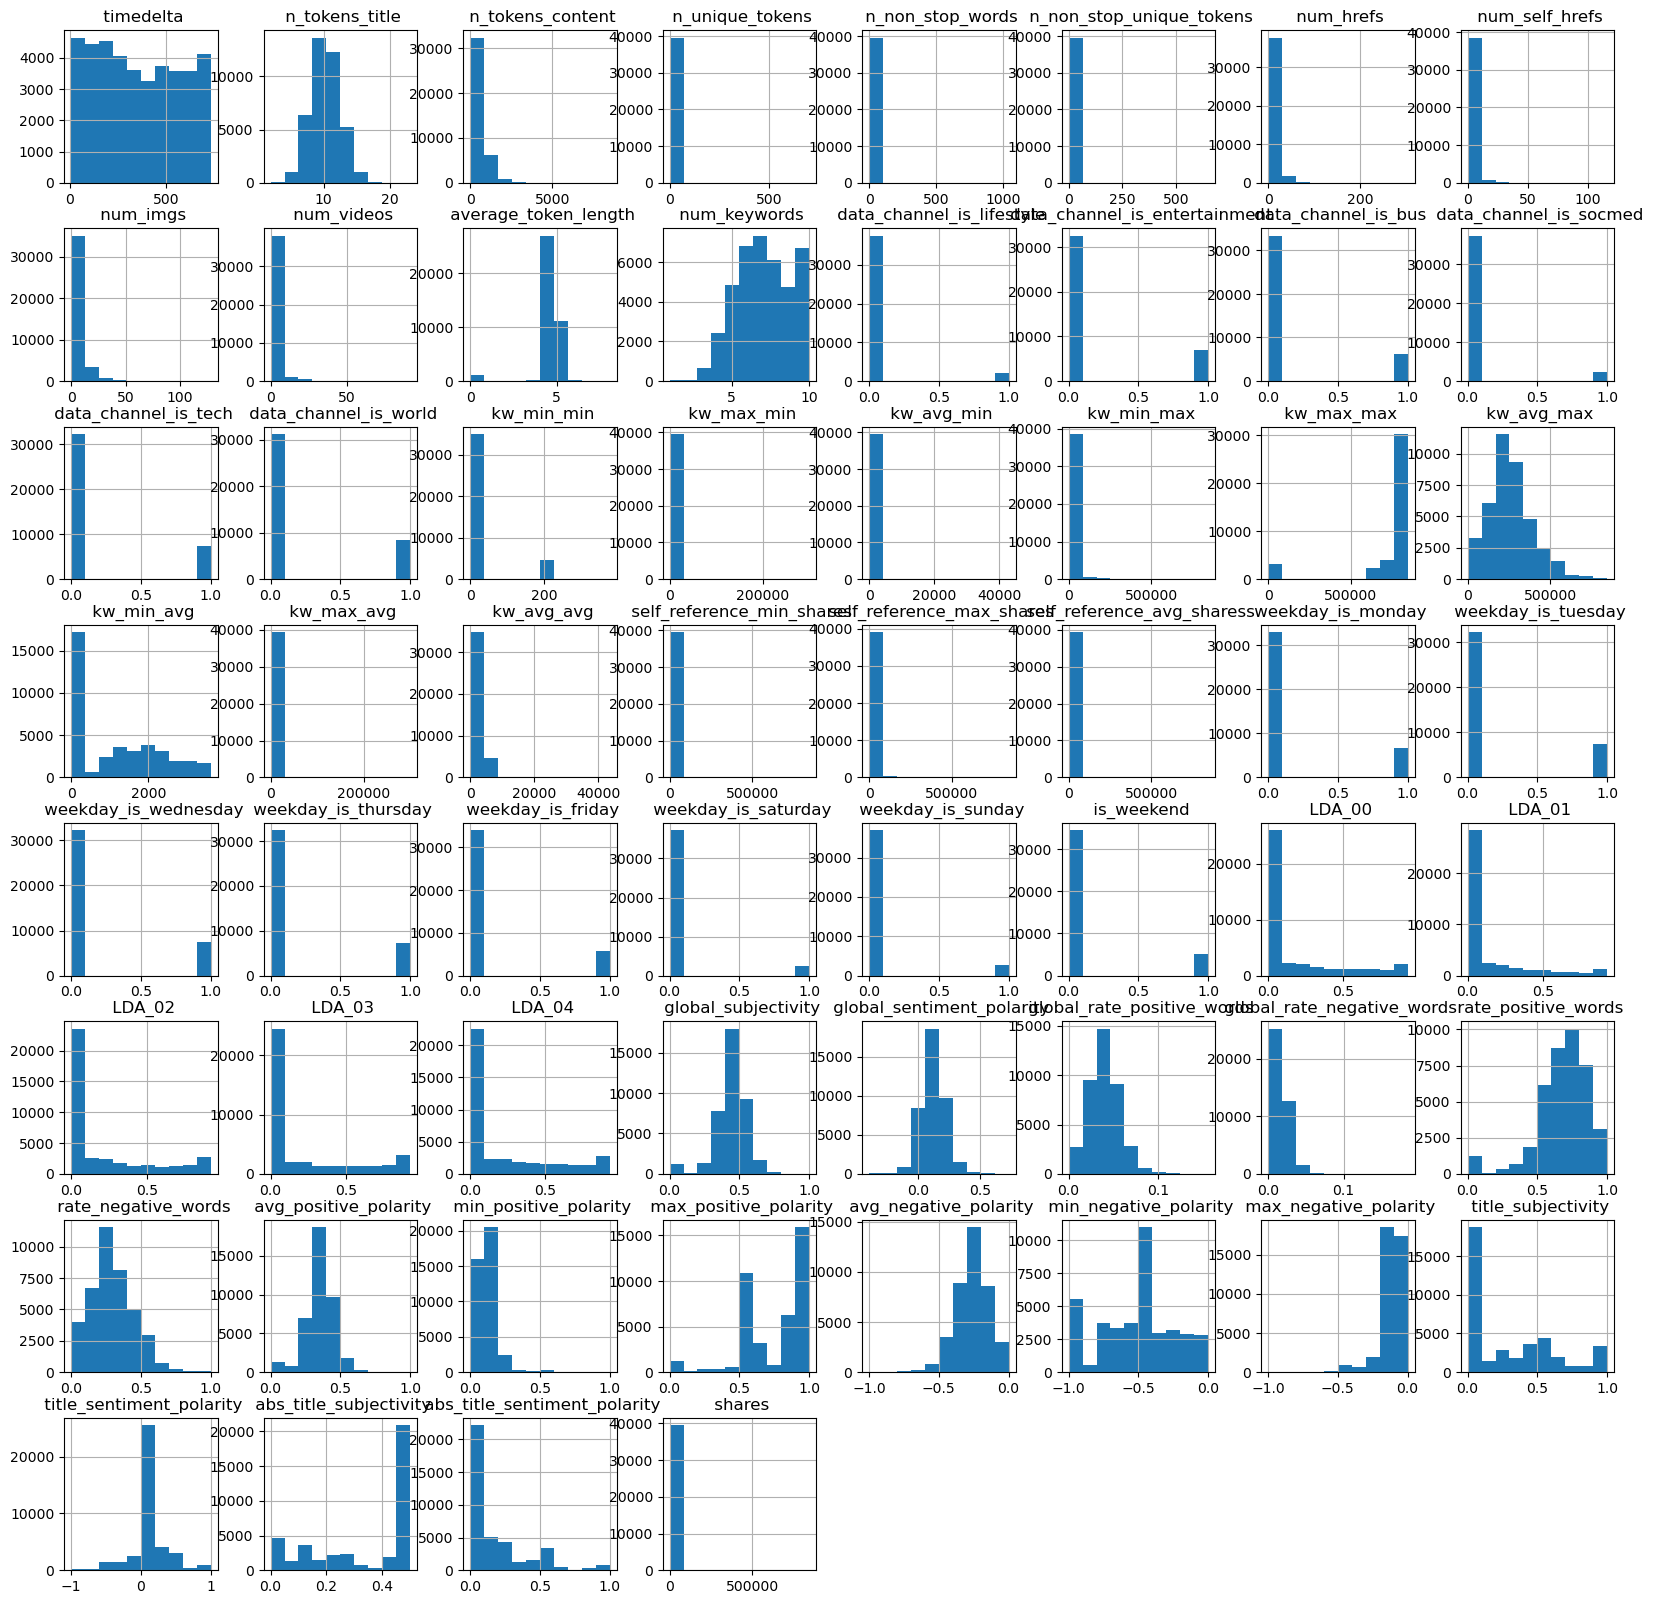

In [9]:
data.hist(figsize = (20,20))
plt.show()

/tmp/ipykernel_32/3690826691.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


<Axes: >

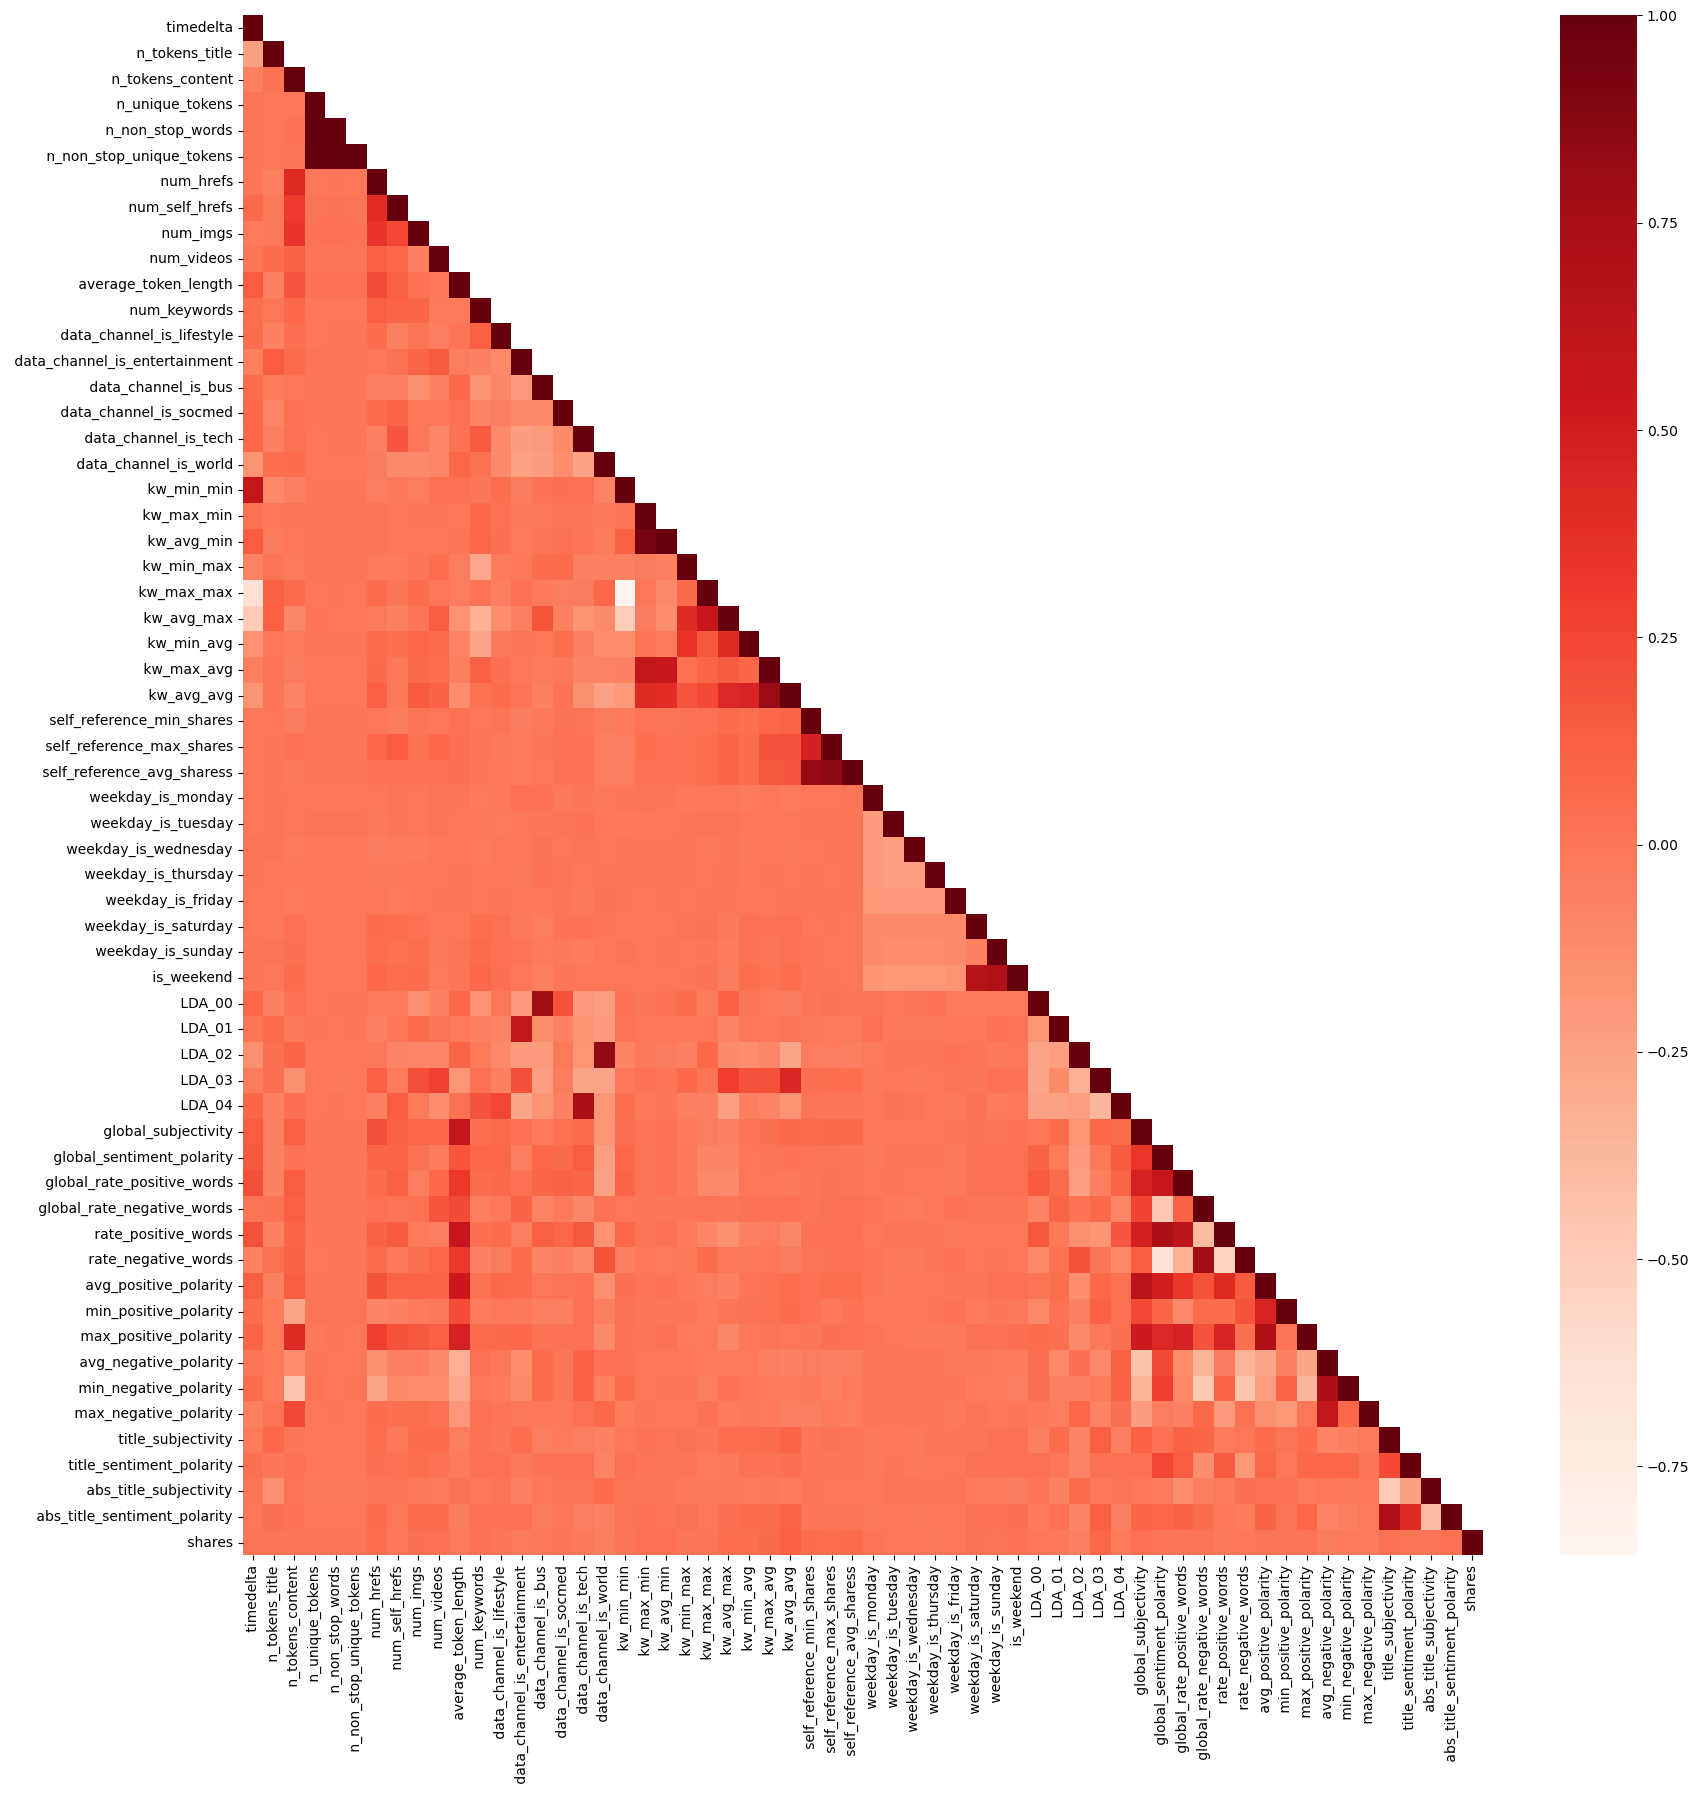

In [10]:
cor = data.corr()
plt.figure(figsize = (20,20))
data1 = cor.where(np.tril(np.ones(cor.shape).astype(bool)))
sns.heatmap(data1, cmap = 'Reds')

In [11]:
#Eliminating white space Character from the feature names
data.columns = data.columns.str.replace(" ","")

In [12]:
'''n_tokens_content - Number of words in the content
However if its minimum value is 0 it means that there are 
articles that do not have any content.
Such records should be dropped as their related attributes
pose no meaning to our analysis
find number of rows that contain 0 for n_tokens_content'''

num_of_no_words = data[data['n_tokens_content'] == 0].index
print("The number of news articles/items without words",num_of_no_words.size)


The number of news articles/items without words 1181


In [13]:
#dropping rows of articles that have zero words in the conten
data = data[data['n_tokens_content'] != 0]

In [14]:
'''Since URL is a non-numeric attribute and will not add value
to our analysis so we drop it from the dataset.
Also timedelta is a non-predictive attribute and not a feature
of the data set so we can drop it from the dataset.
Drop highly correlated attributes "n_non_stop_unique_tokens",
"n_non_stop_words","kw_avg_min".'''
data = data.drop('url',axis=1)
data = data.drop('timedelta',axis=1)
data= data.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

In [15]:
data['shares'].describe()

count     38463.000000
mean       3355.360398
std       11585.968776
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64

In [16]:
a = data['shares'].mean()
b = data['shares'].median()
print("Mean shares: ",a)
print("Median shares: ",b)

Mean shares:  3355.3603983048642
Median shares:  1400.0


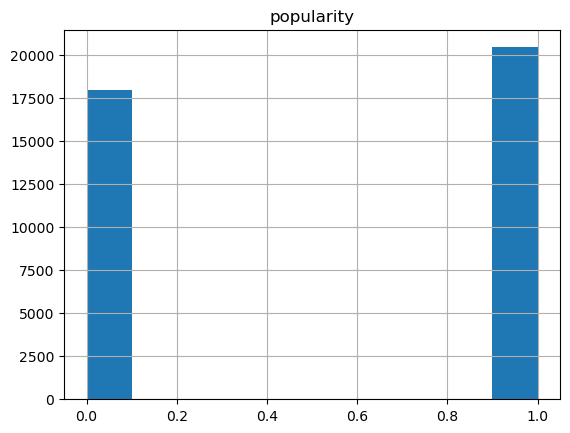

In [17]:
#a new target variable
data['popularity'] = data['shares'].apply(lambda x: 0 if x <1400 else 1)
data.hist(column = 'popularity');

/tmp/ipykernel_32/198123081.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(y = 'shares', x = 'n_tokens_title', data = data ,palette = 'muted');


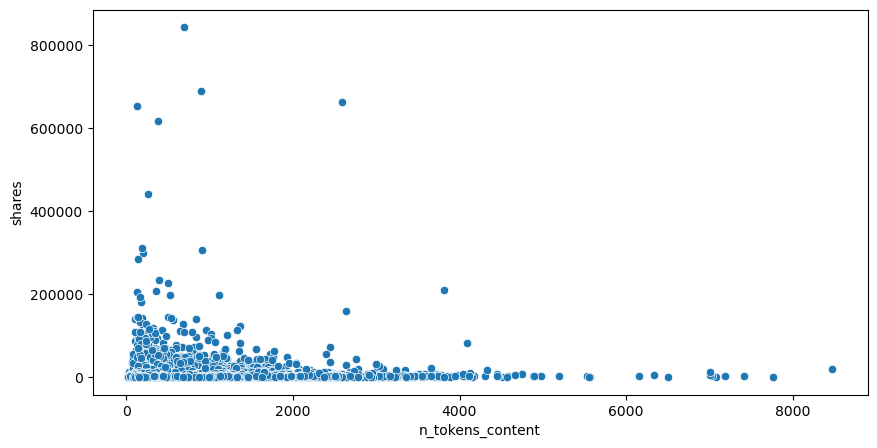

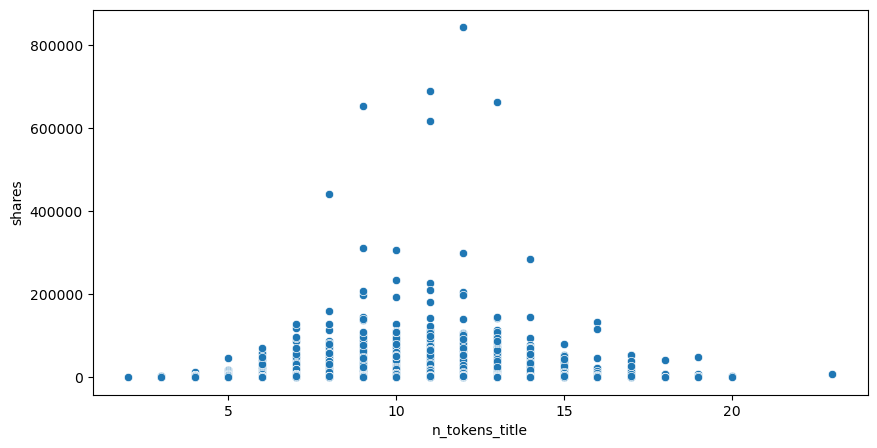

In [18]:
# n_tokens_content & shares
plt.figure(figsize = (10,5))
ax = sns.scatterplot(y = 'shares', x = 'n_tokens_content', data = data)

#n_tokens_title & shares
plt.figure(figsize = (10,5))
ax = sns.scatterplot(y = 'shares', x = 'n_tokens_title', data = data ,palette = 'muted');

Index(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'],
      dtype='object')


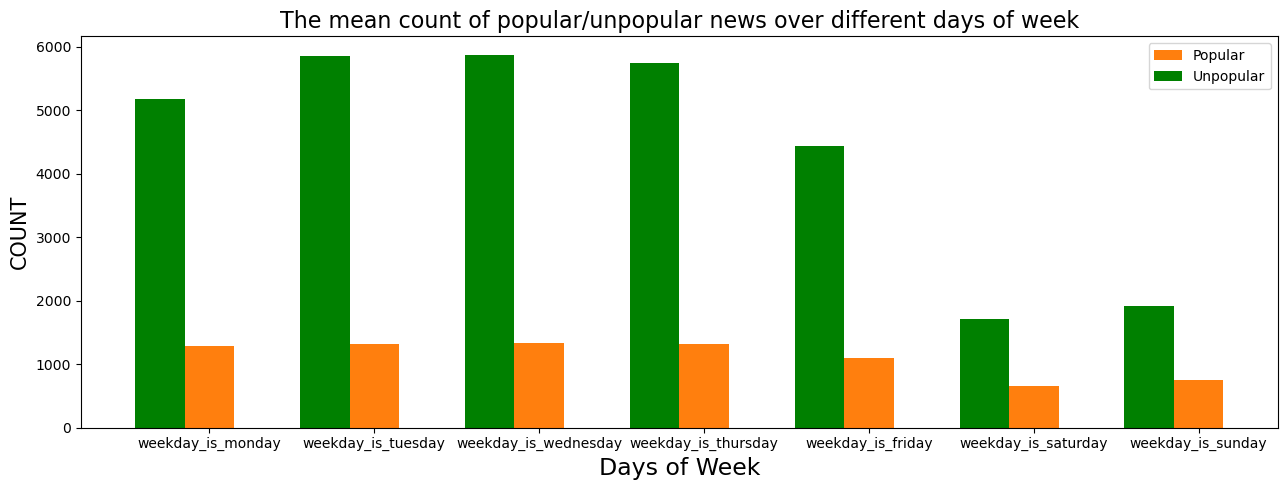

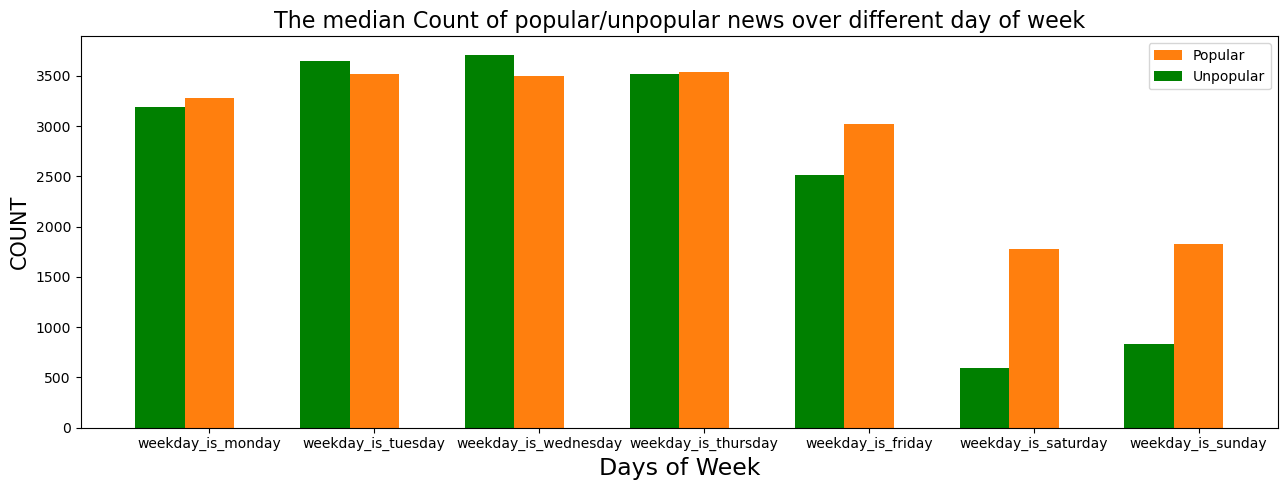

In [19]:
days_of_week = data.columns[26:33]
print(days_of_week)

Unpopular  =data[data['shares'] < a]
Popular = data[data['shares'] >= a]
Unpopular_day = Unpopular[days_of_week].sum().values
Popular_day = Popular[days_of_week].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("The mean count of popular/unpopular news over different days of week", fontsize = 16)

plt.bar(np.arange(len(days_of_week)),Popular_day,width = 0.3, align = 'center', color = 'tab:orange', label = 'Popular')
plt.bar(np.arange(len(days_of_week)) - 0.3,Unpopular_day,width = 0.3, align = 'center', color = 'g', label = 'Unpopular')

plt.xticks(np.arange(len(days_of_week)),days_of_week)
plt.ylabel('COUNT',fontsize = 15)
plt.xlabel('Days of Week',fontsize = 17)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

#*******************************************************************************************************

Unpopular = data[data['shares'] < b]
Popular = data[data['shares'] >= b]
Unpopular_day = Unpopular[days_of_week].sum().values
Popular_day = Popular[days_of_week].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("The median Count of popular/unpopular news over different day of week", fontsize = 16)

plt.bar(np.arange(len(days_of_week)),Popular_day,width = 0.3, align = 'center', color = 'tab:orange', label = 'Popular')
plt.bar(np.arange(len(days_of_week)) - 0.3,Unpopular_day,width = 0.3,align = 'center',color = 'g', label = 'Unpopular')

plt.xticks(np.arange(len(days_of_week)),days_of_week)
plt.ylabel('COUNT',fontsize = 15)
plt.xlabel('Days of Week',fontsize = 17)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

Index(['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')


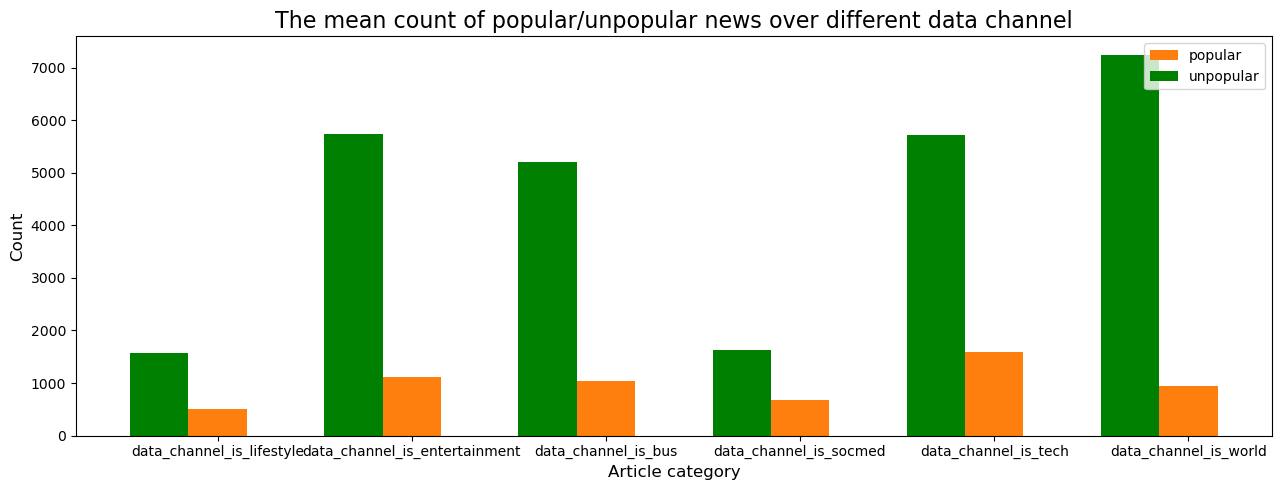

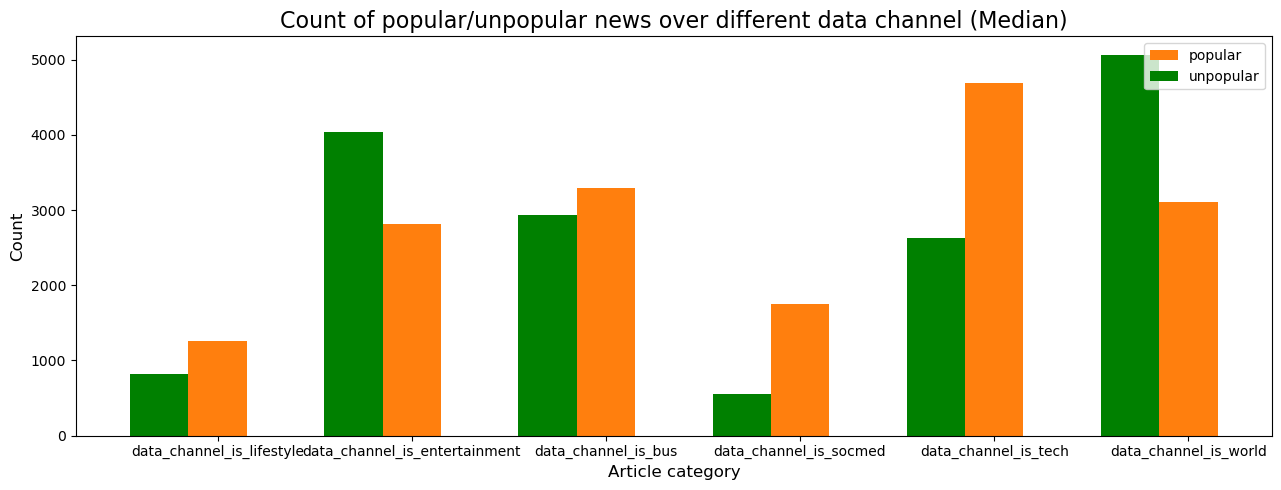

In [20]:
Data_channel = data.columns[9:15]
print(Data_channel)

Unpopular = data[data['shares'] < a]
Popular = data[data['shares'] >= a]
Unpopular_day = Unpopular[Data_channel].sum().values
Popular_day = Popular[Data_channel].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("The mean count of popular/unpopular news over different data channel", fontsize = 16)
plt.bar(np.arange(len(Data_channel)), Popular_day, width = 0.3, align = "center", color = 'tab:orange', \
          label = "popular")
plt.bar(np.arange(len(Data_channel)) - 0.3, Unpopular_day, width = 0.3, align = "center", color = 'g', \
          label = "unpopular")
plt.xticks(np.arange(len(Data_channel)), Data_channel)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Article category", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()


#********************************************************************************************************

Unpopular = data[data['shares'] < b]
Popular = data[data['shares'] >= b]
Unpopular_day = Unpopular[Data_channel].sum().values
Popular_day = Popular[Data_channel].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Median)", fontsize = 16)
plt.bar(np.arange(len(Data_channel)), Popular_day, width = 0.3, align = "center", color = 'tab:orange', \
          label = "popular")
plt.bar(np.arange(len(Data_channel)) - 0.3, Unpopular_day, width = 0.3, align = "center", color = 'g', \
          label = "unpopular")
plt.xticks(np.arange(len(Data_channel)), Data_channel)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Article category", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

/tmp/ipykernel_32/1742069978.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (15,15))


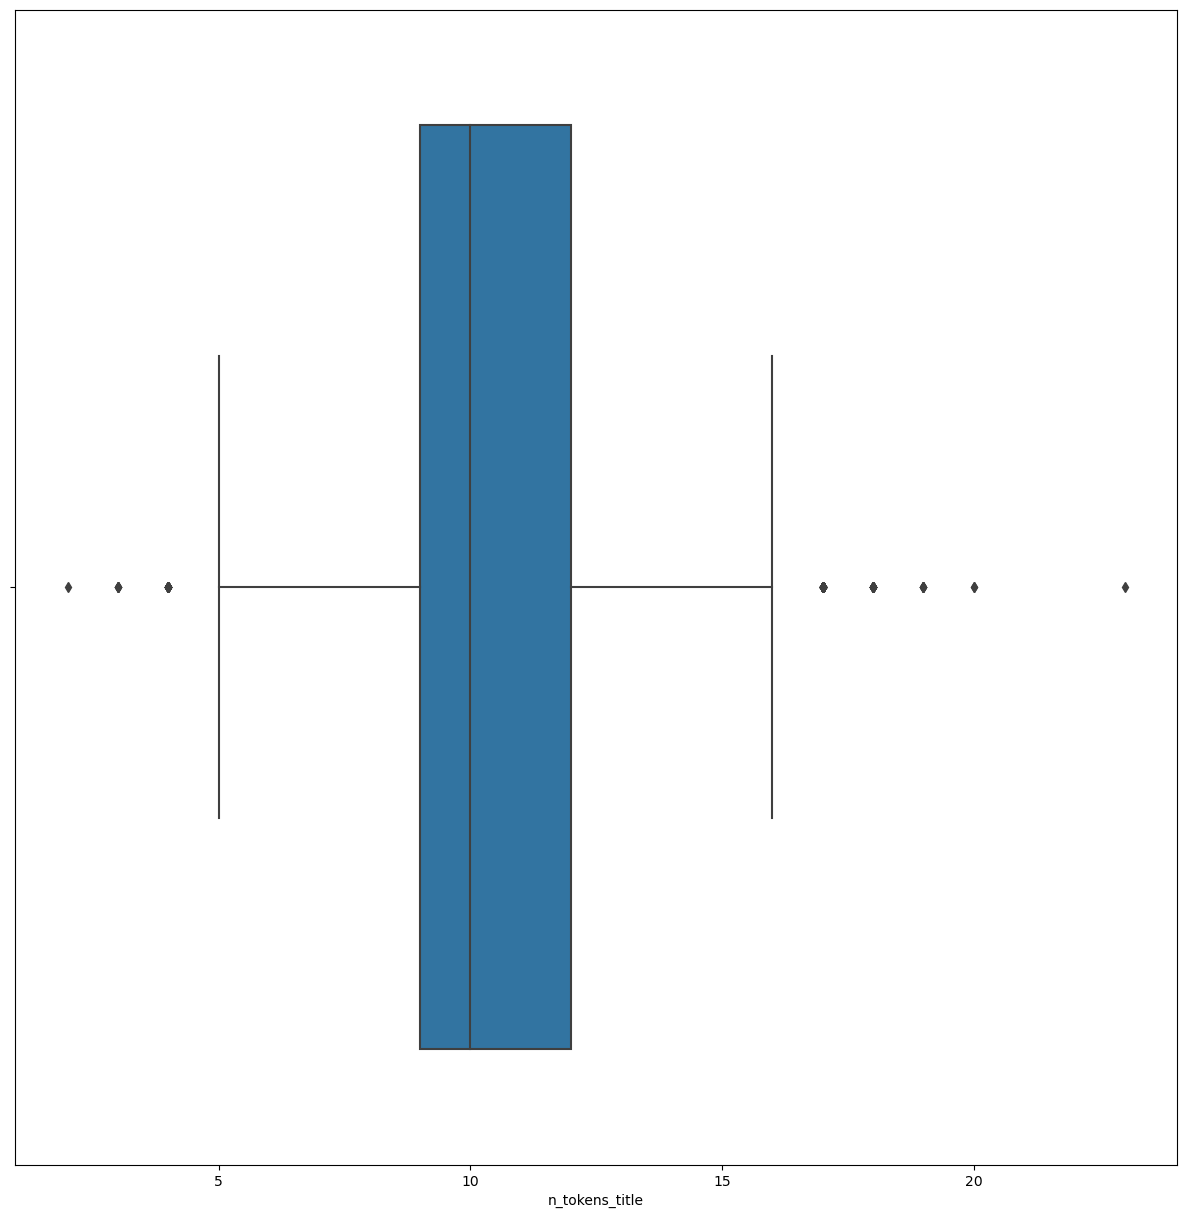

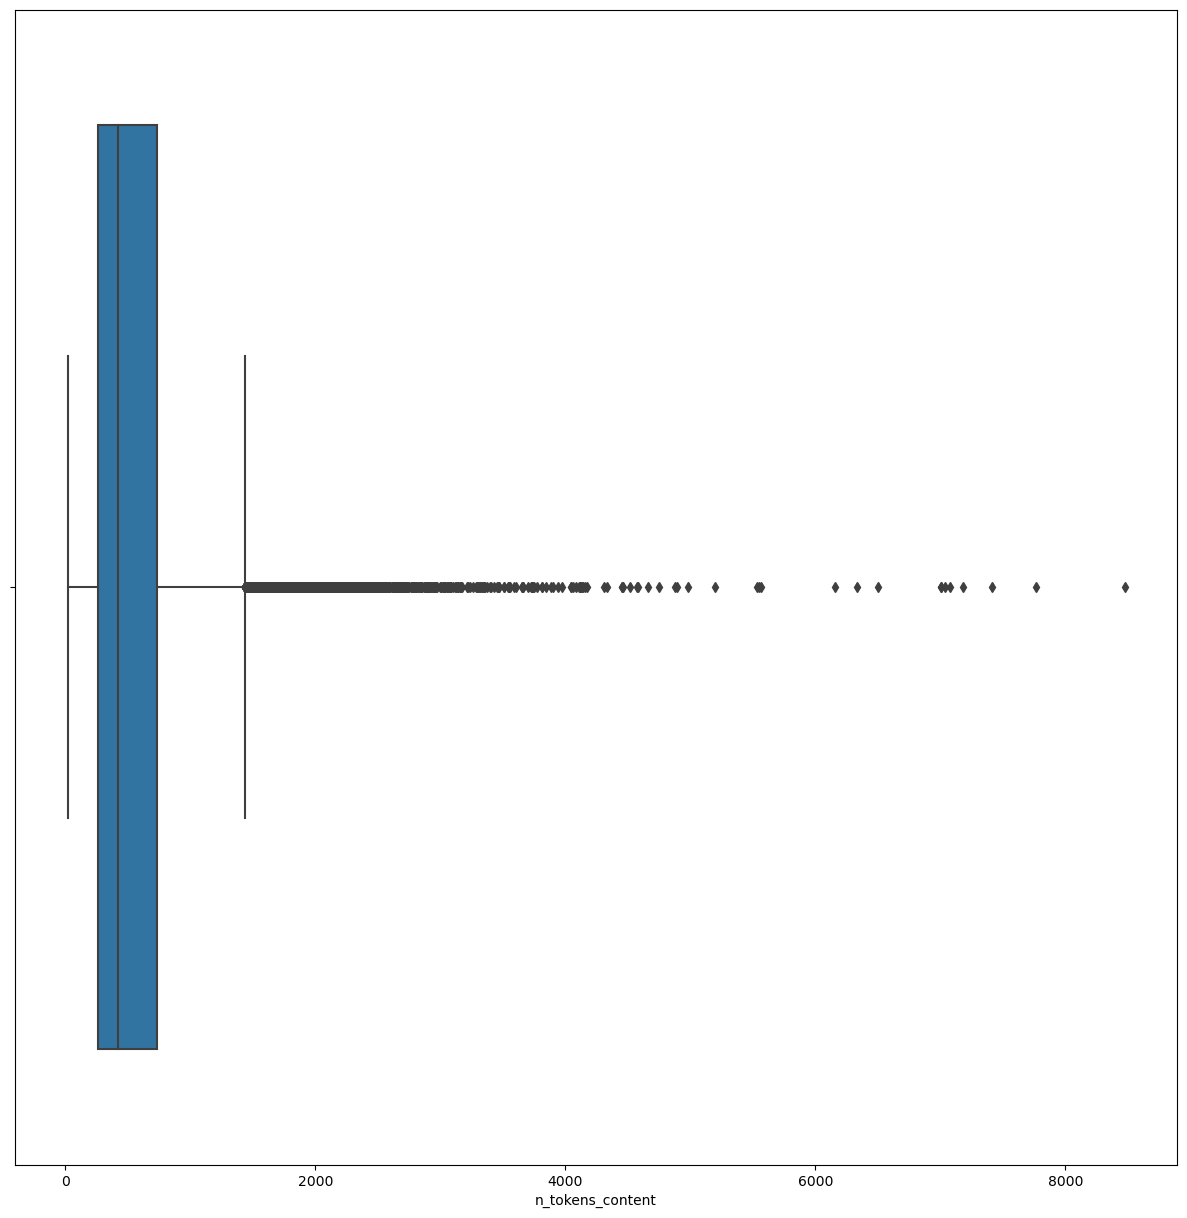

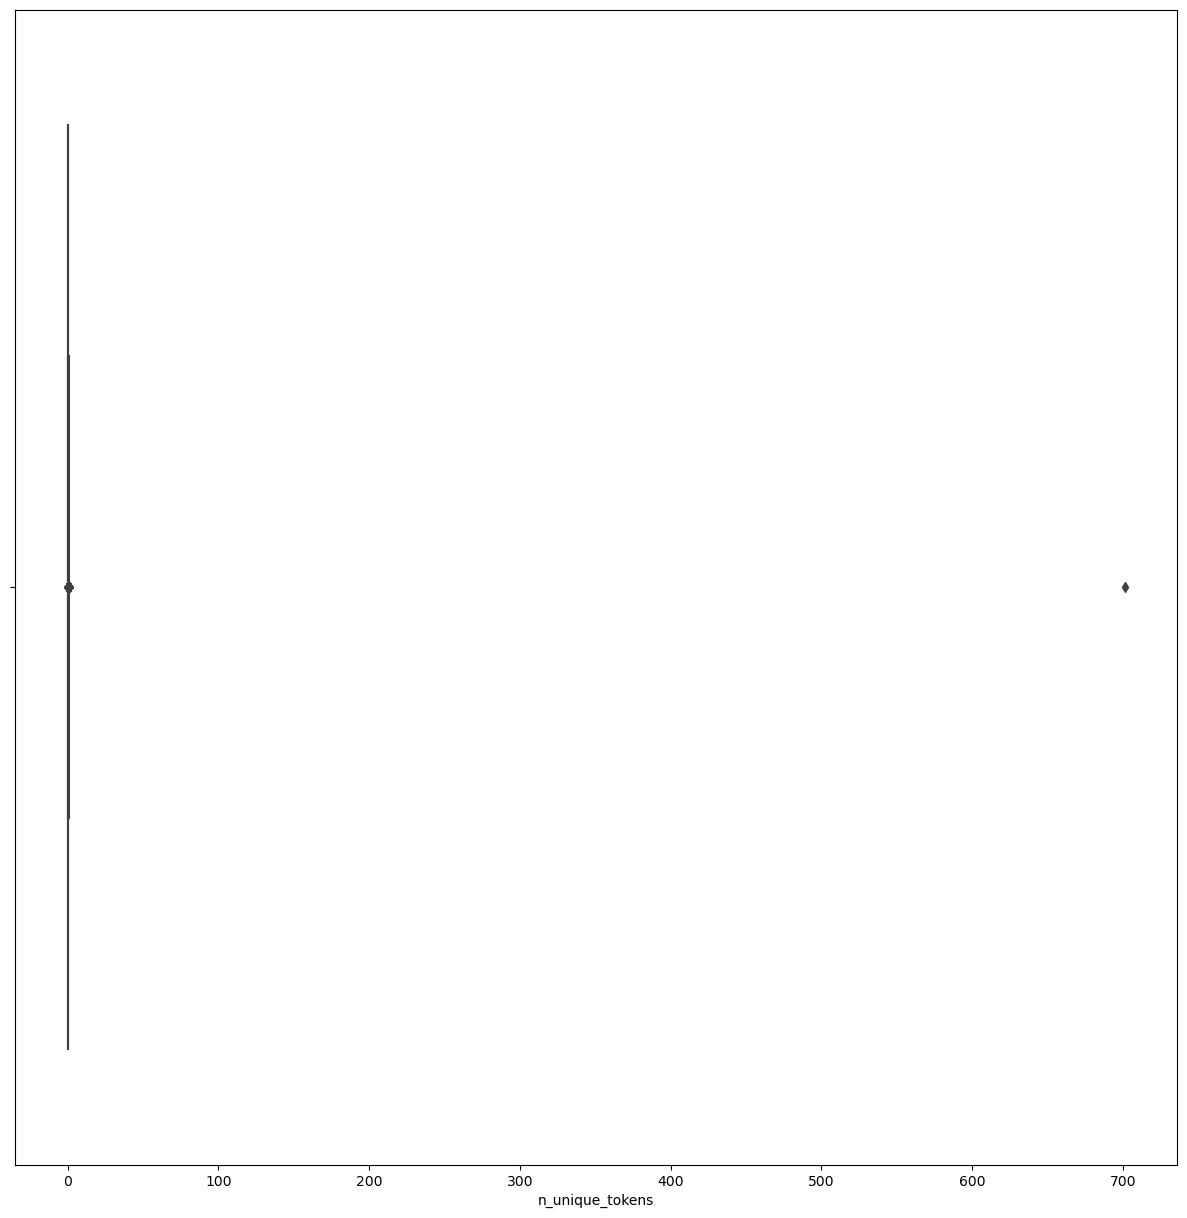

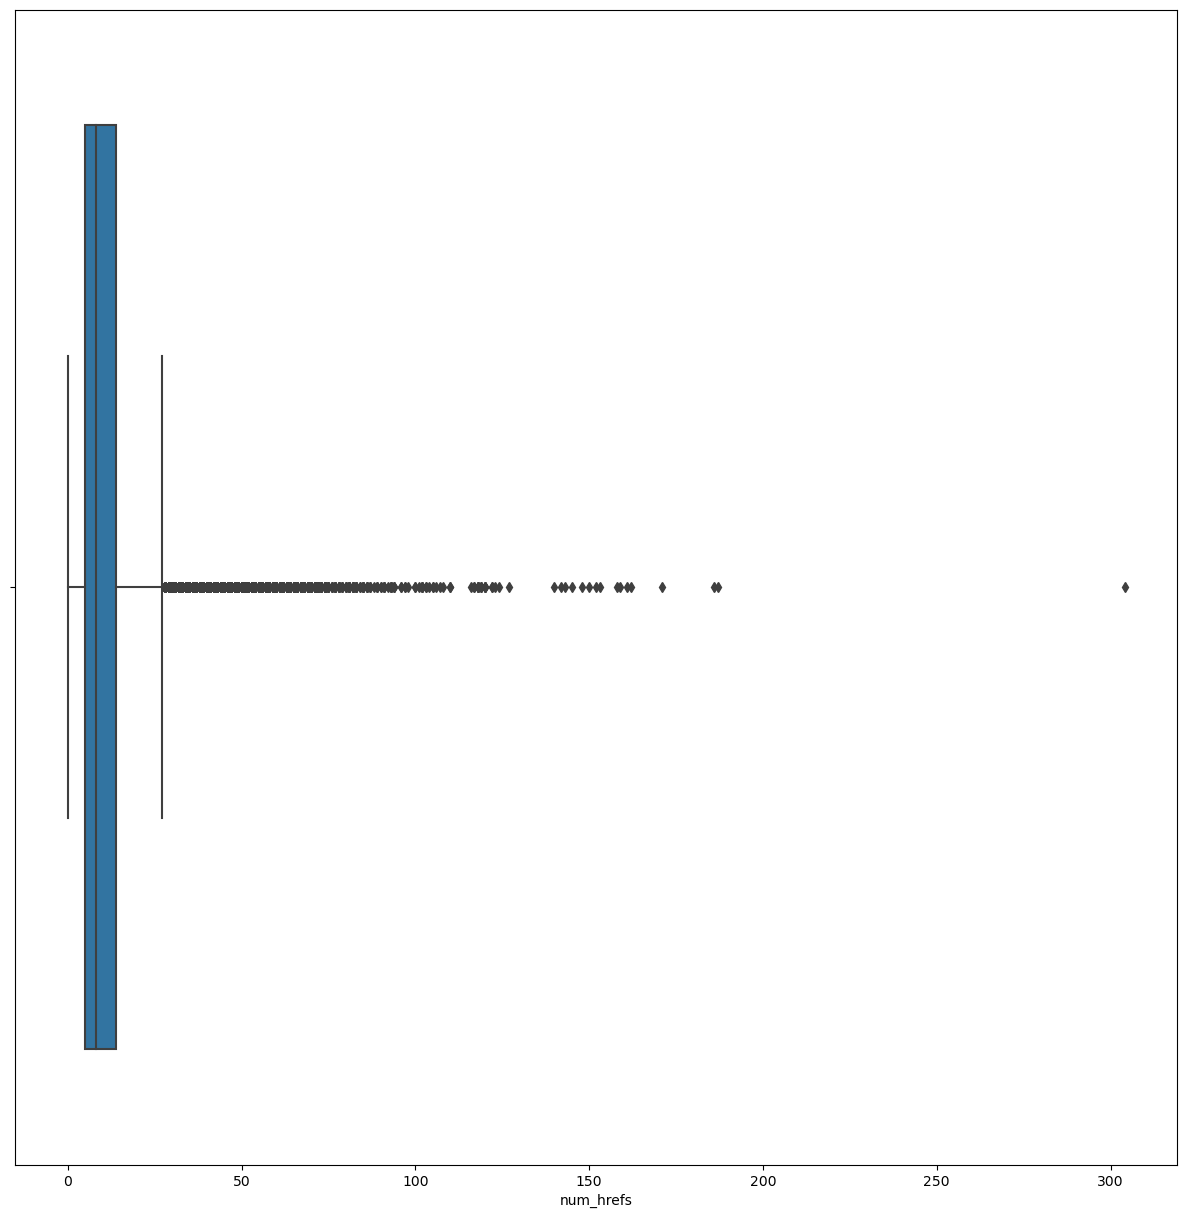

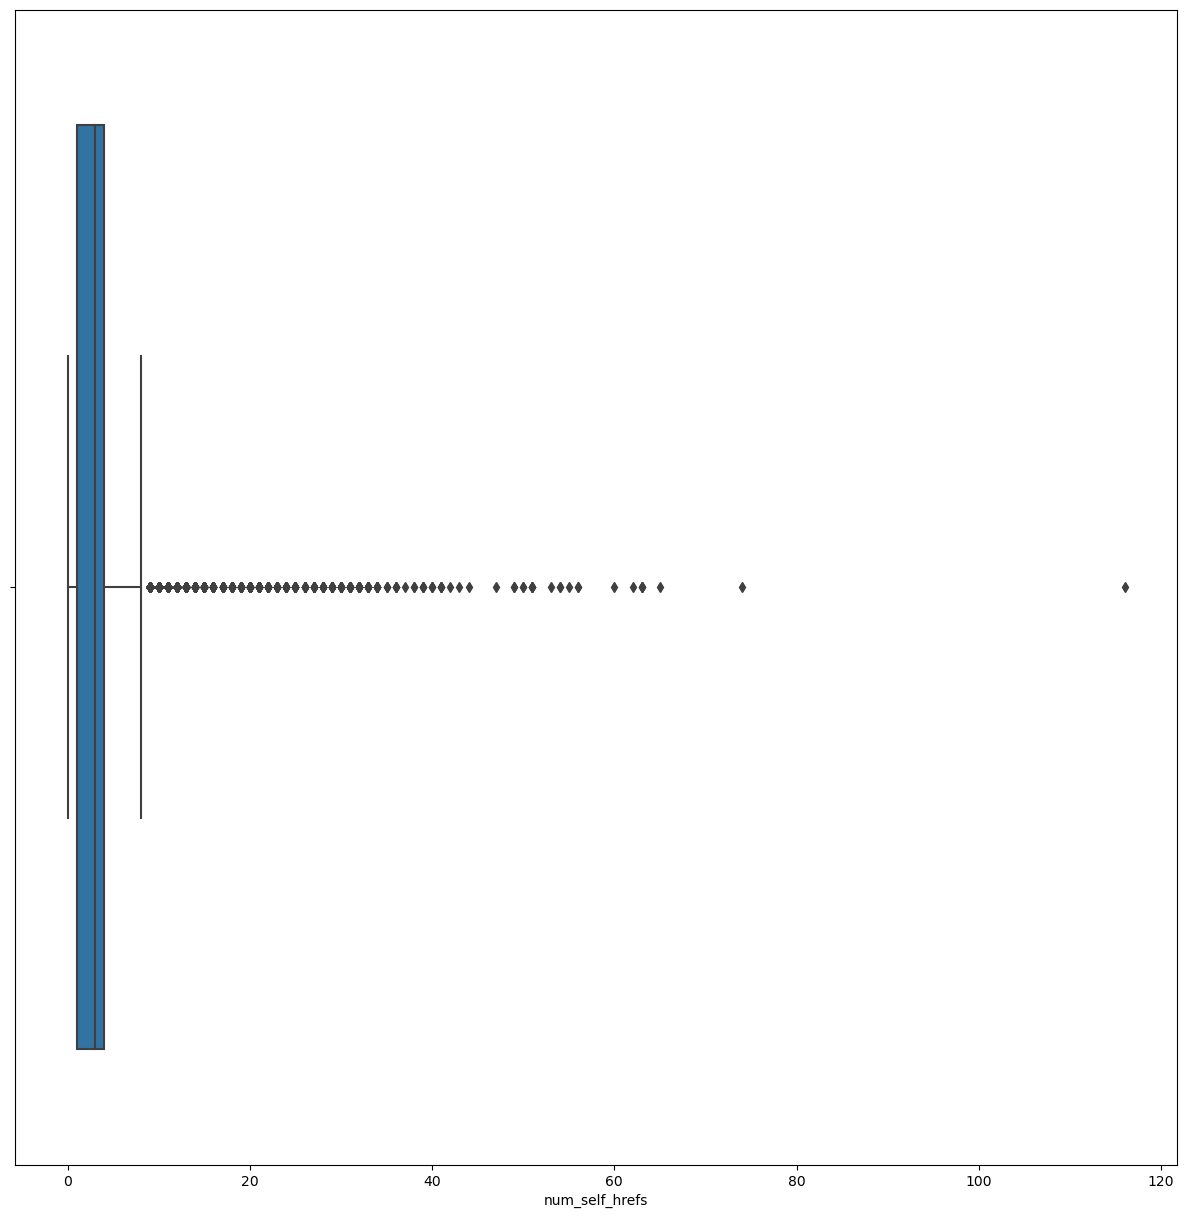

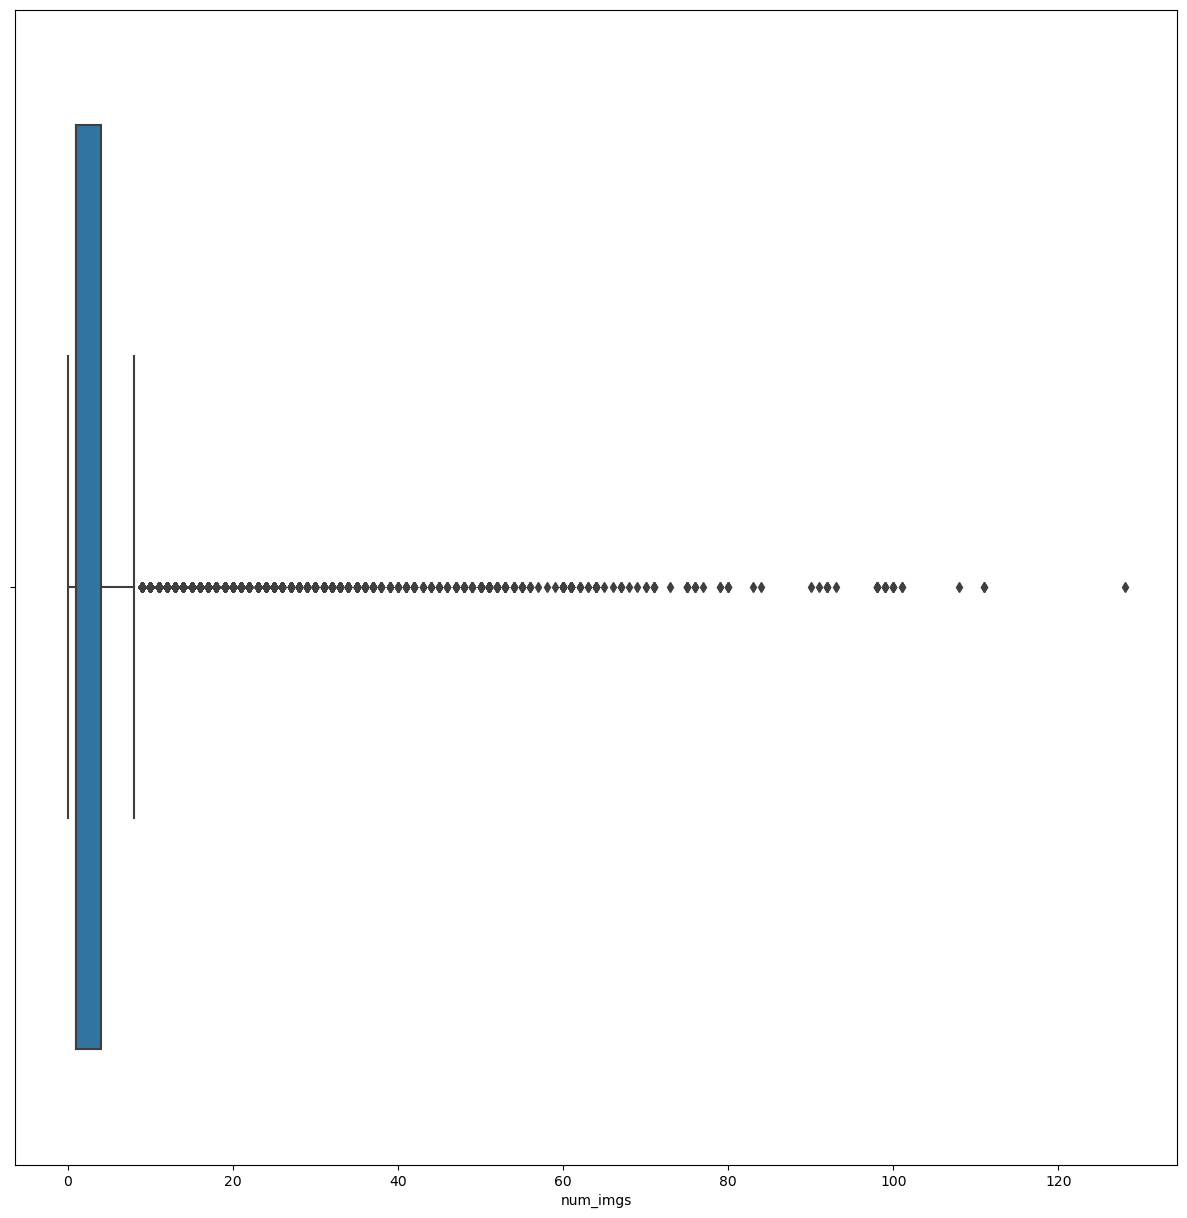

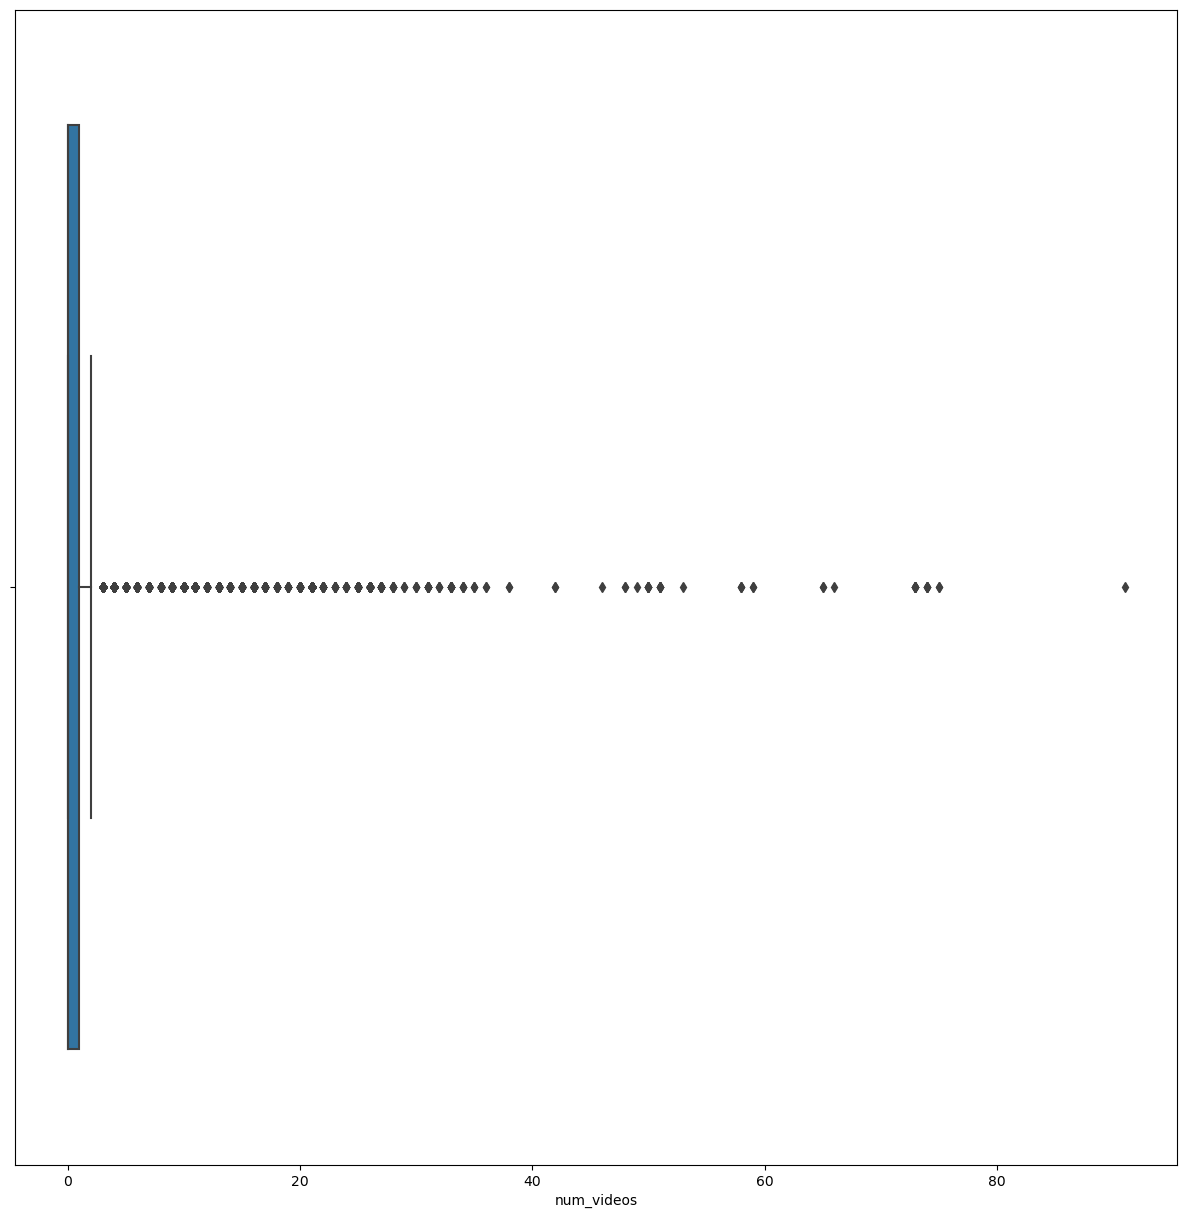

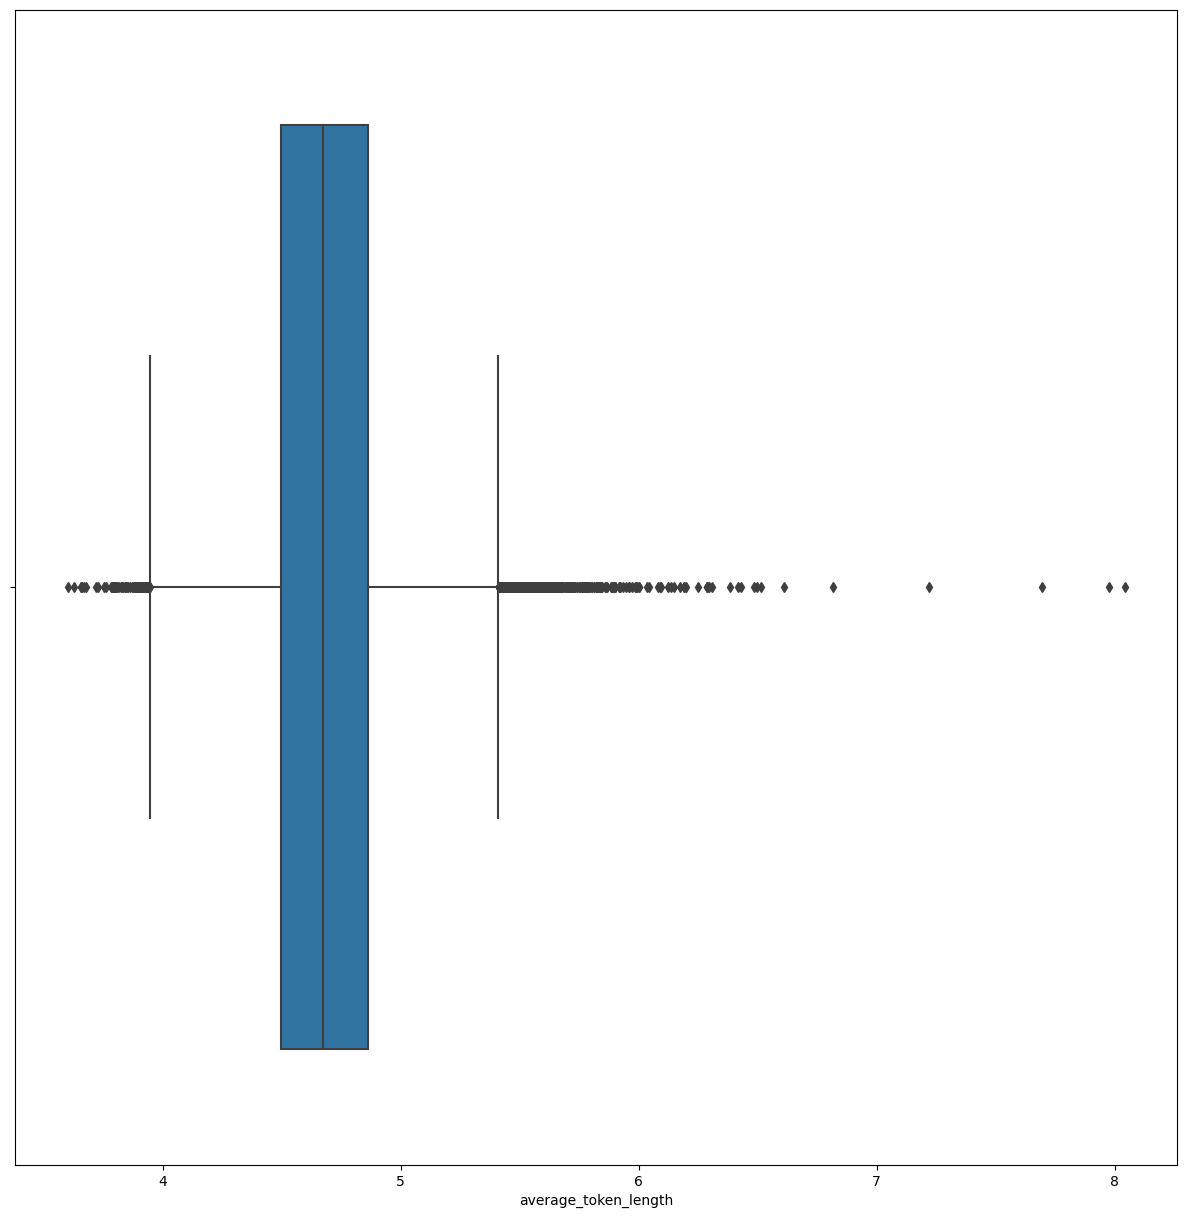

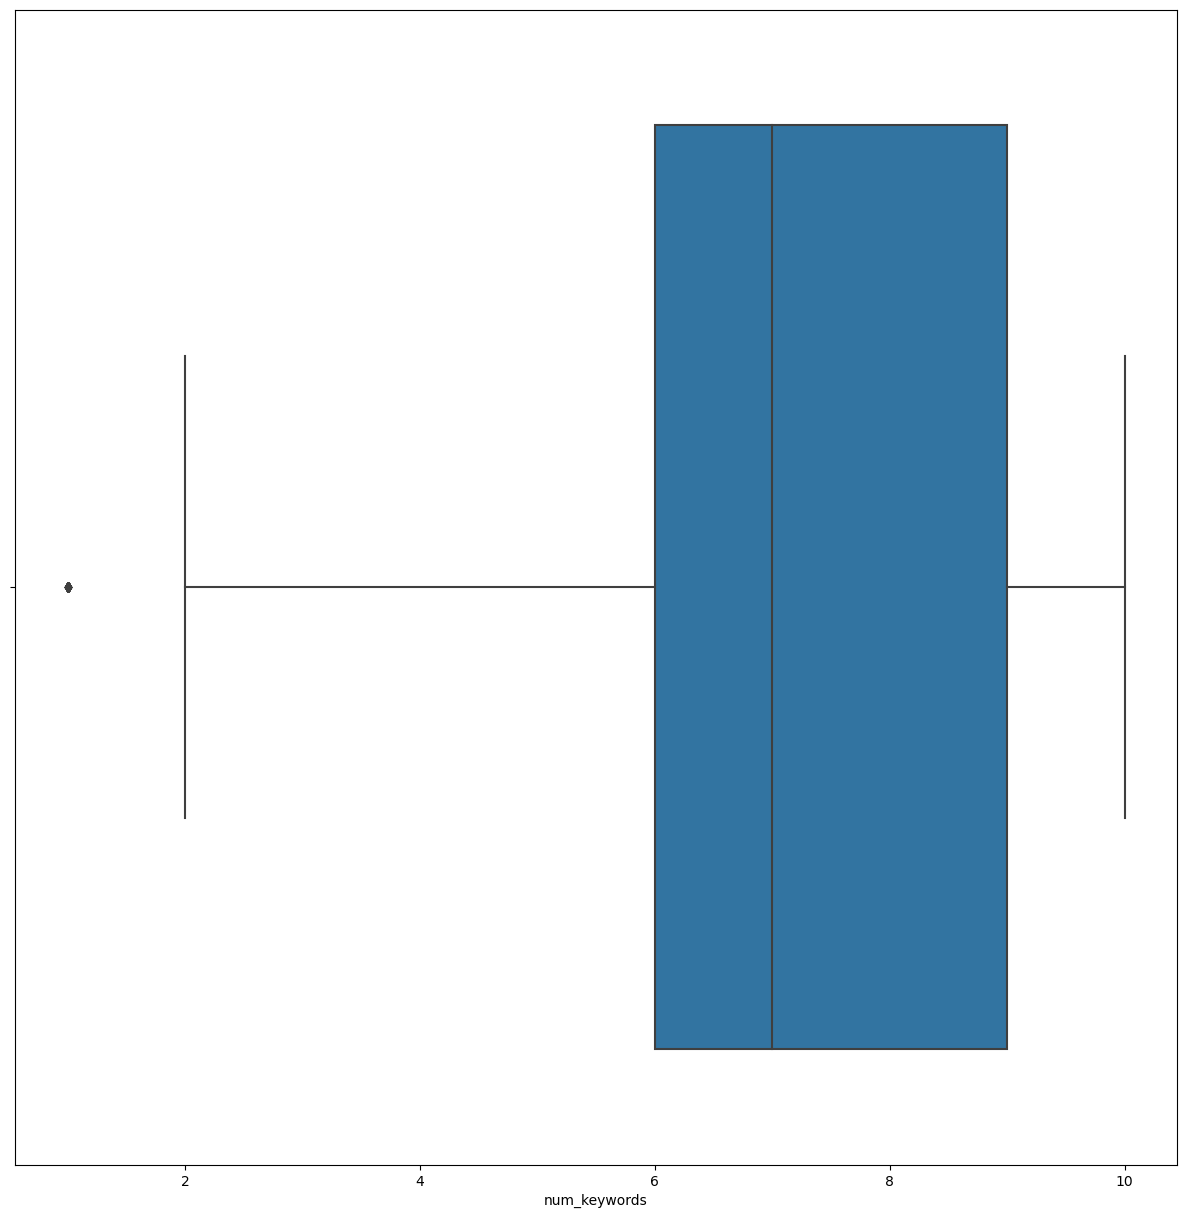

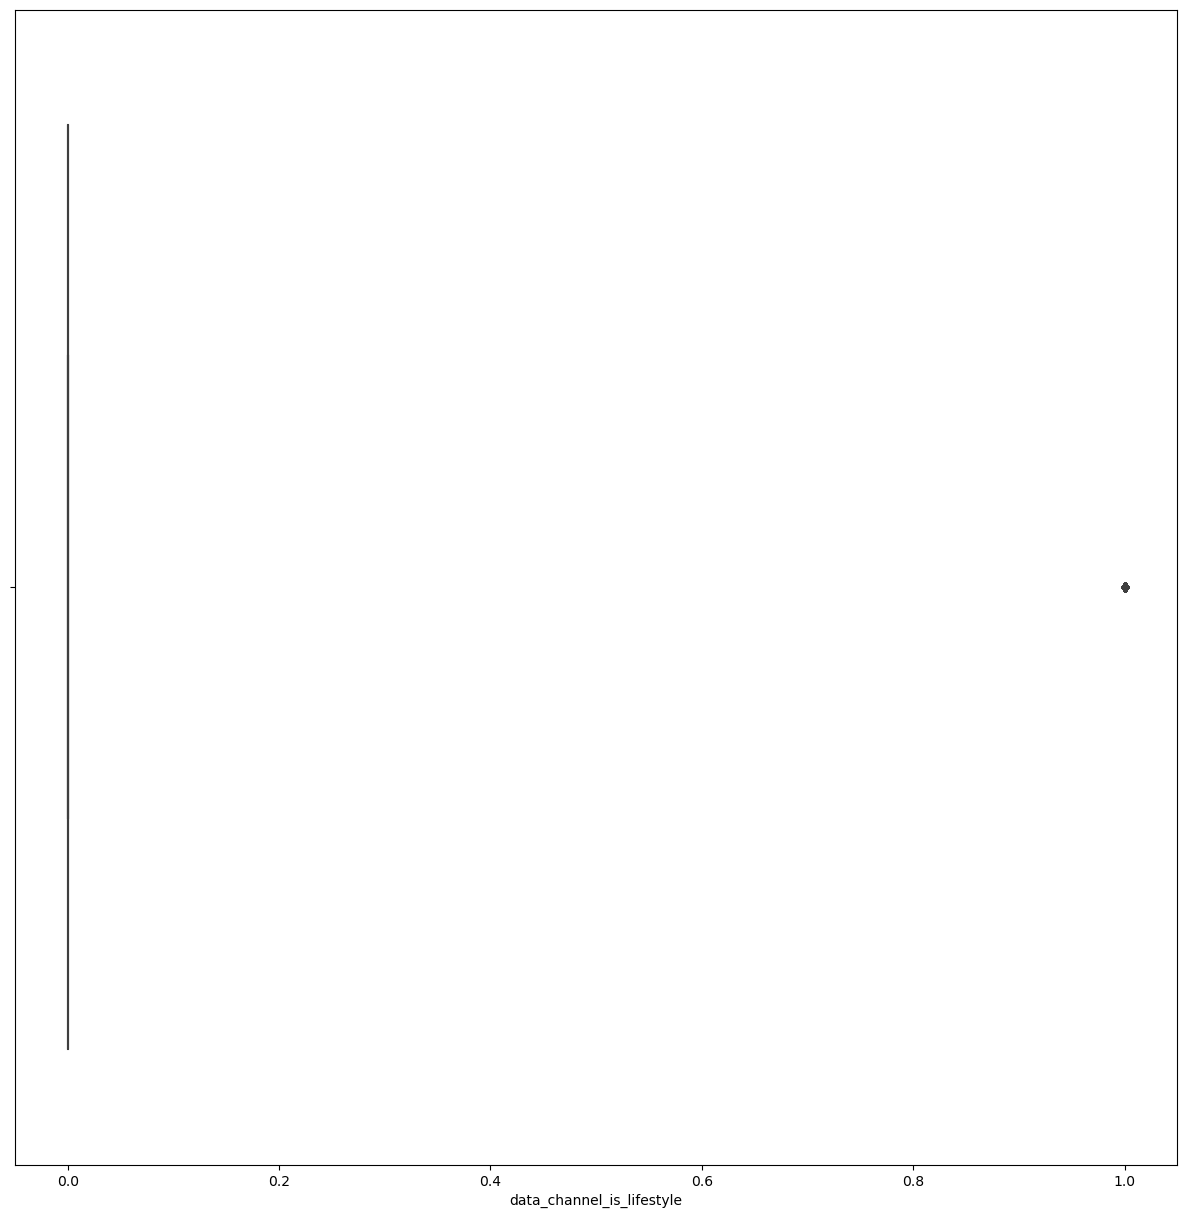

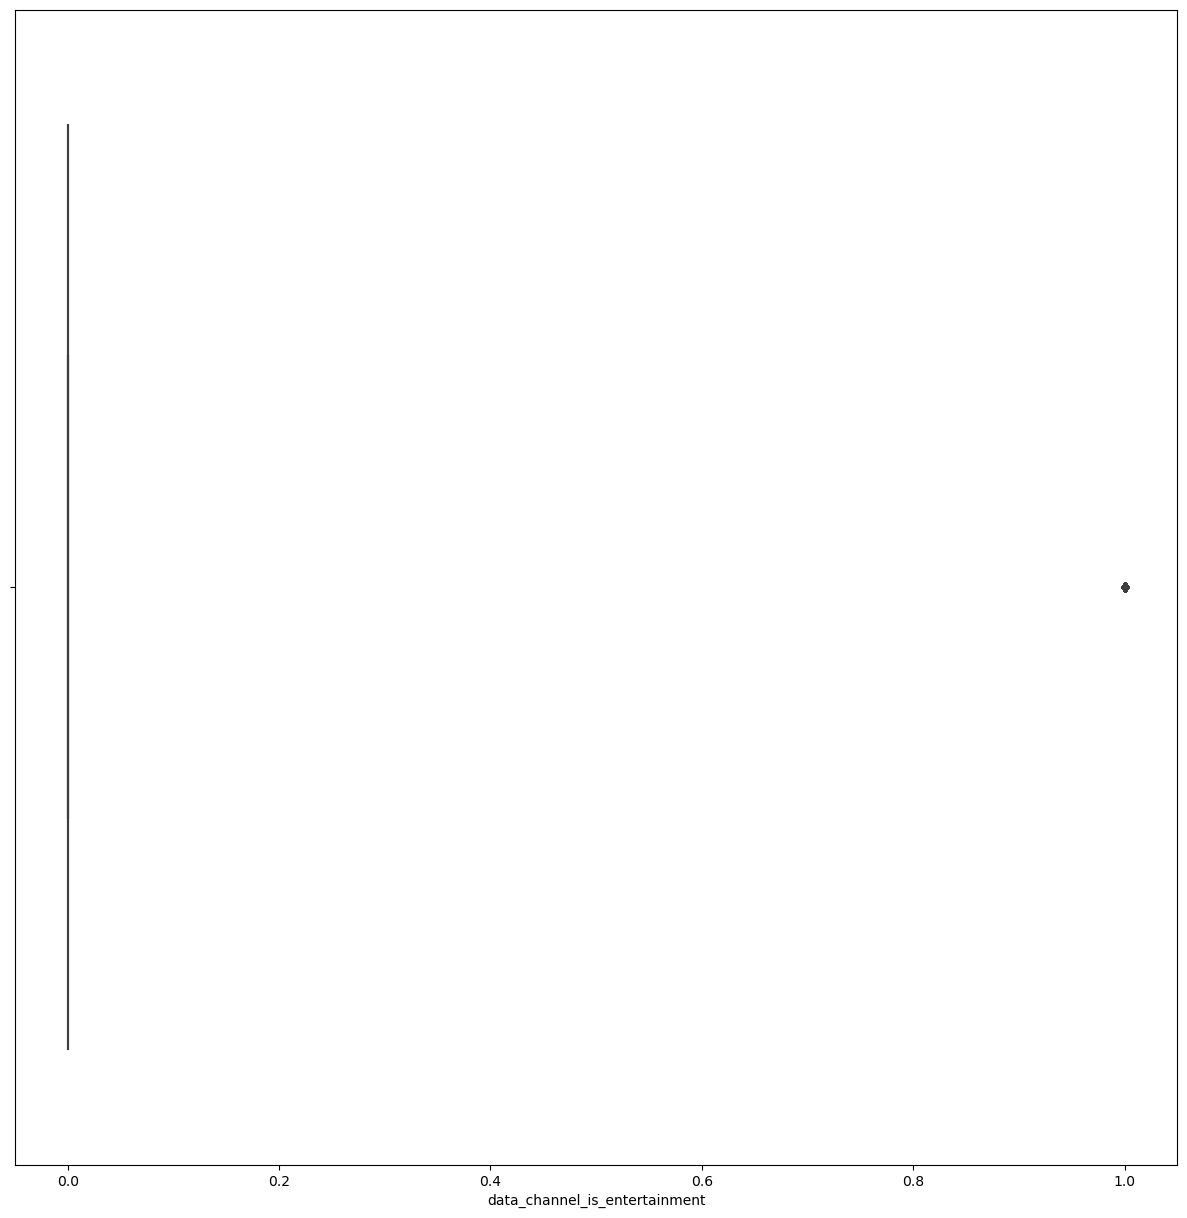

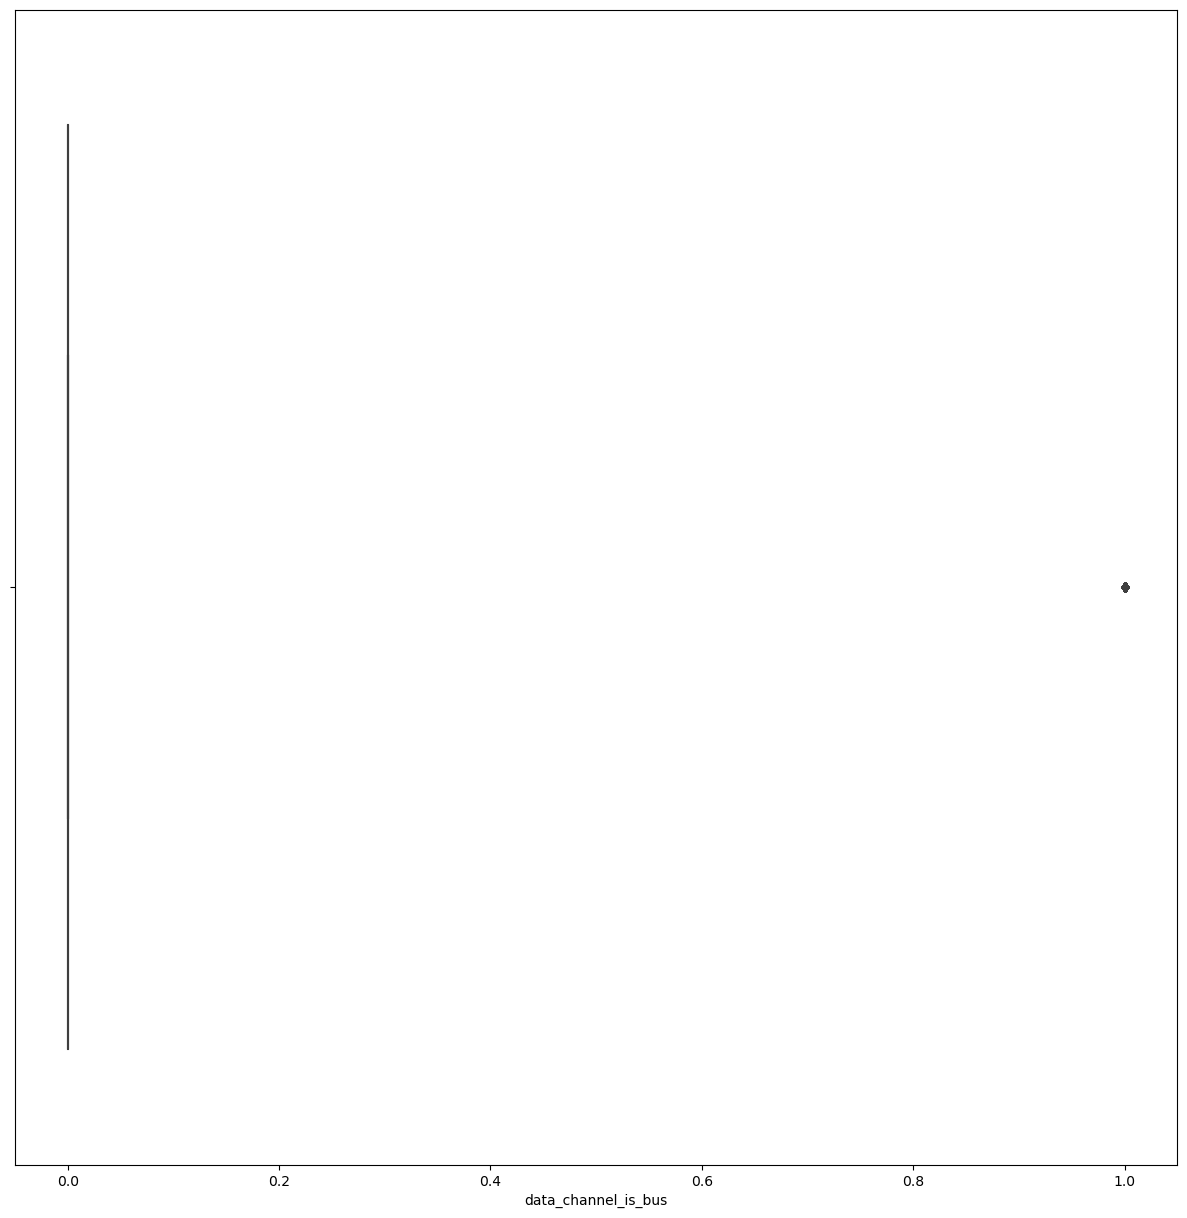

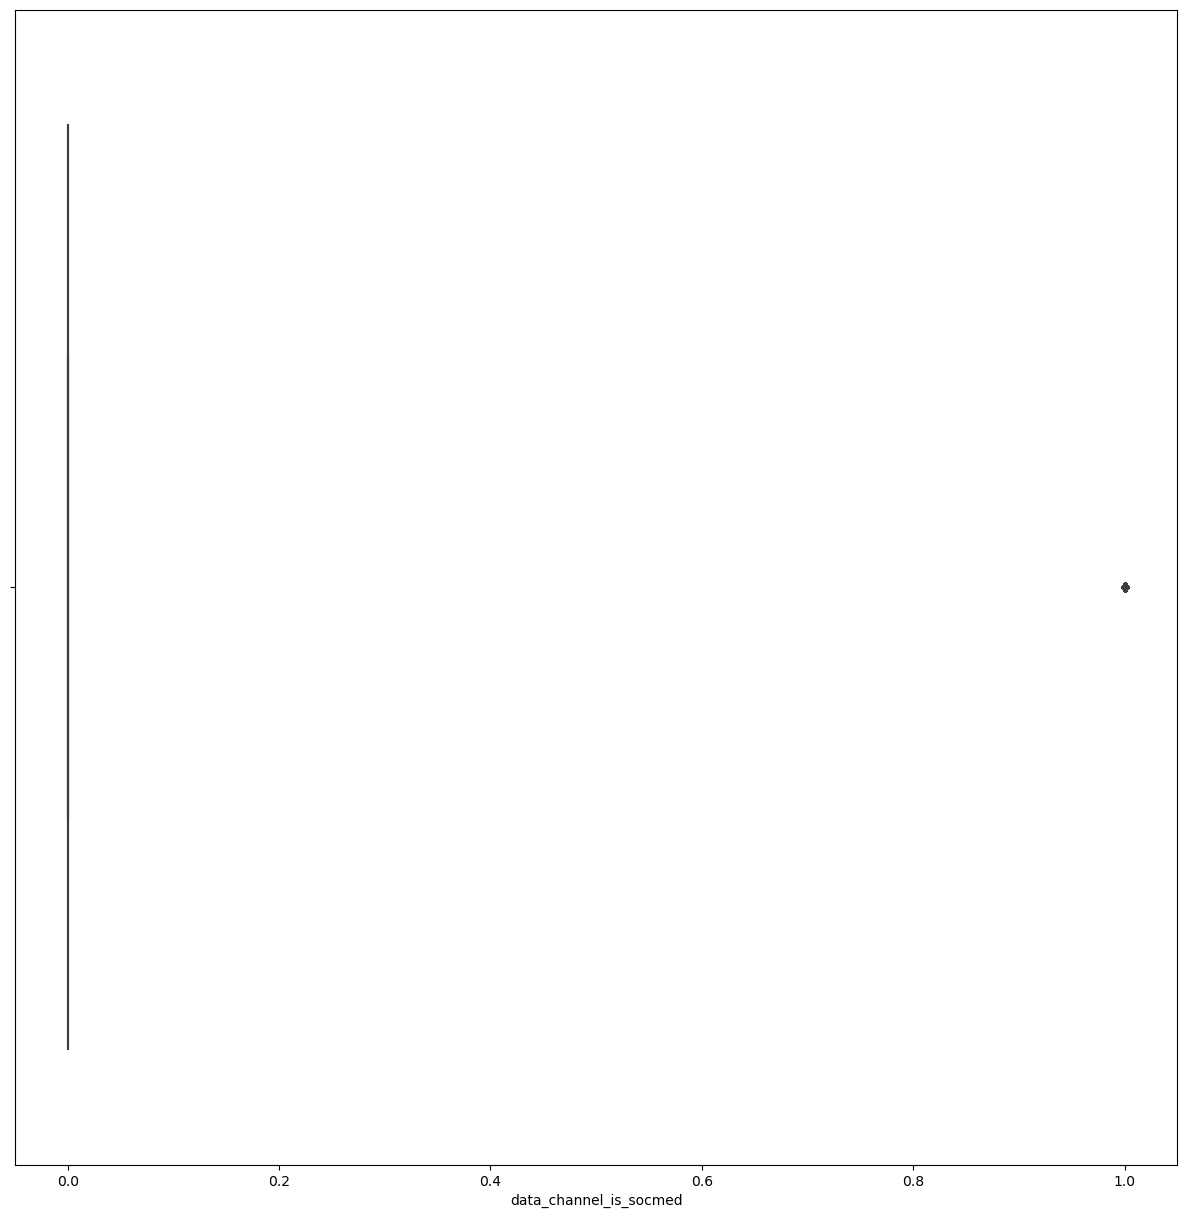

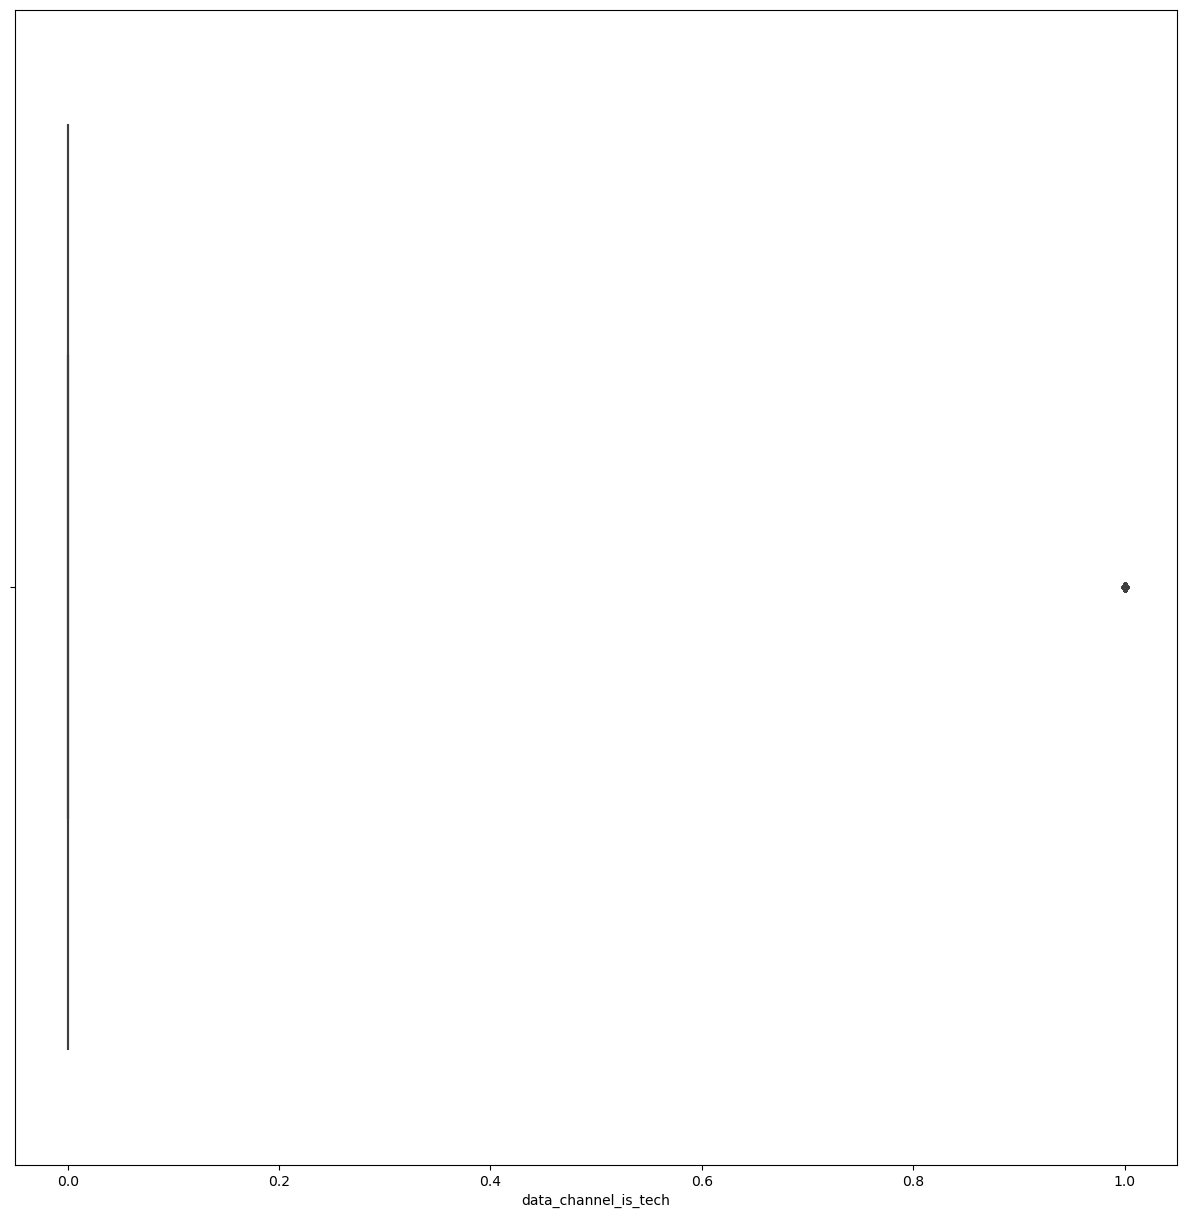

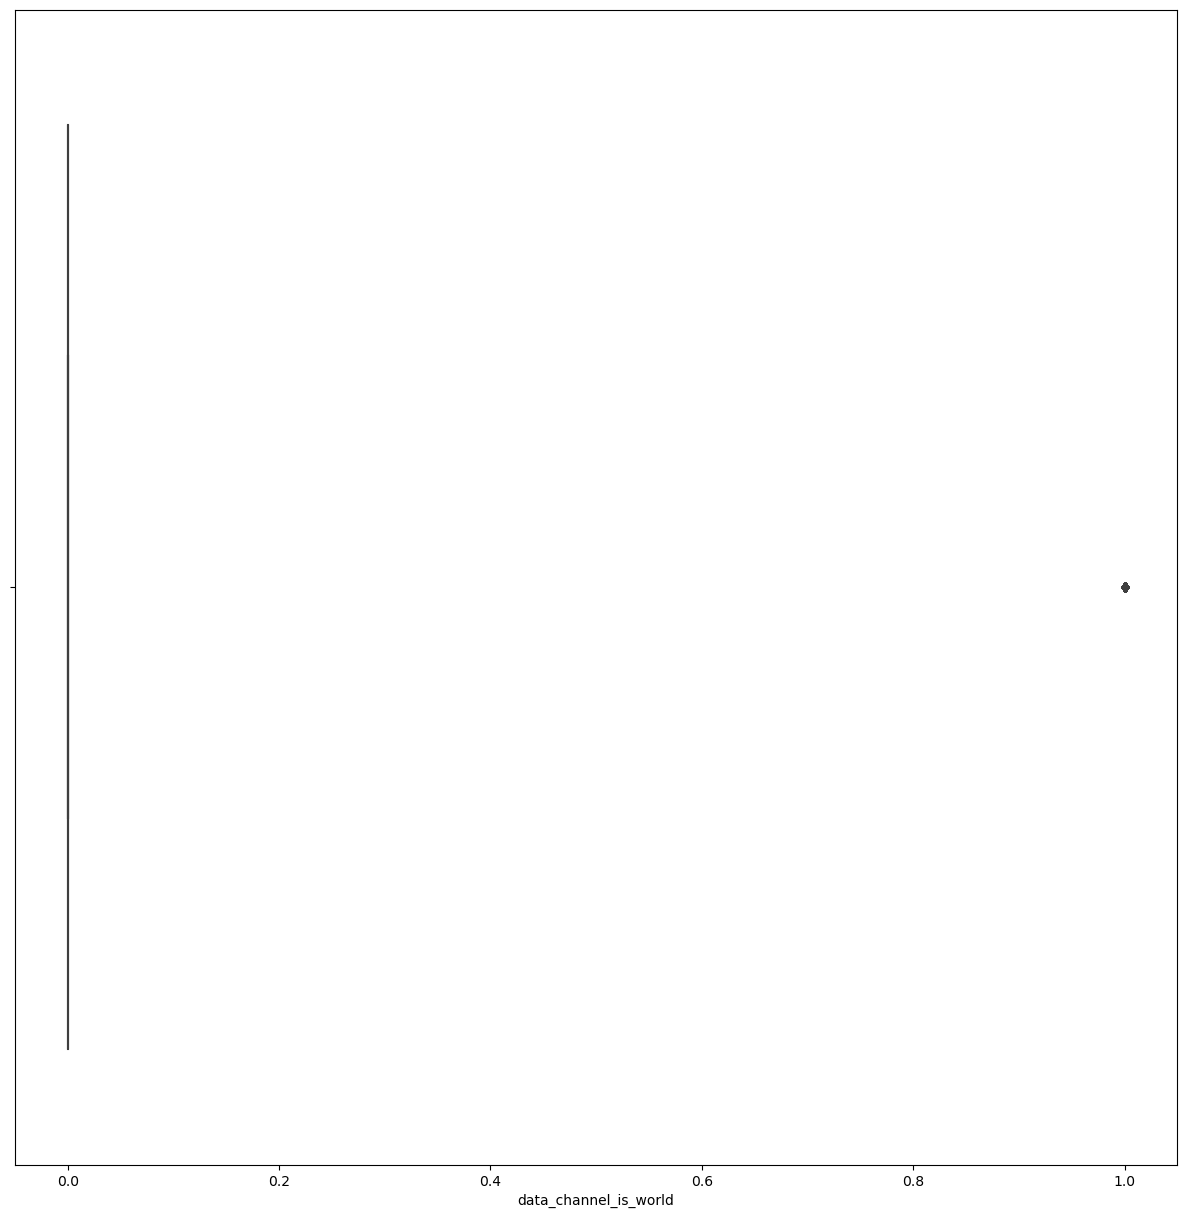

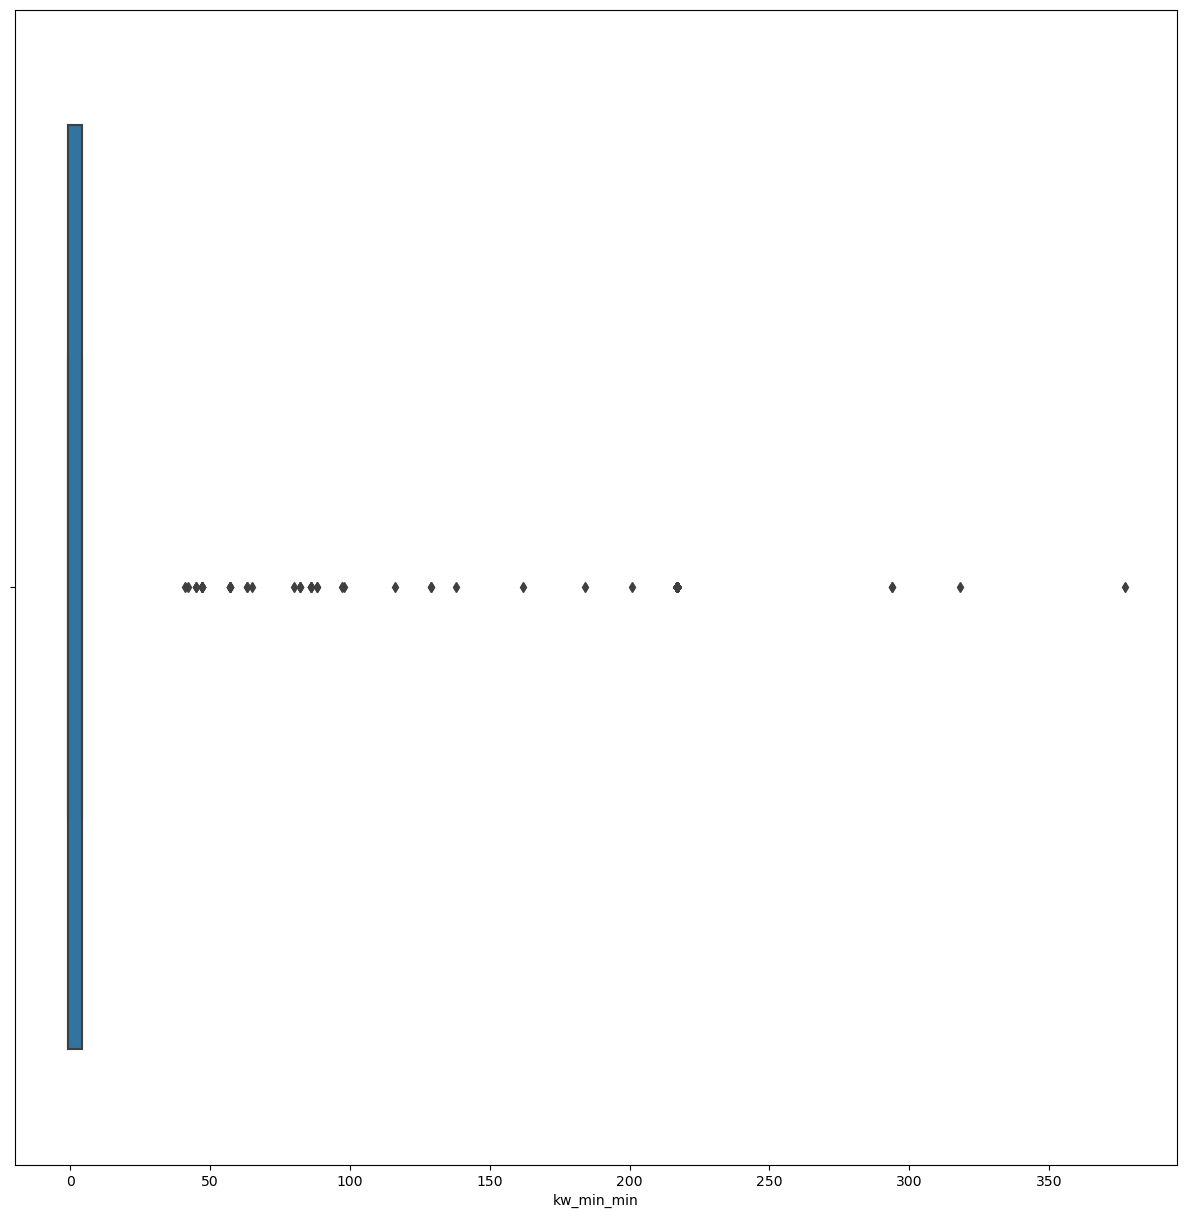

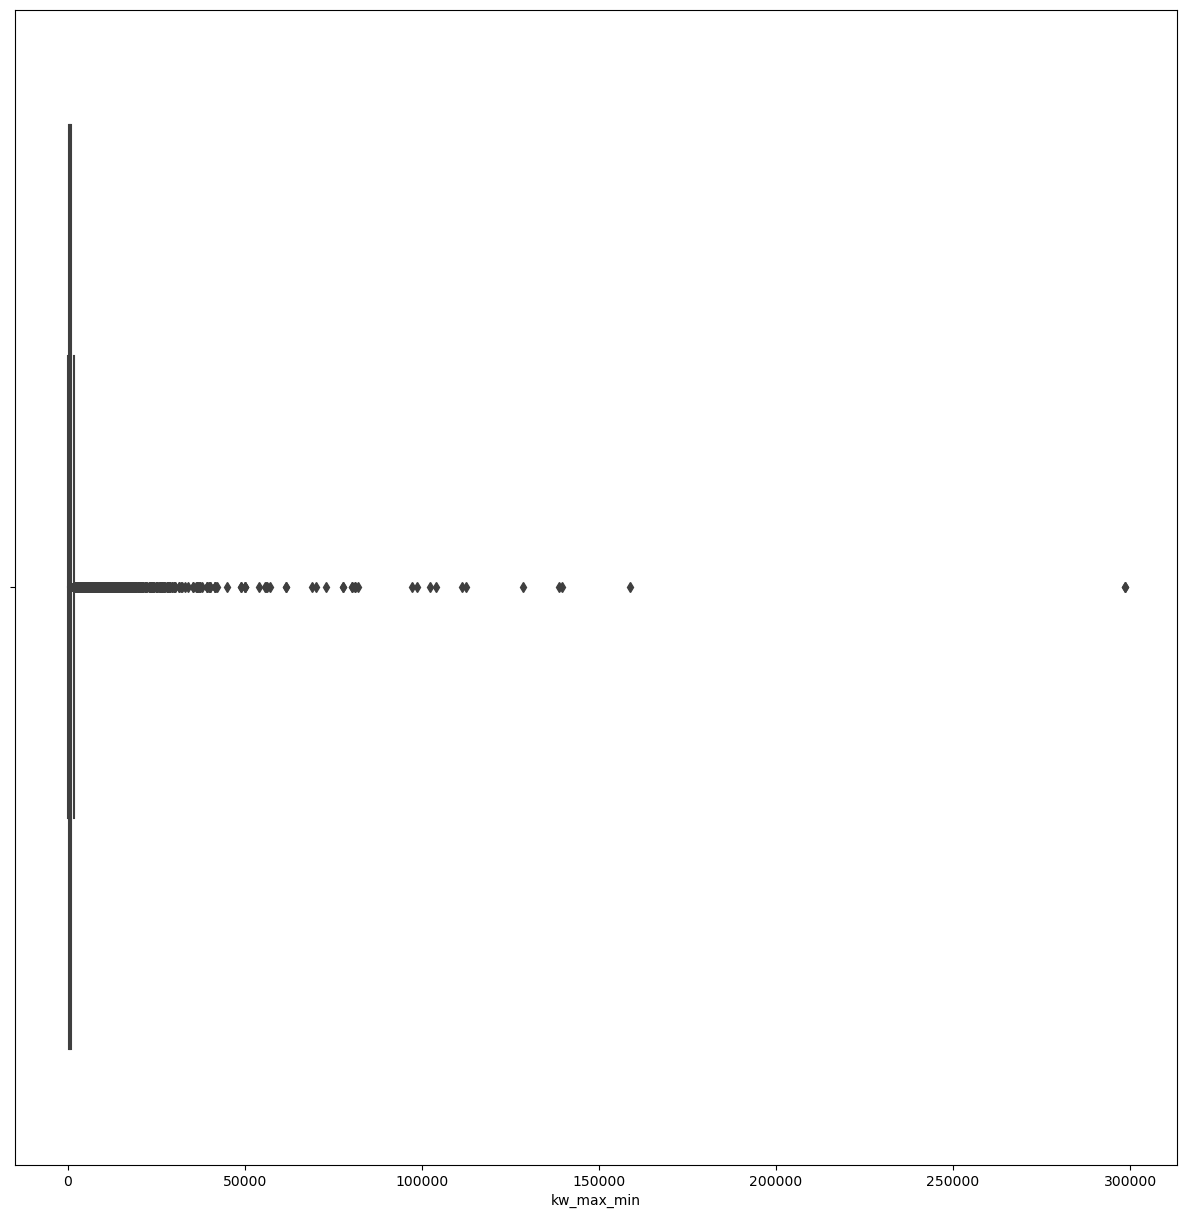

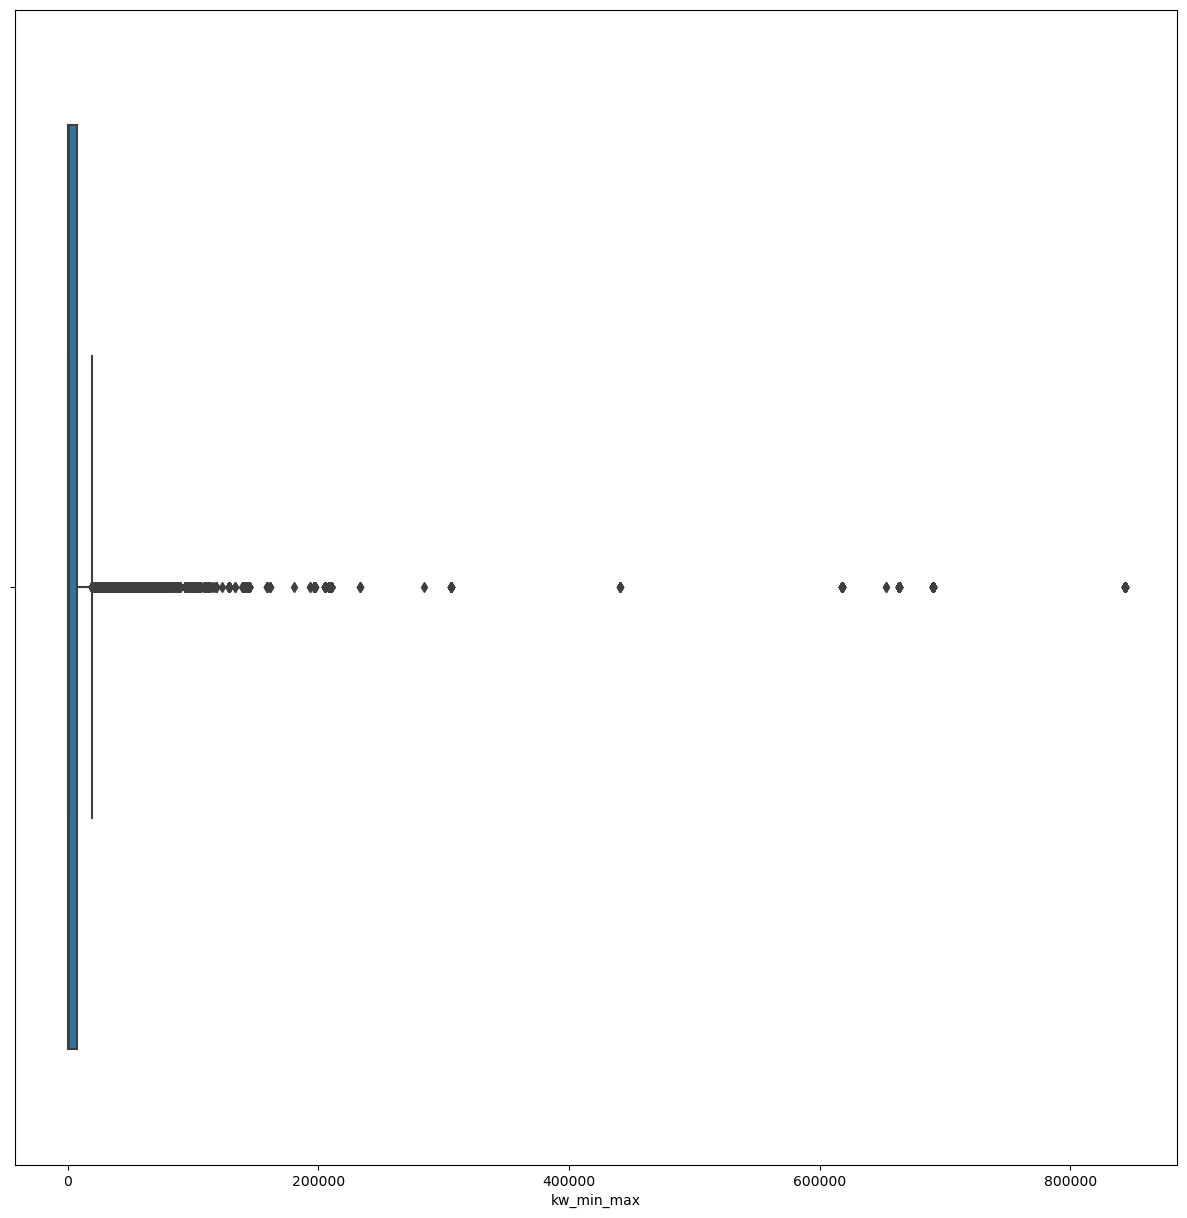

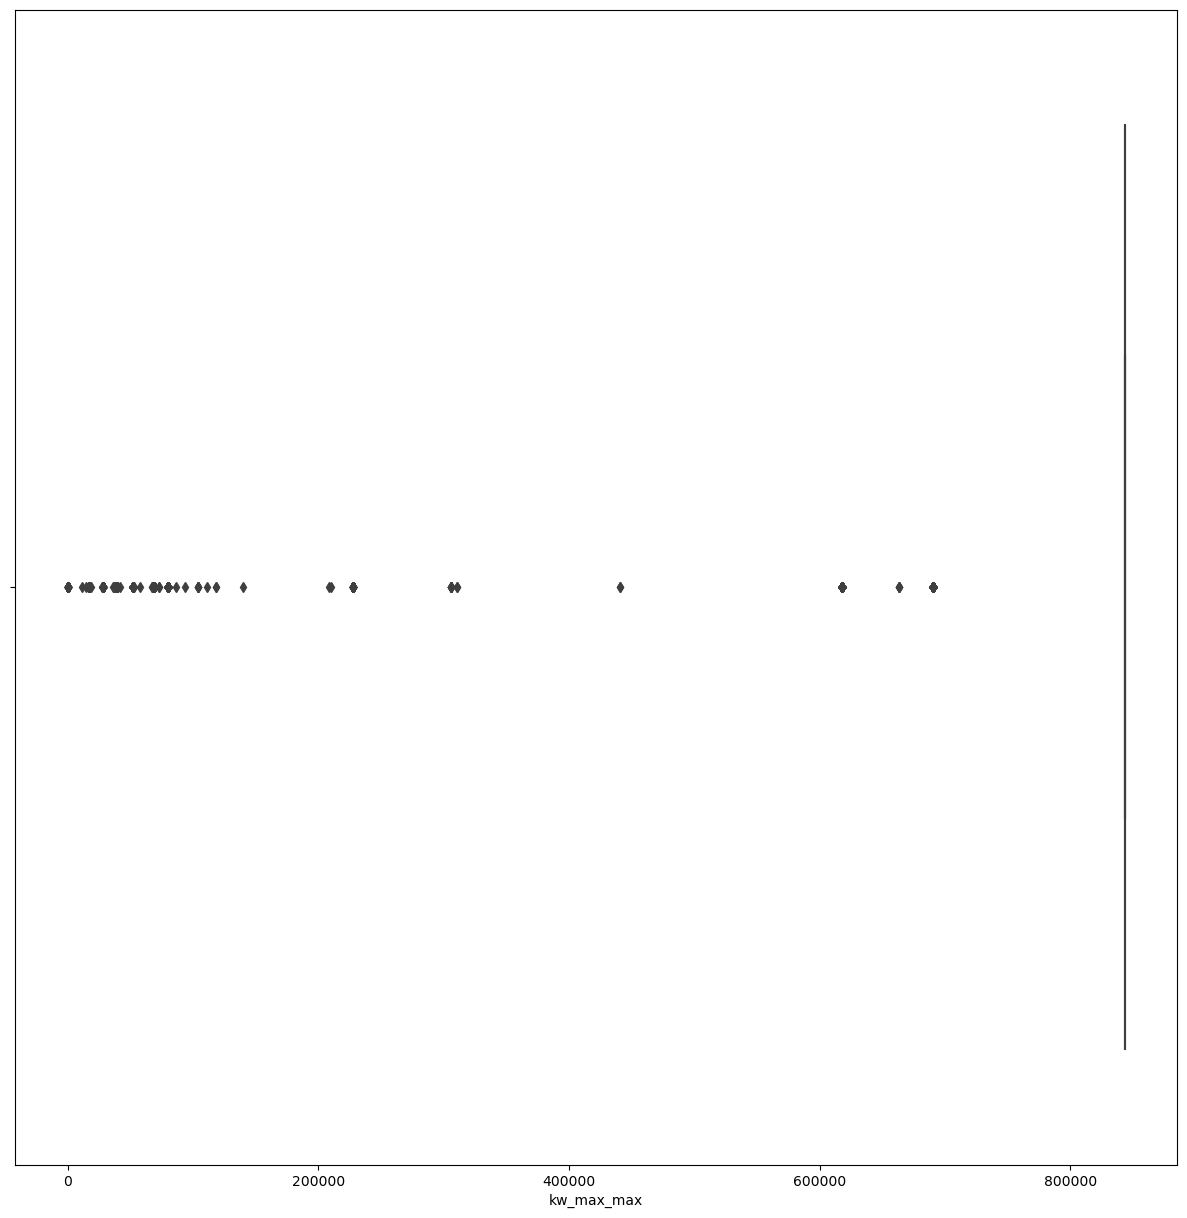

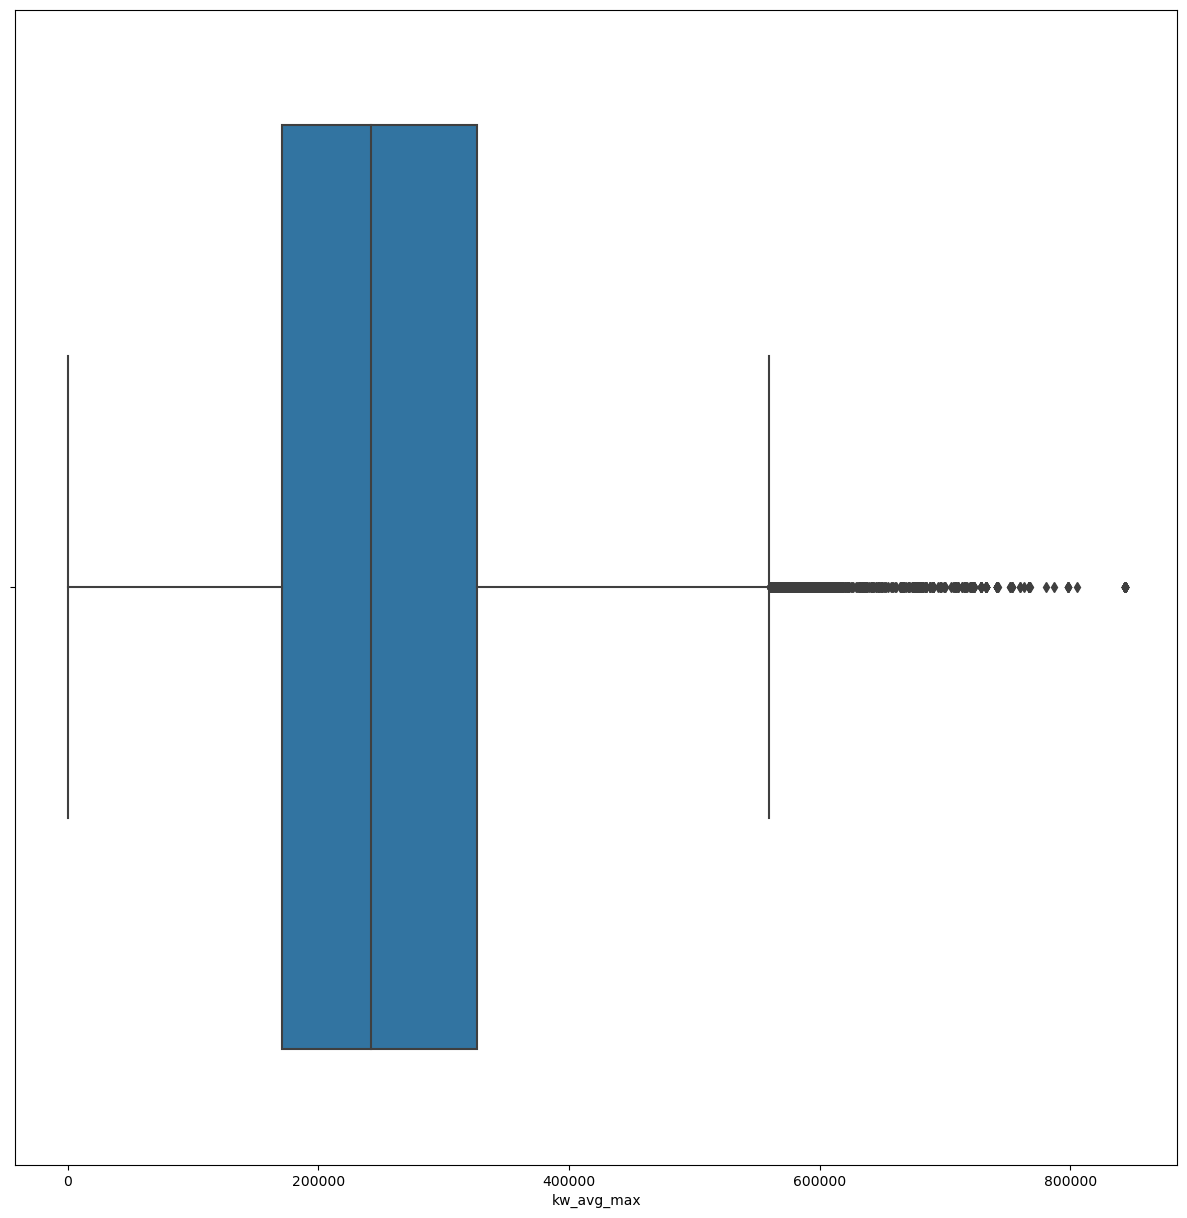

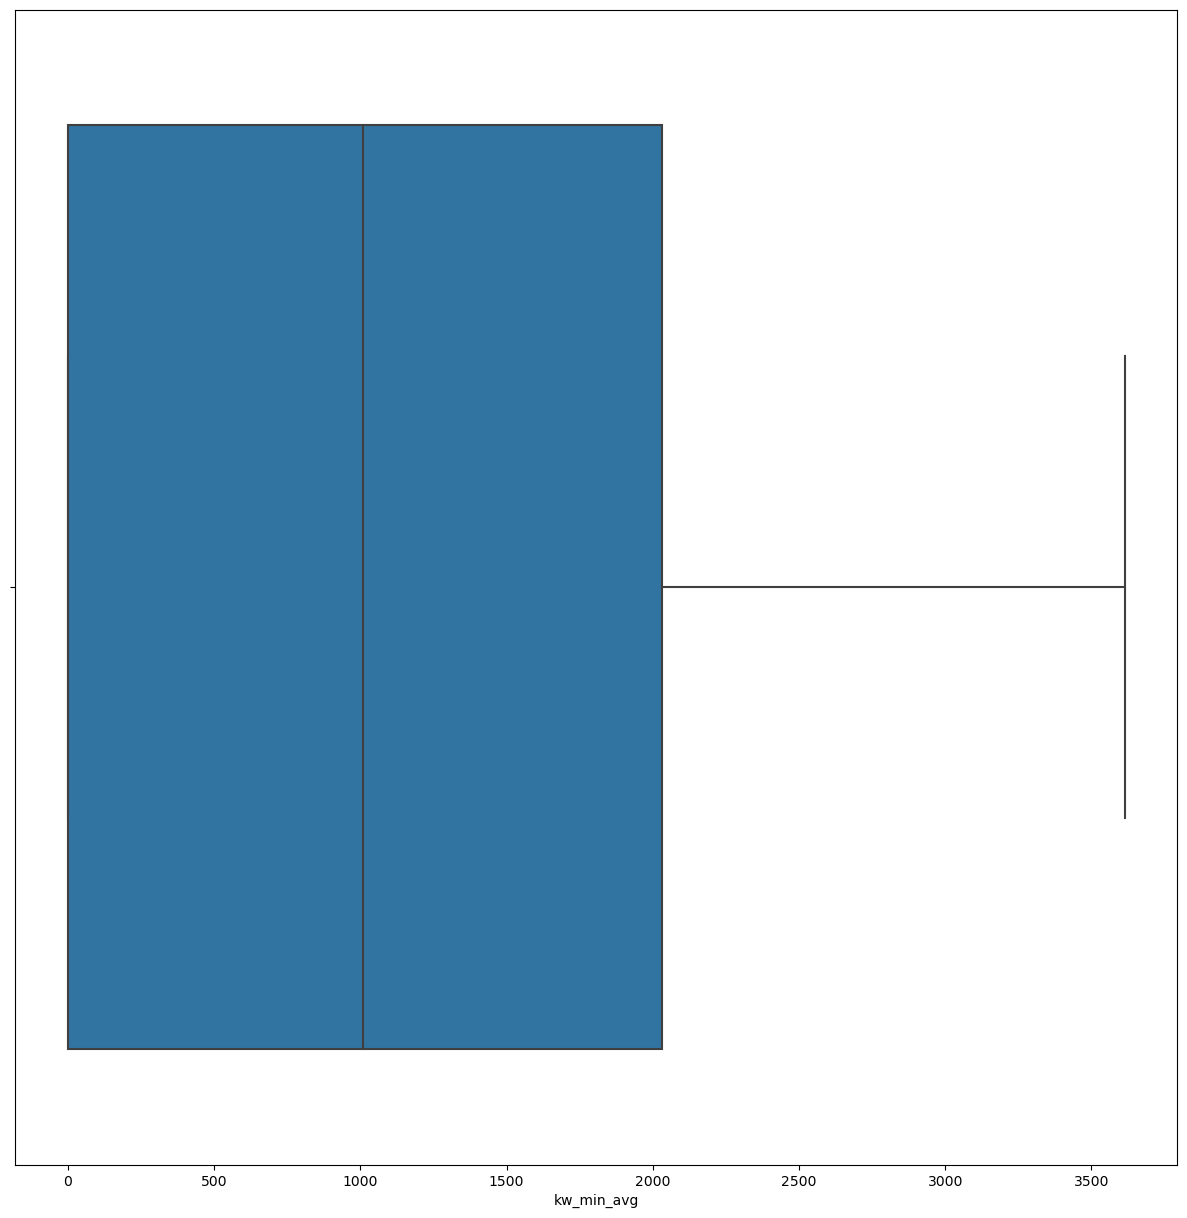

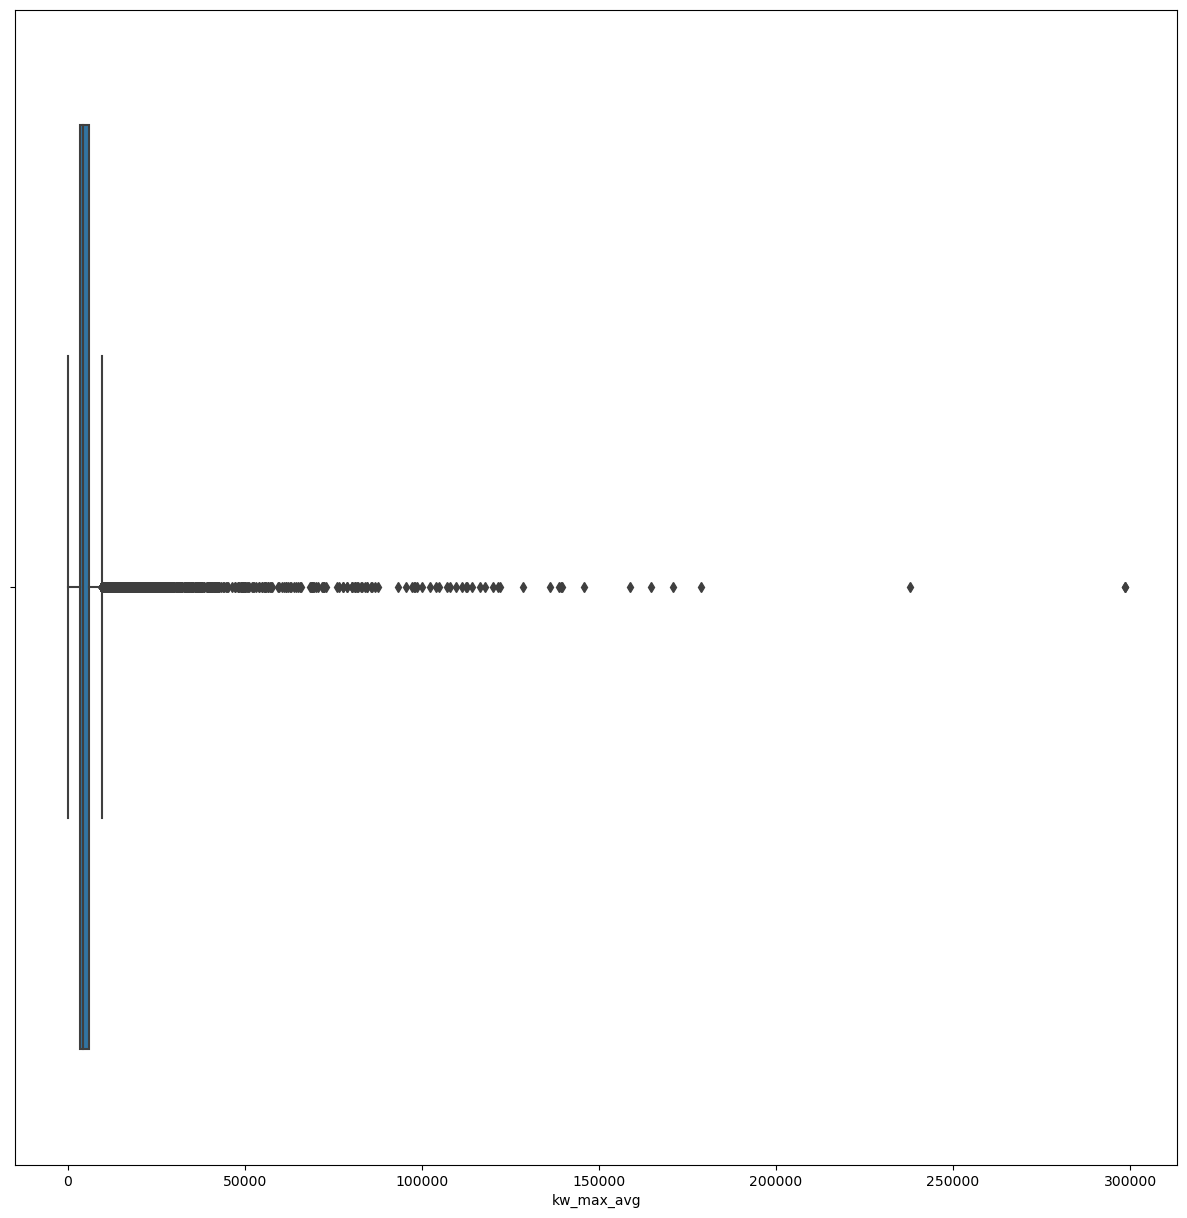

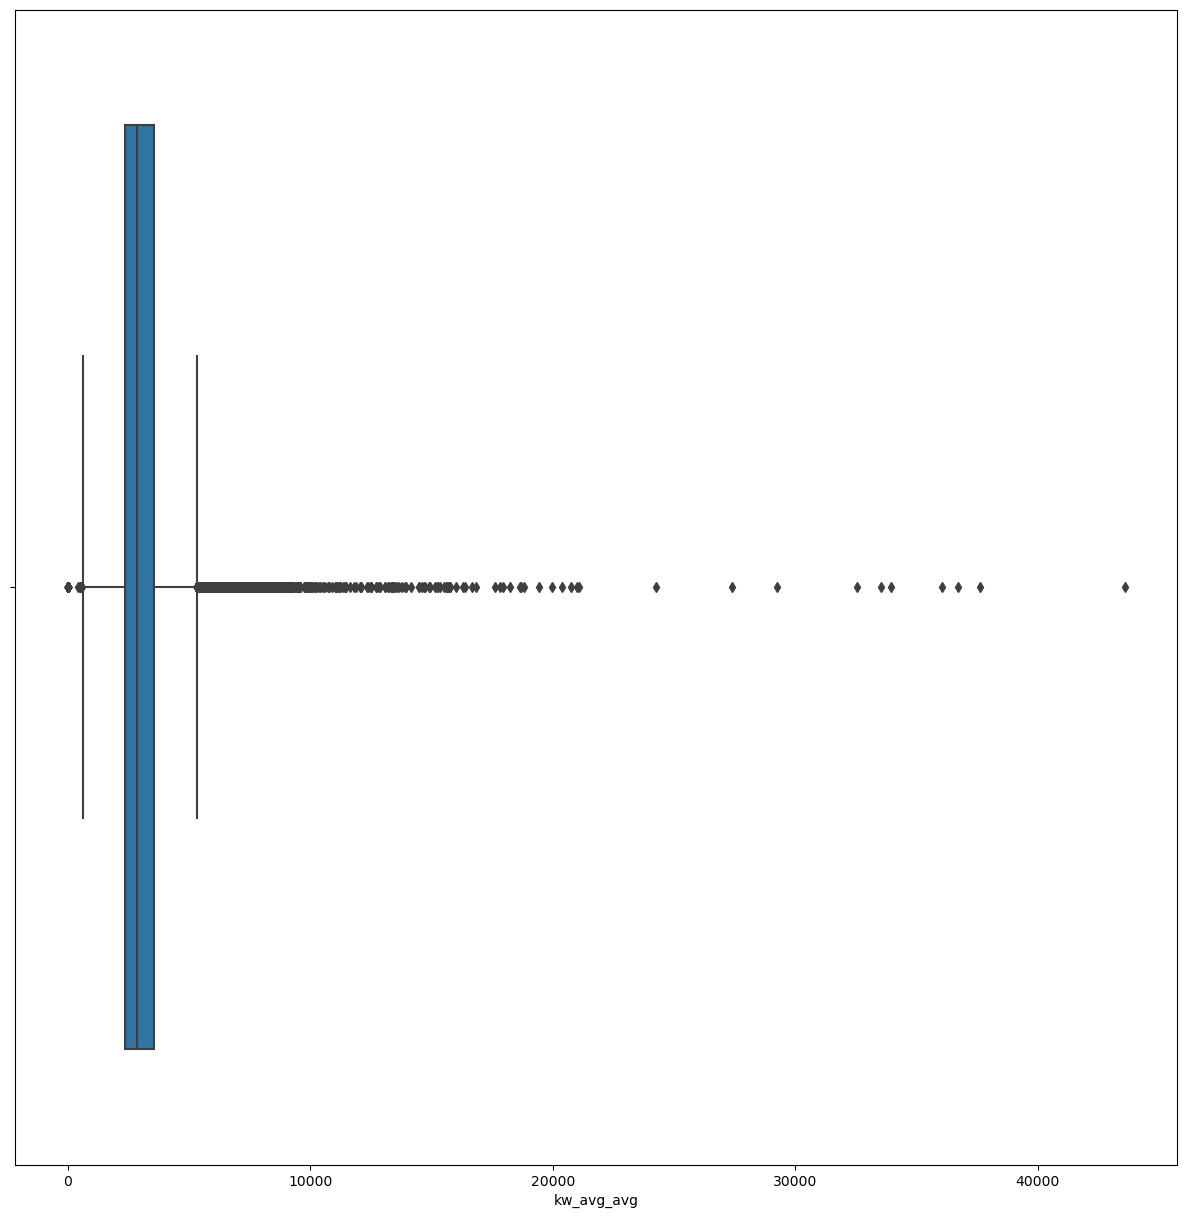

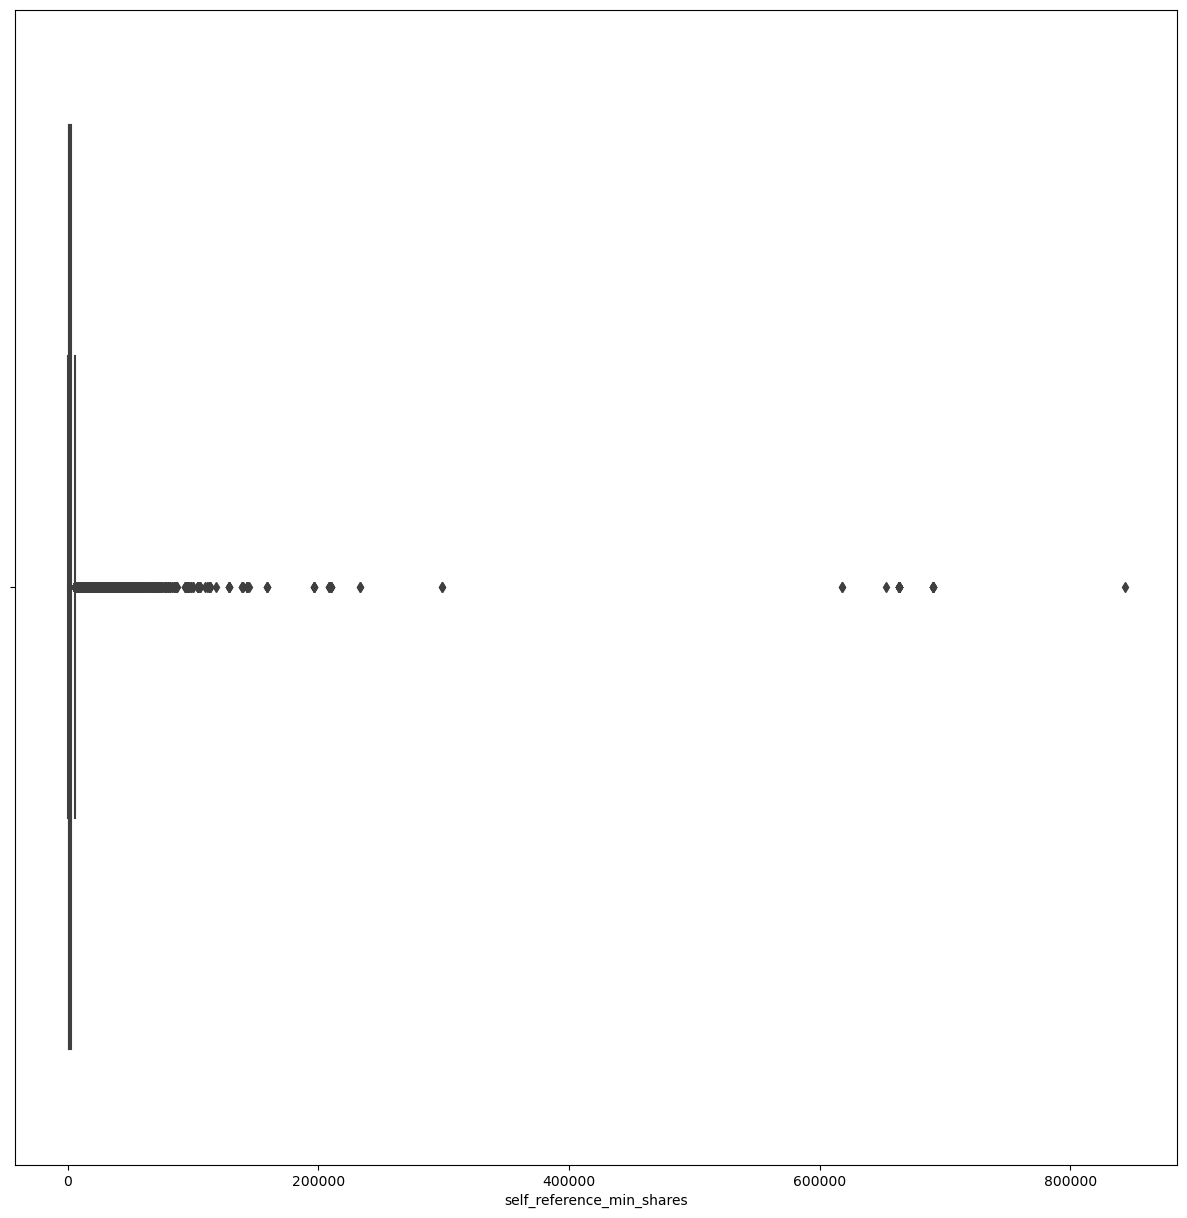

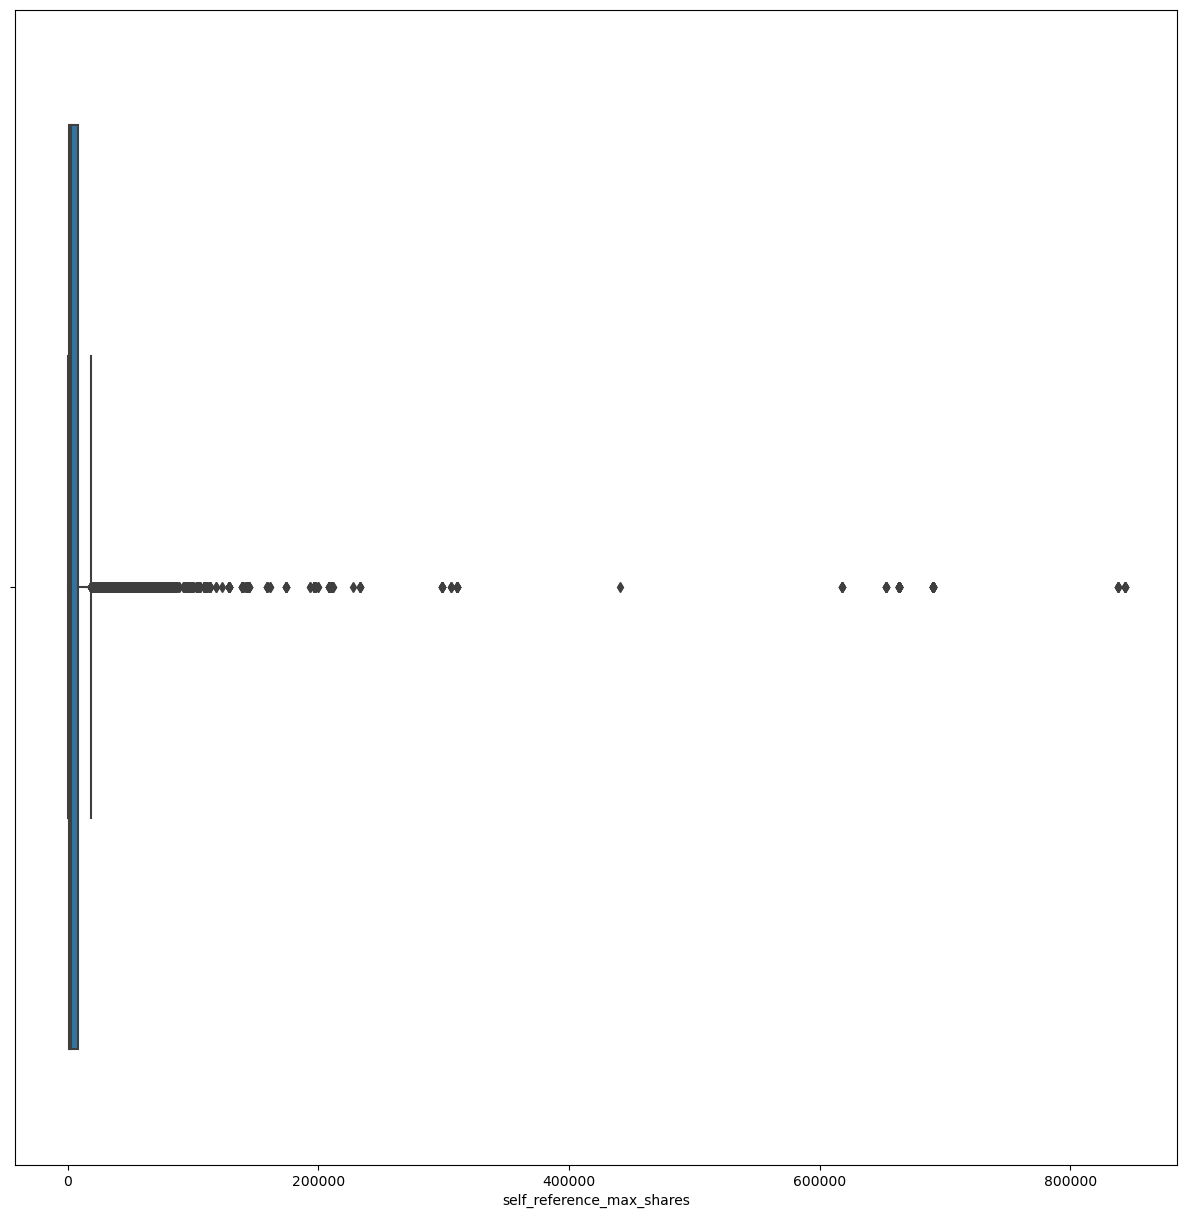

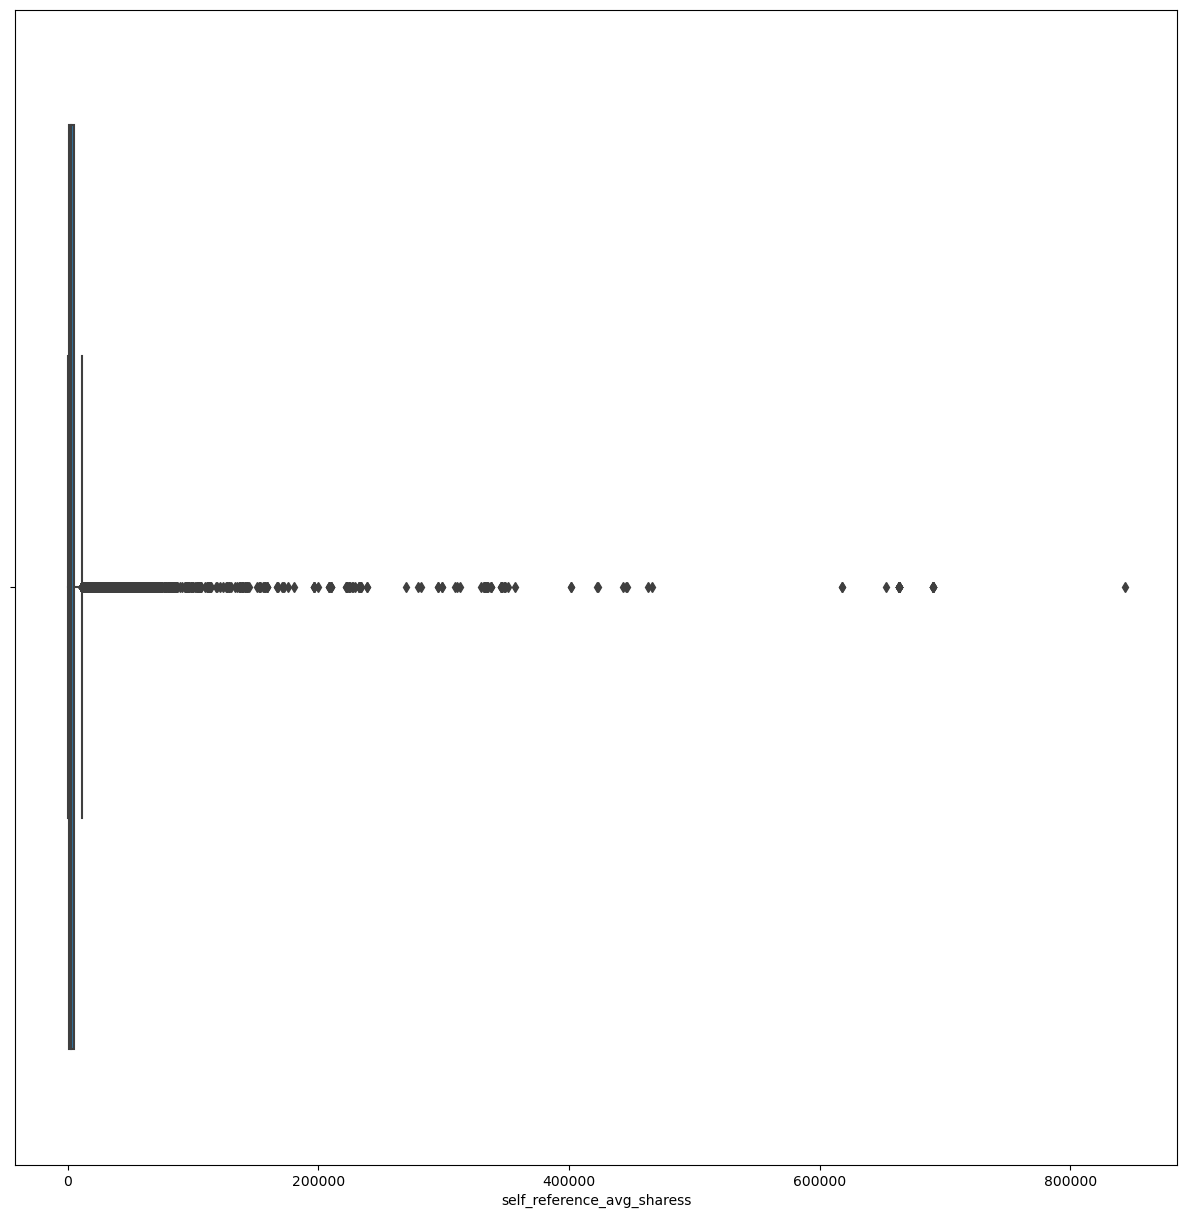

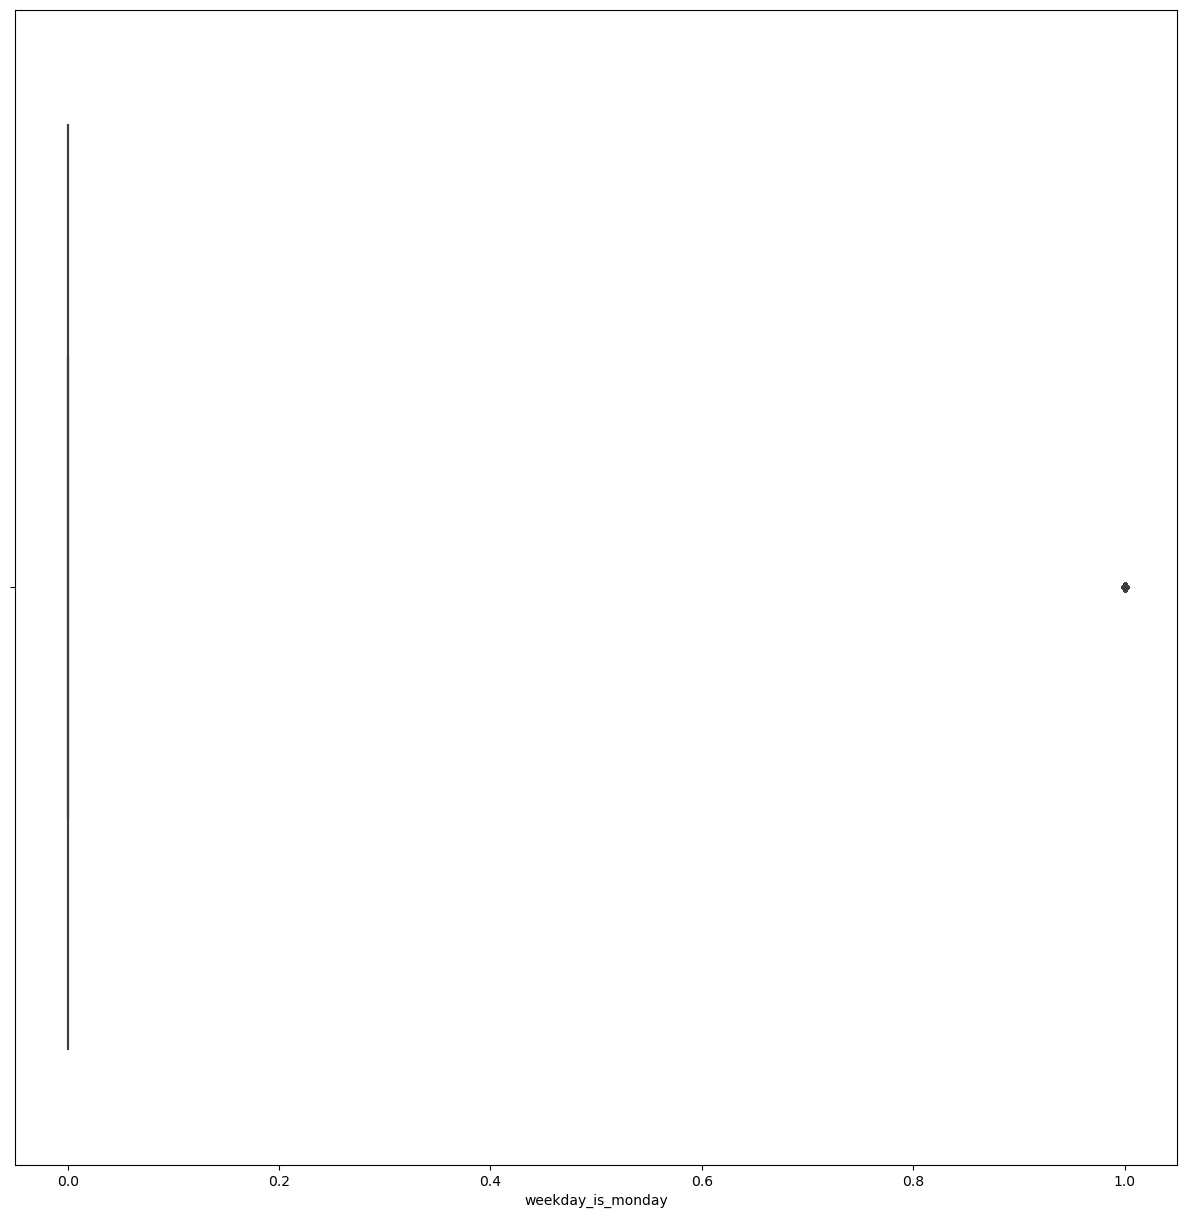

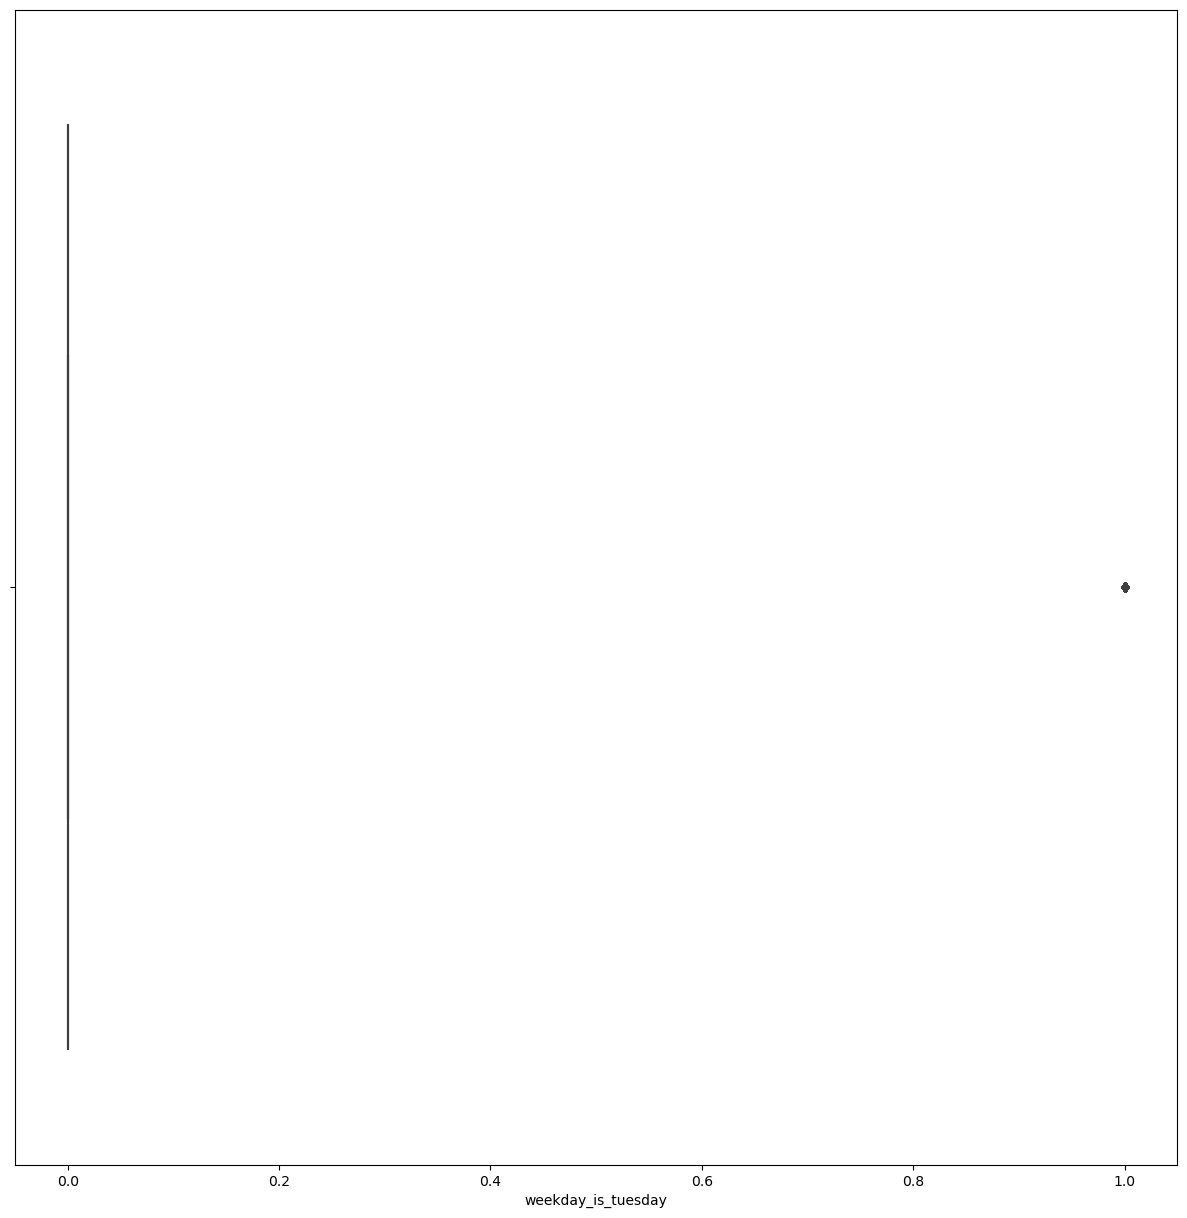

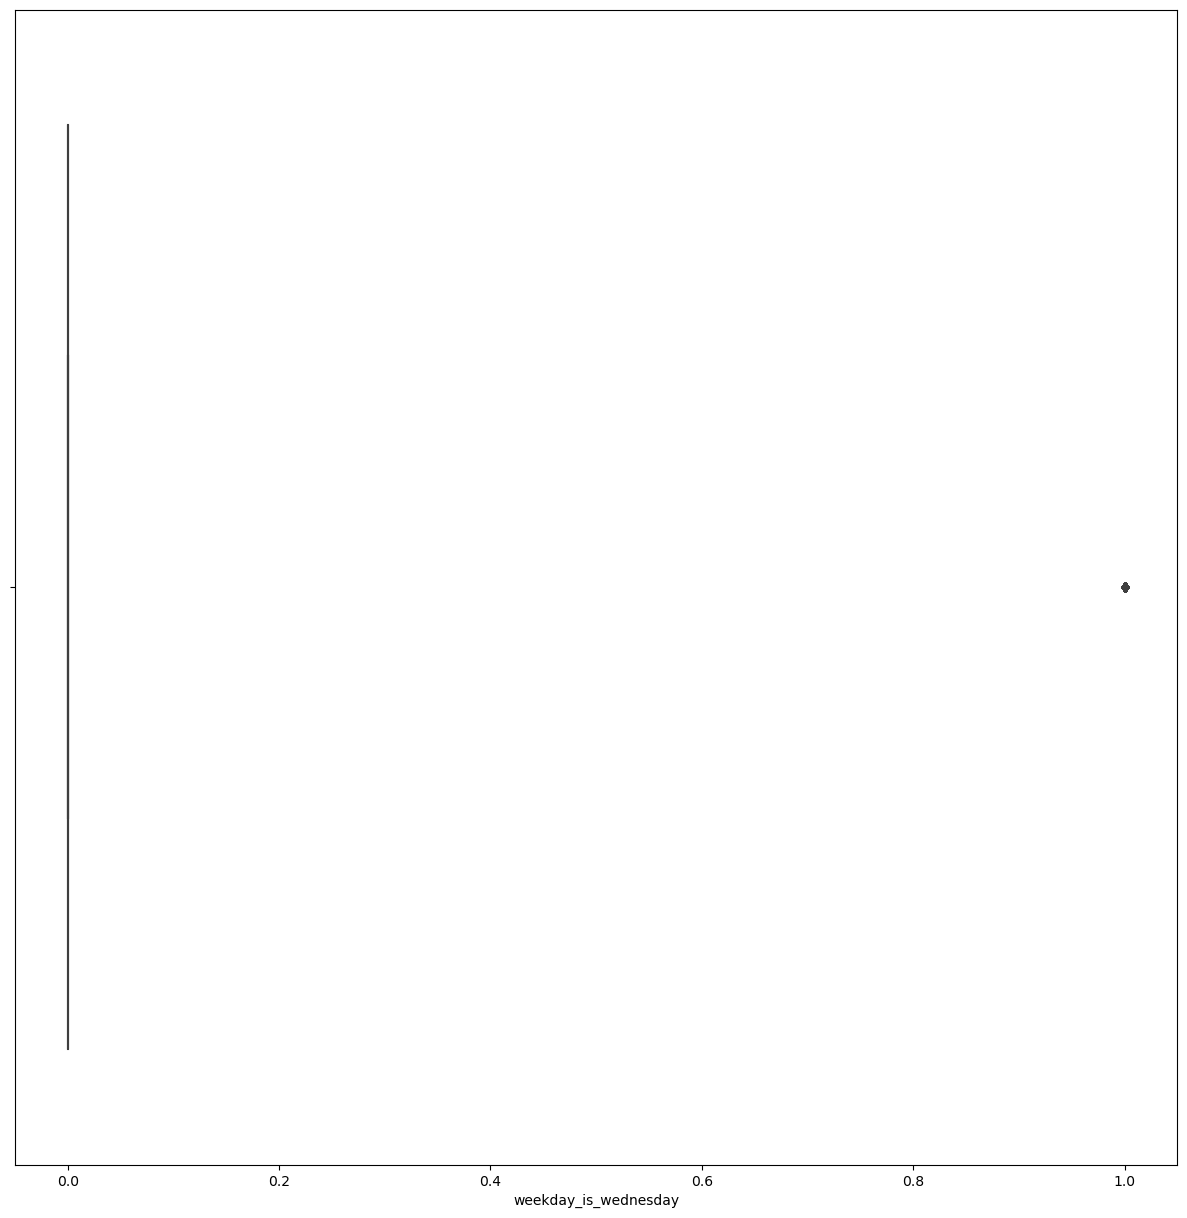

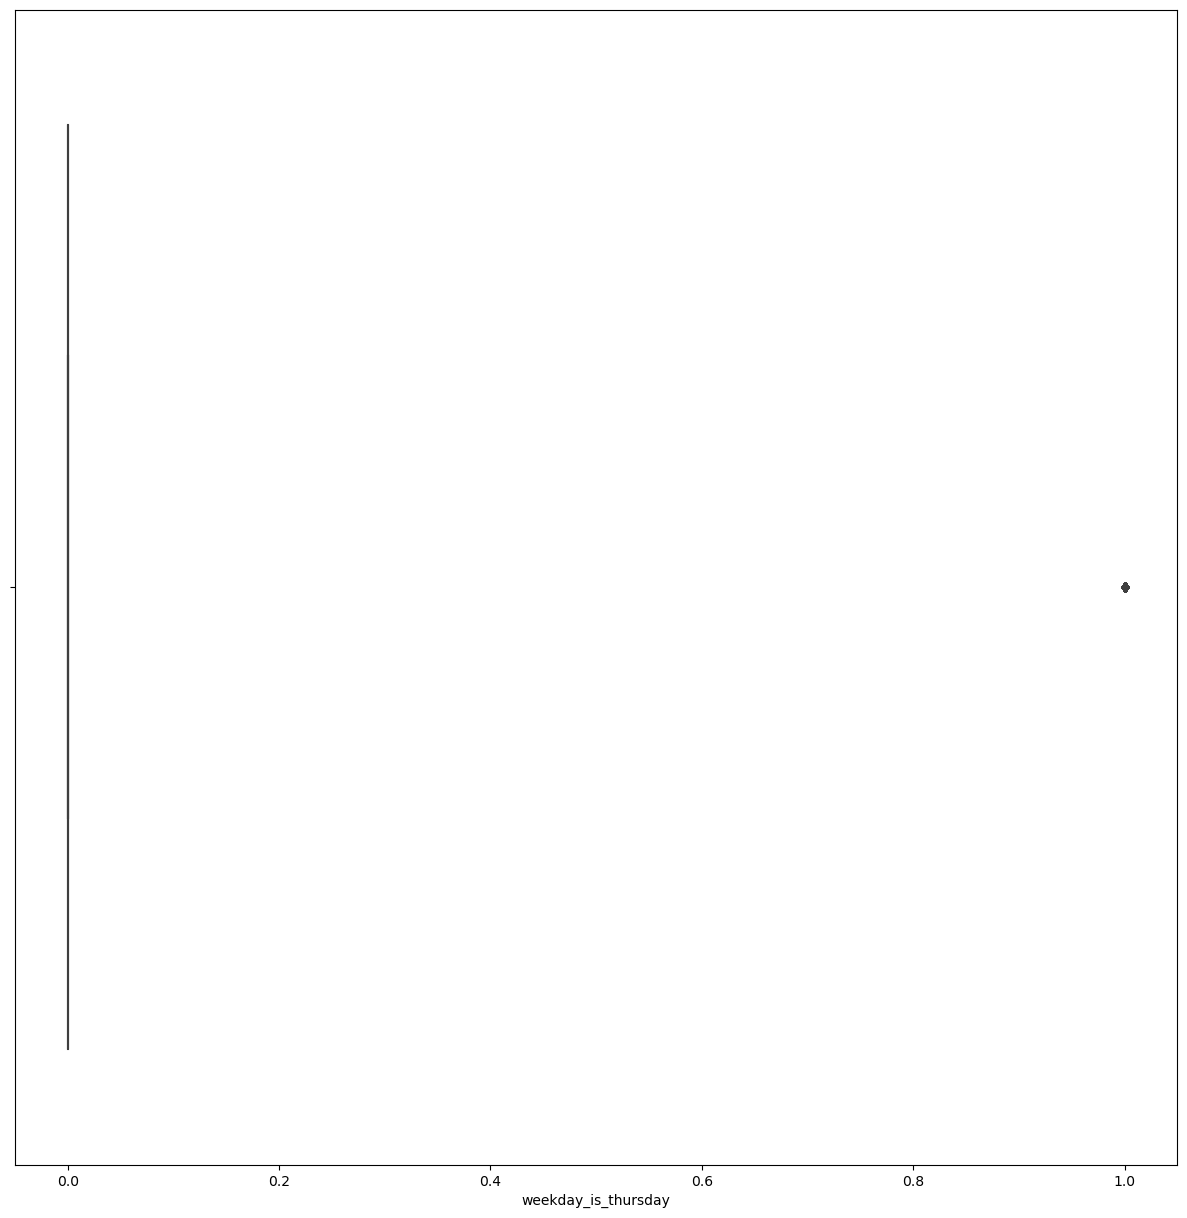

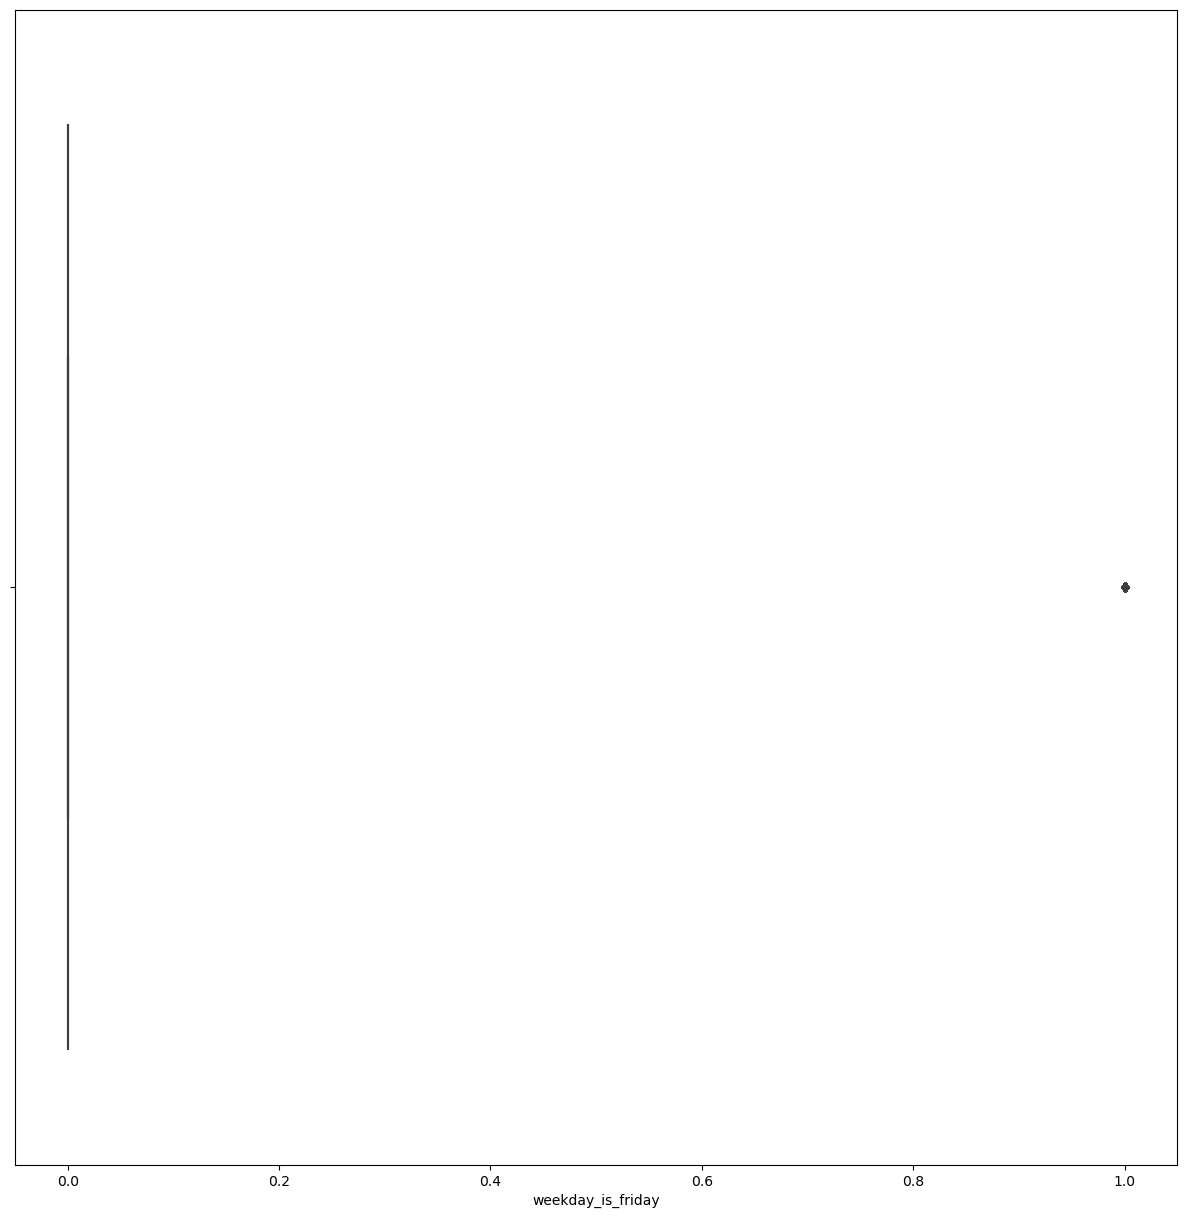

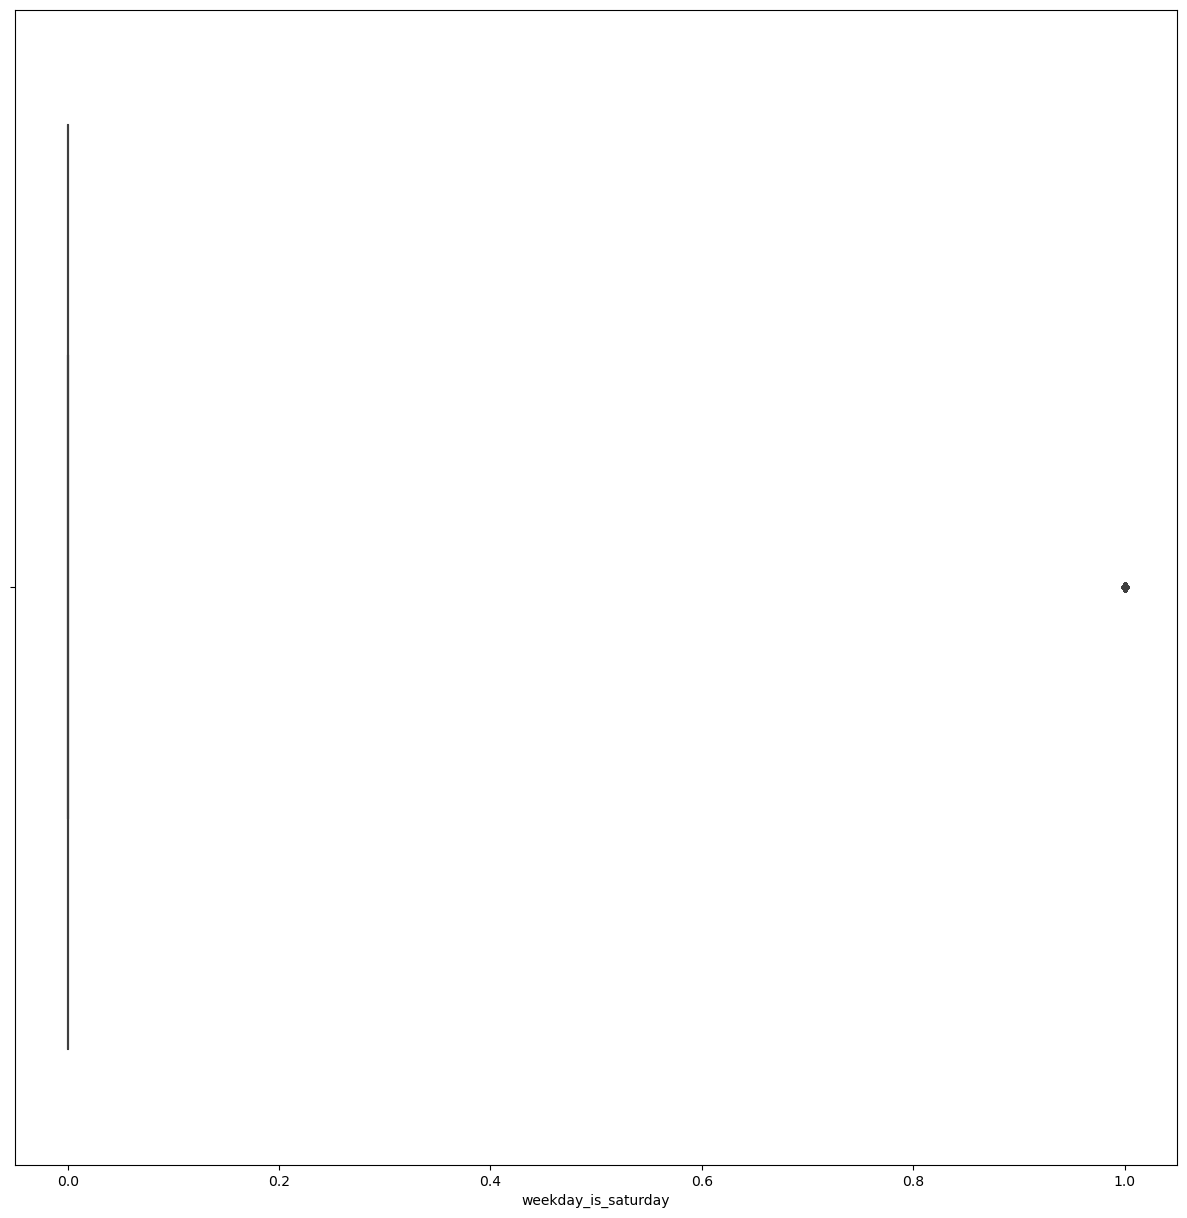

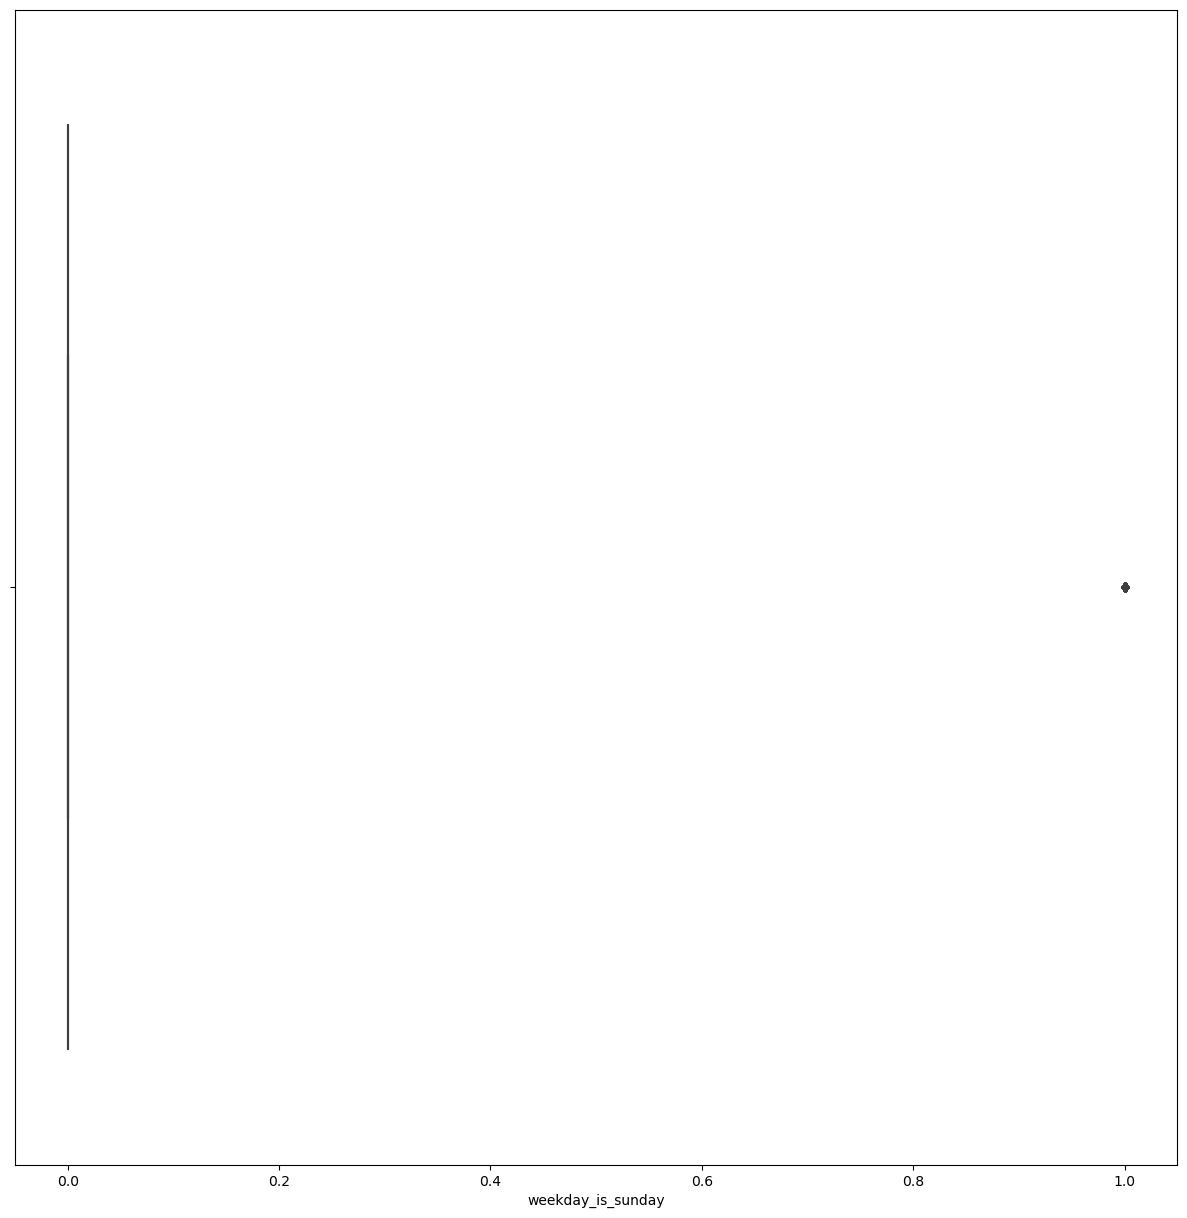

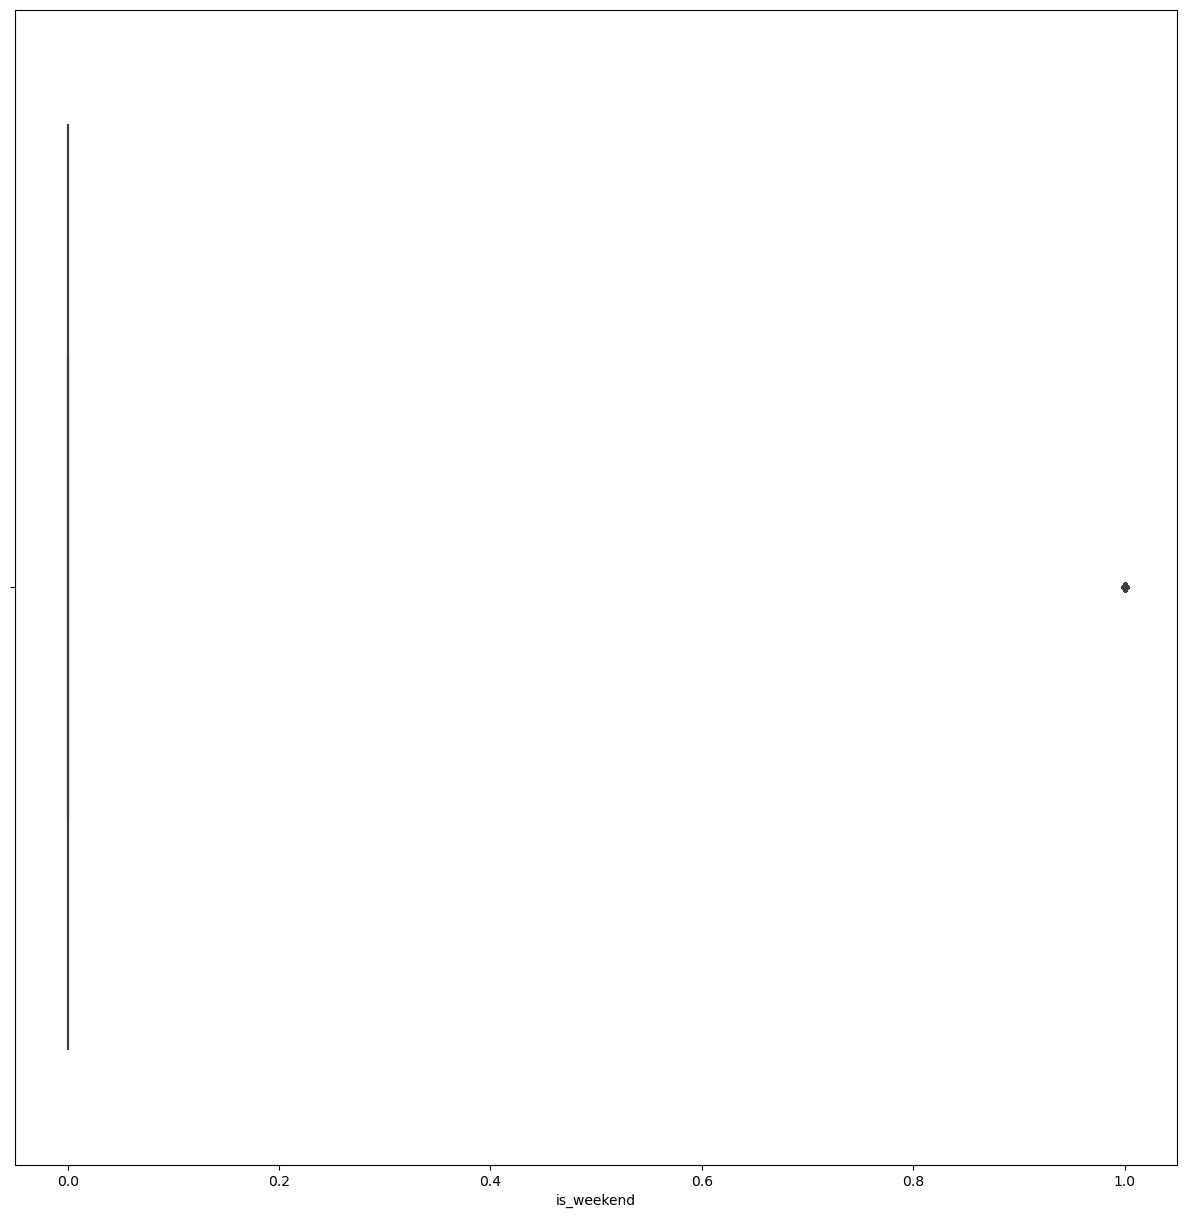

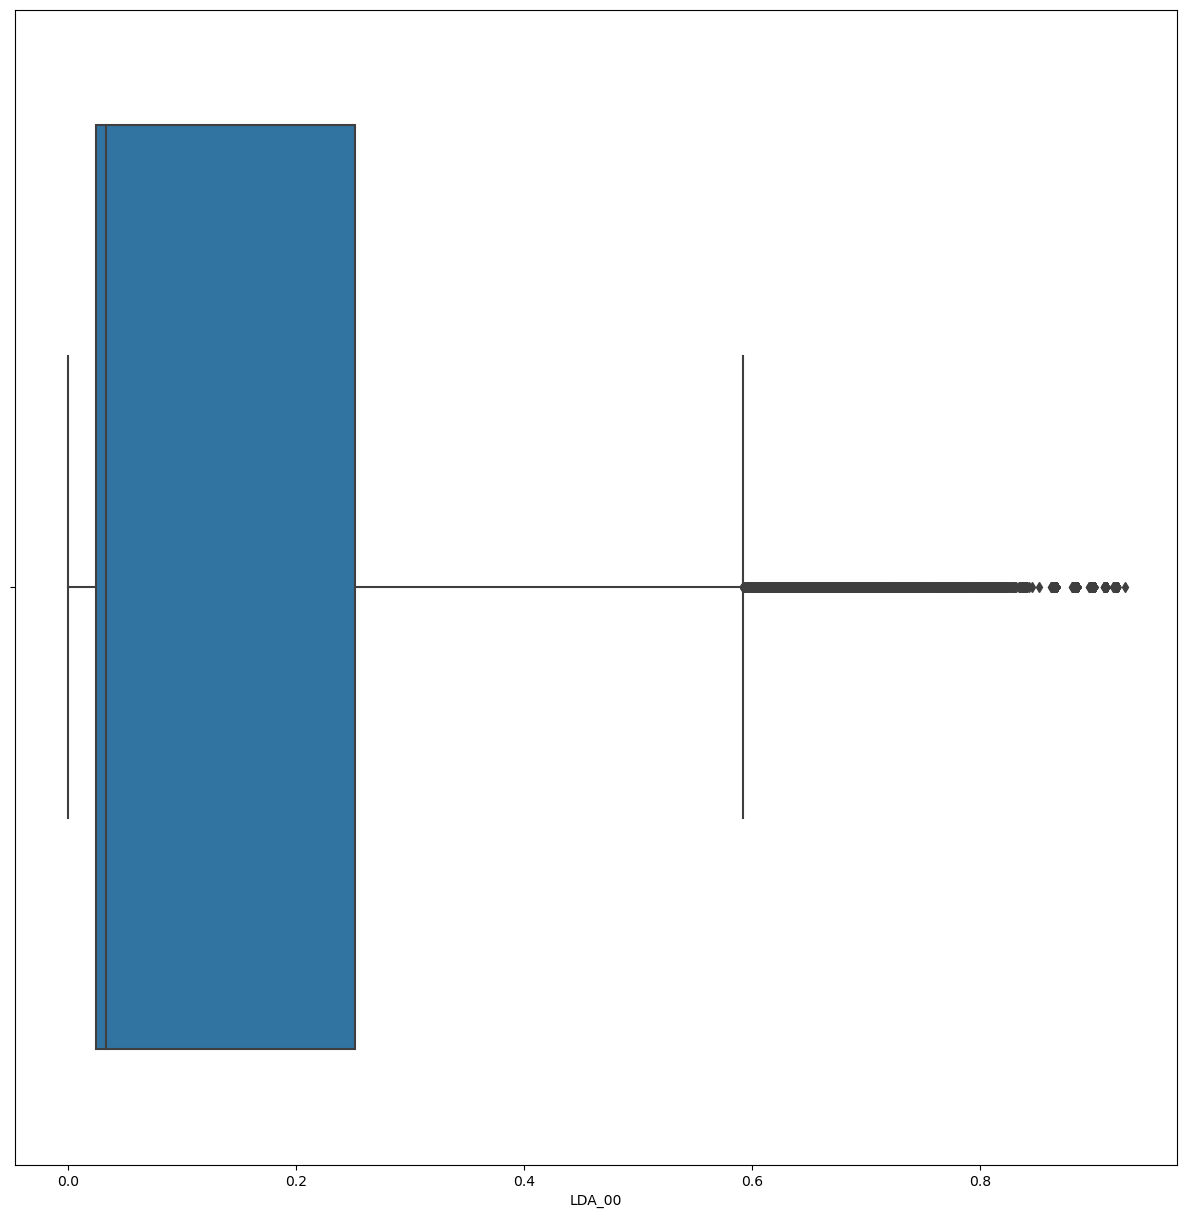

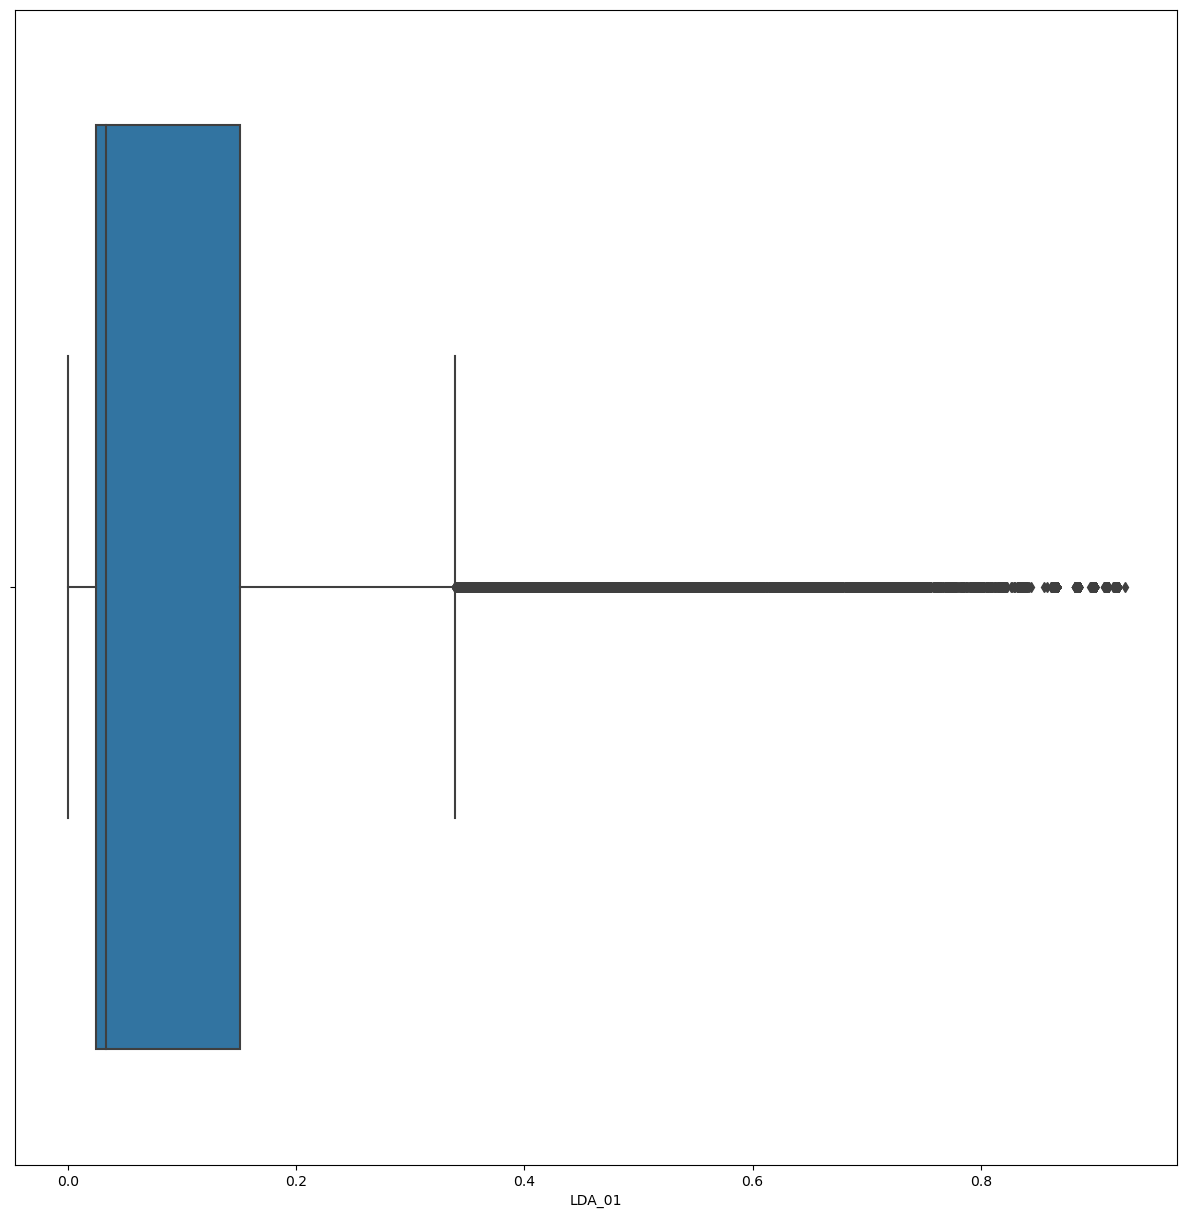

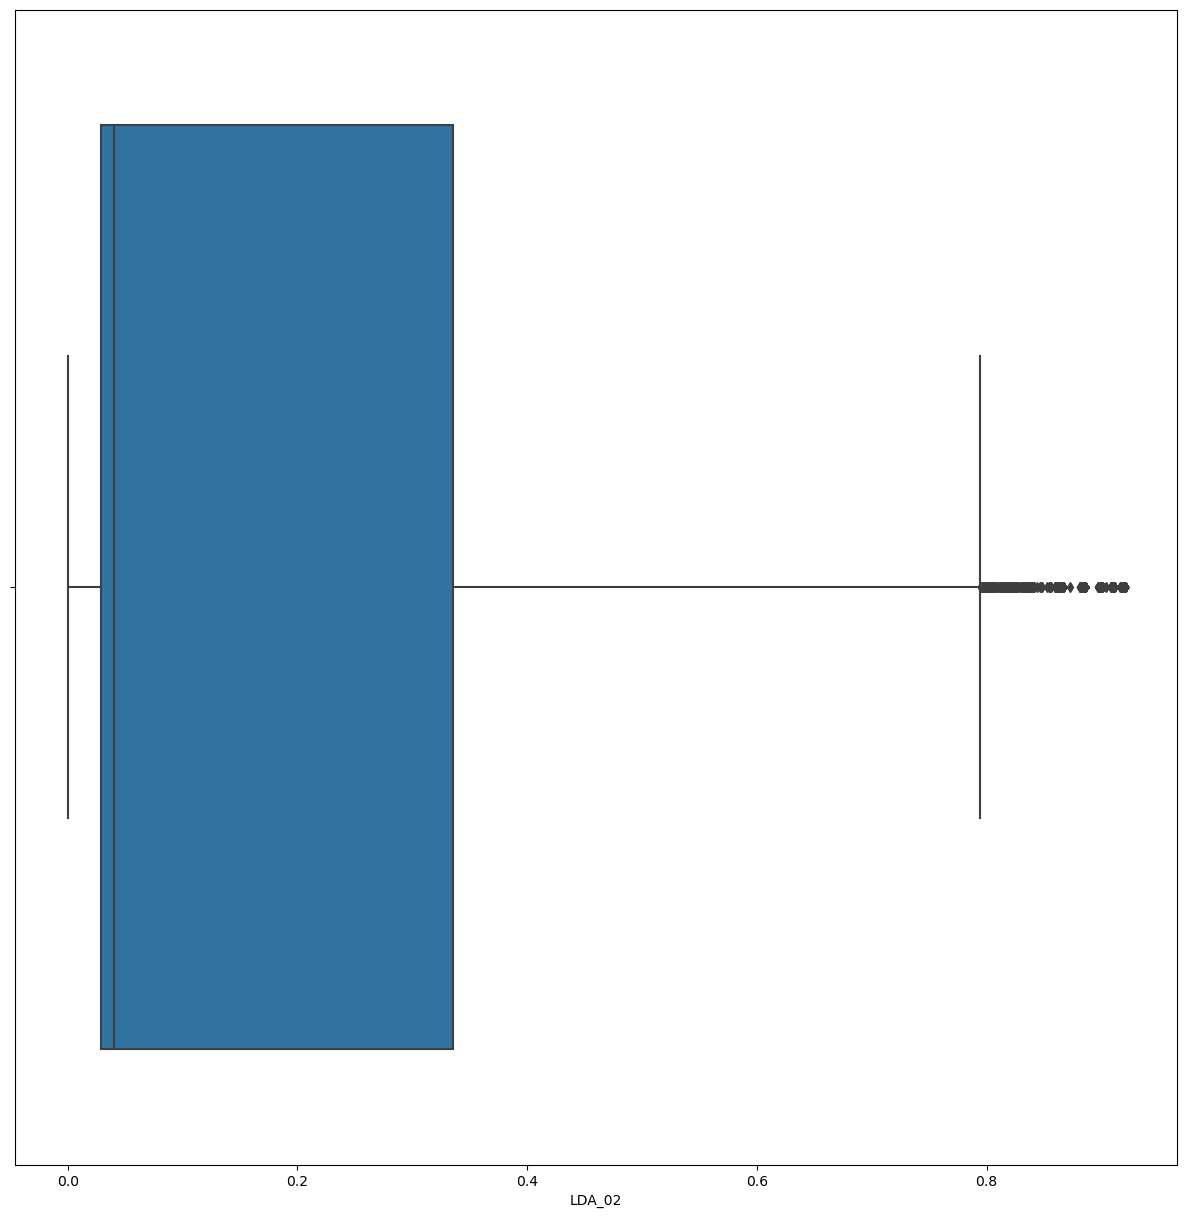

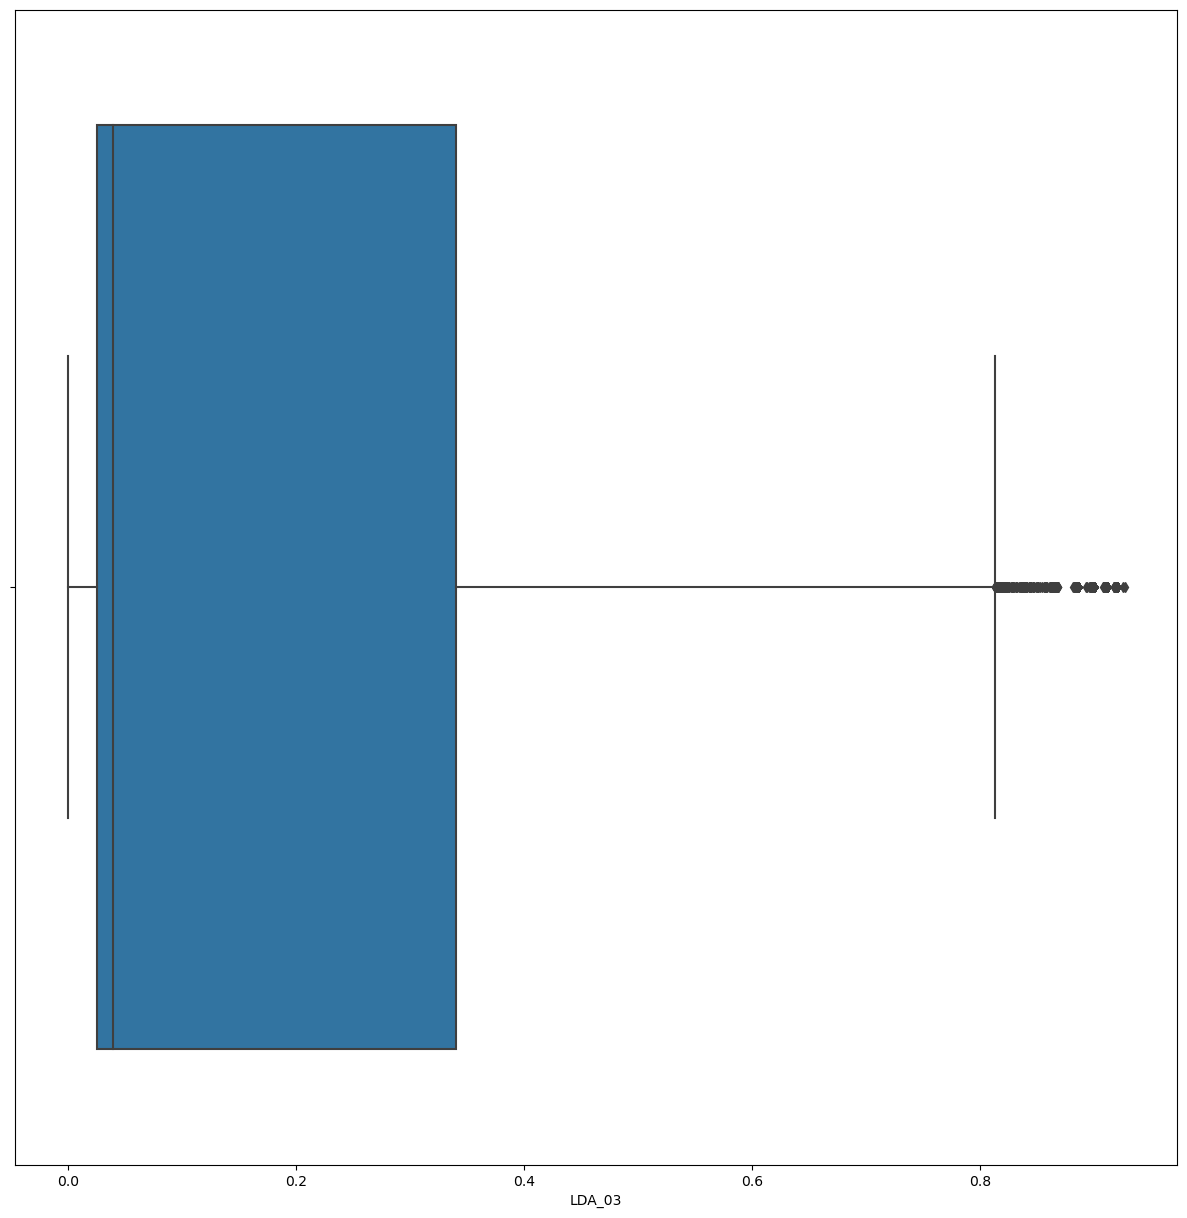

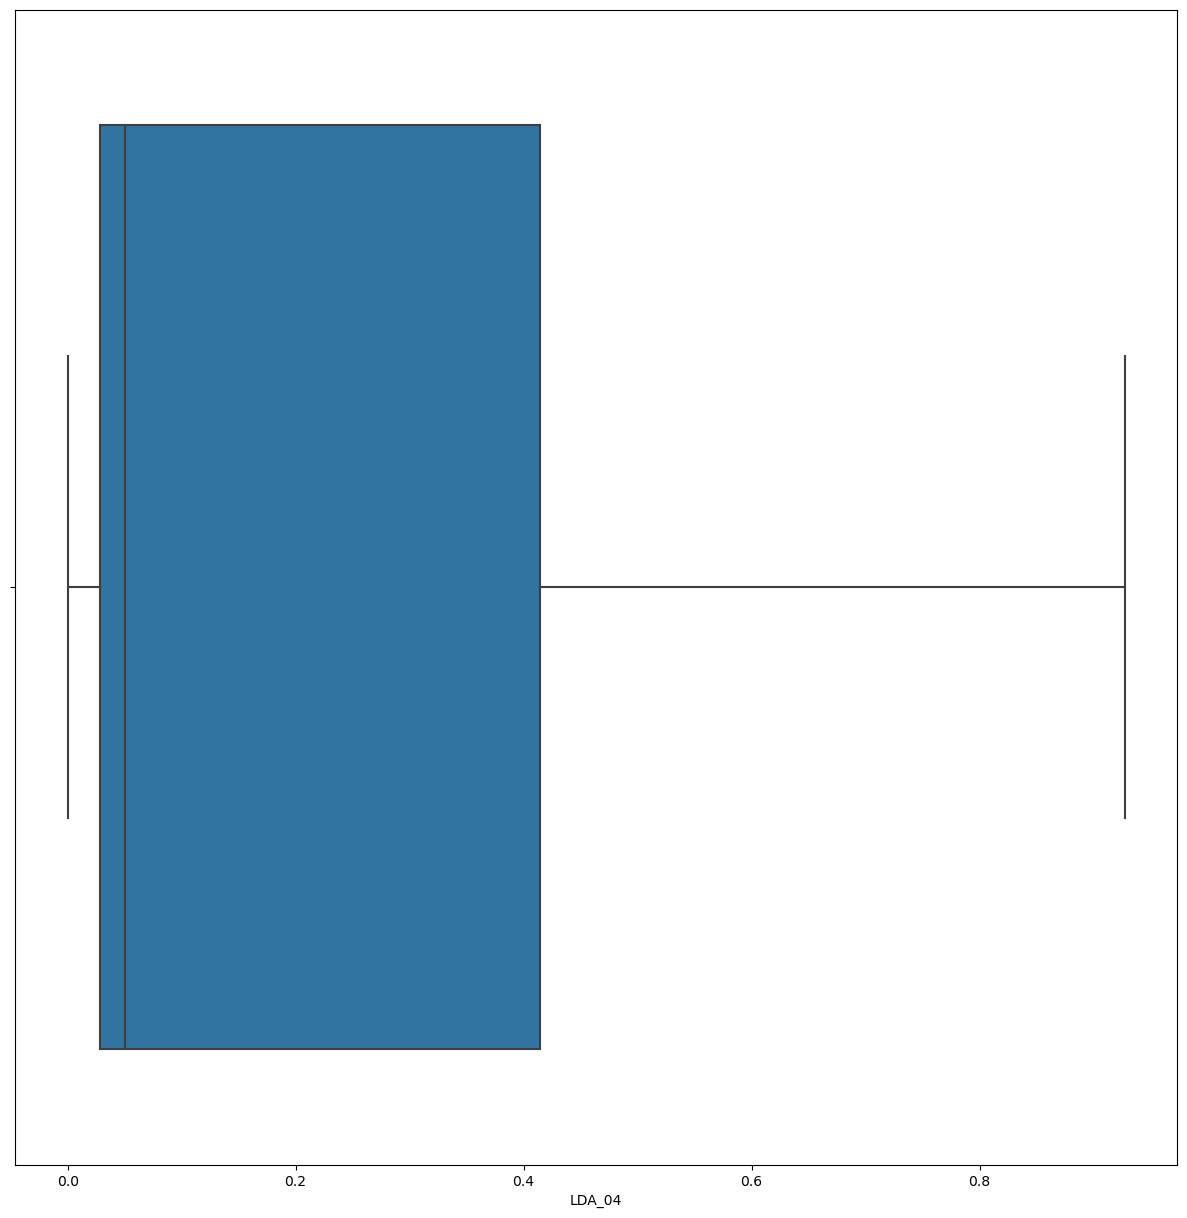

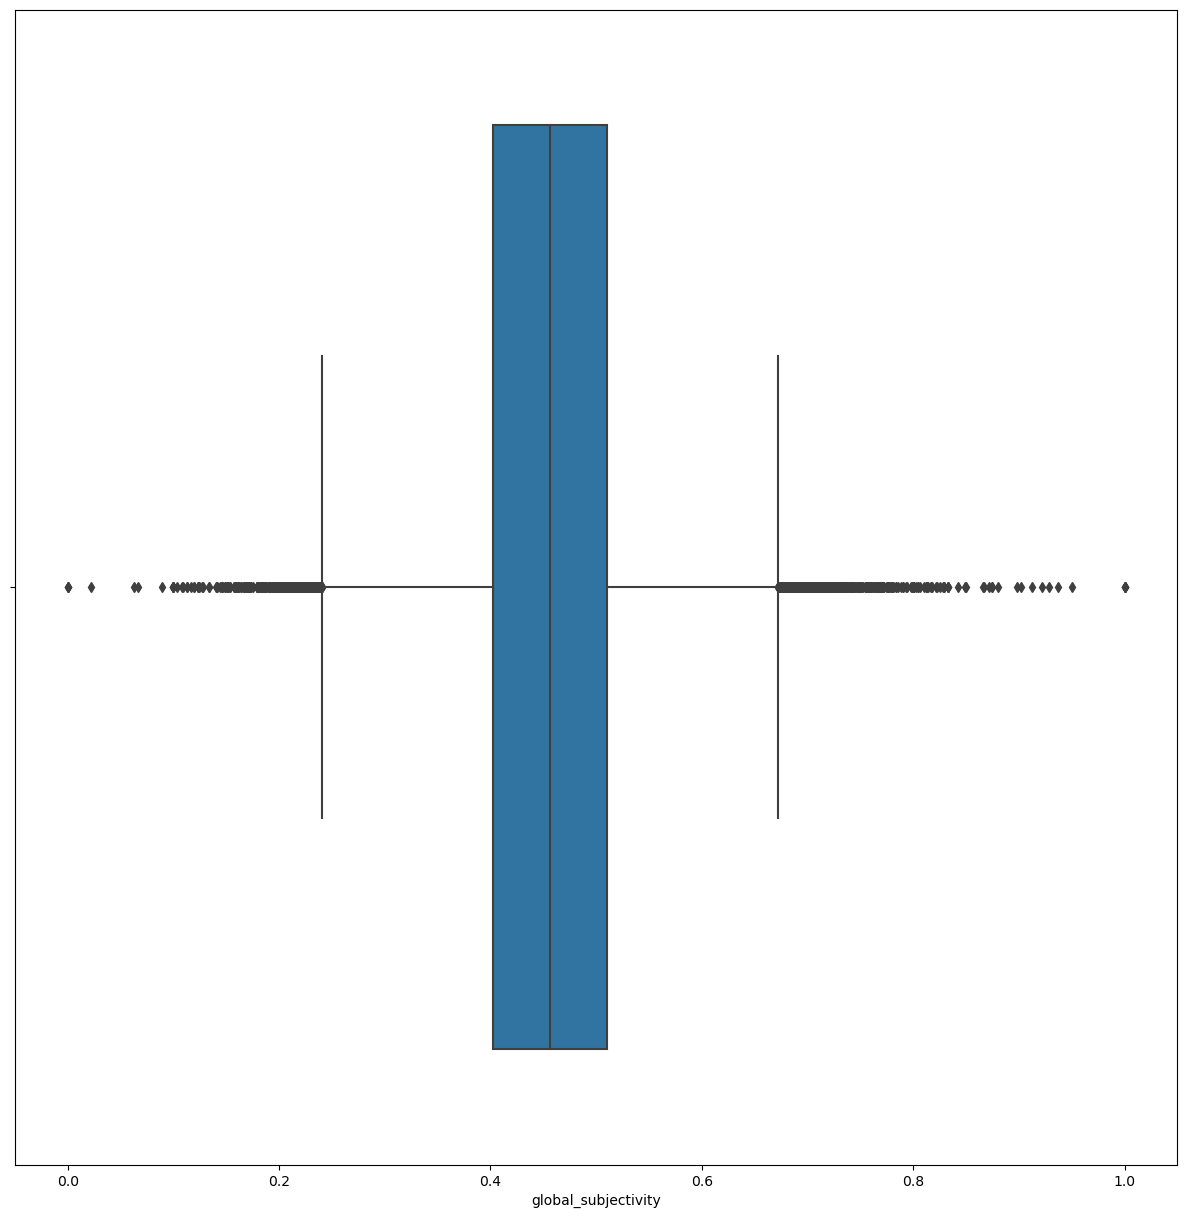

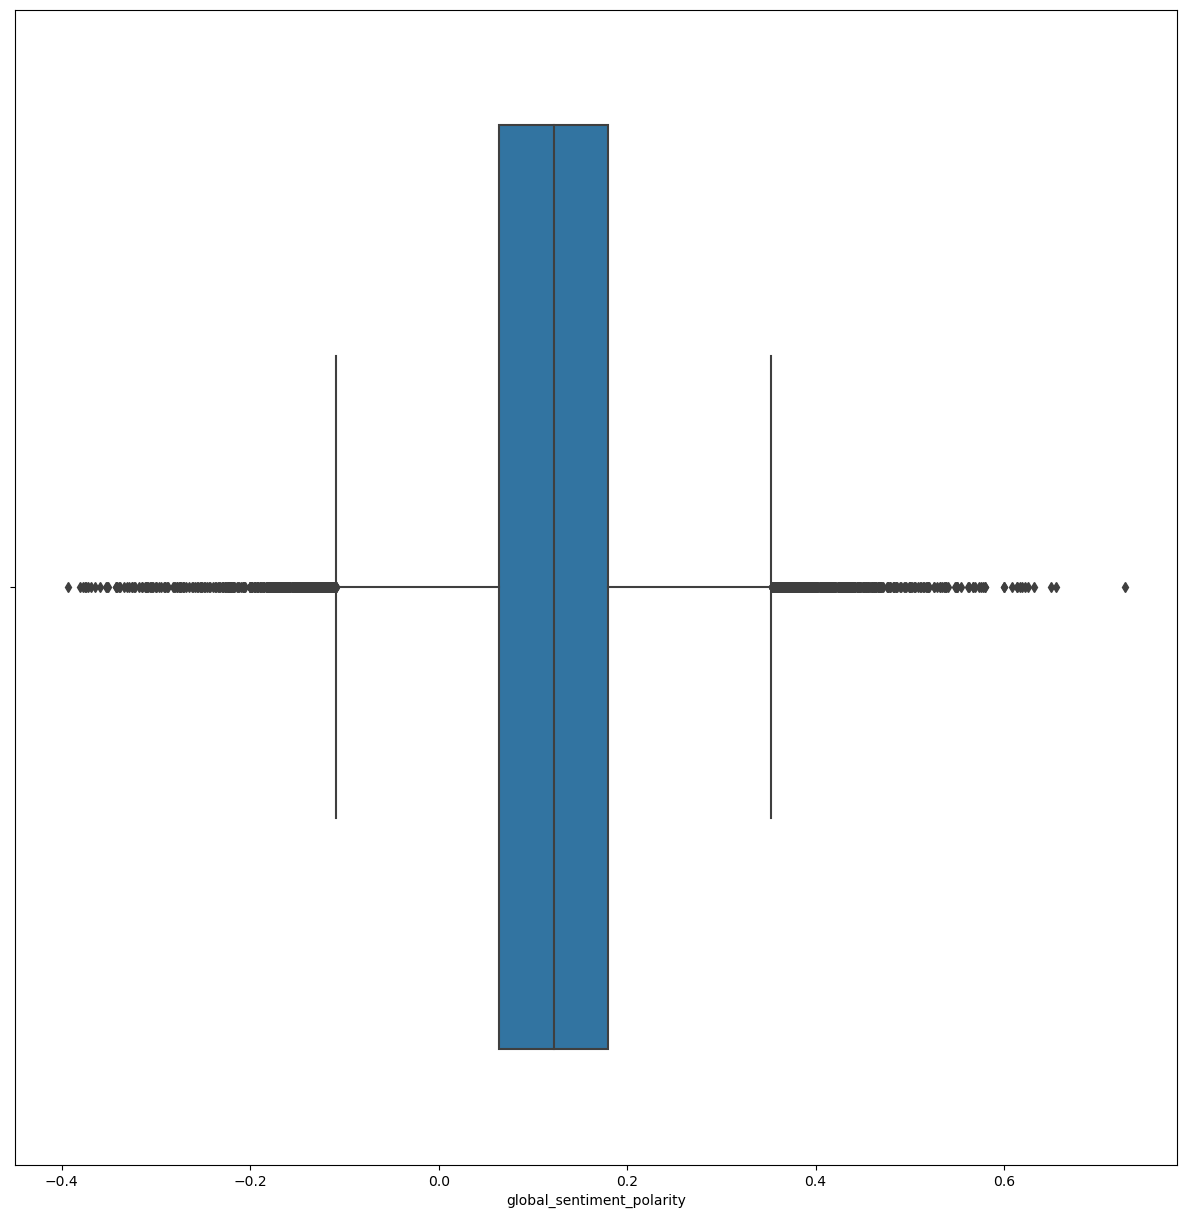

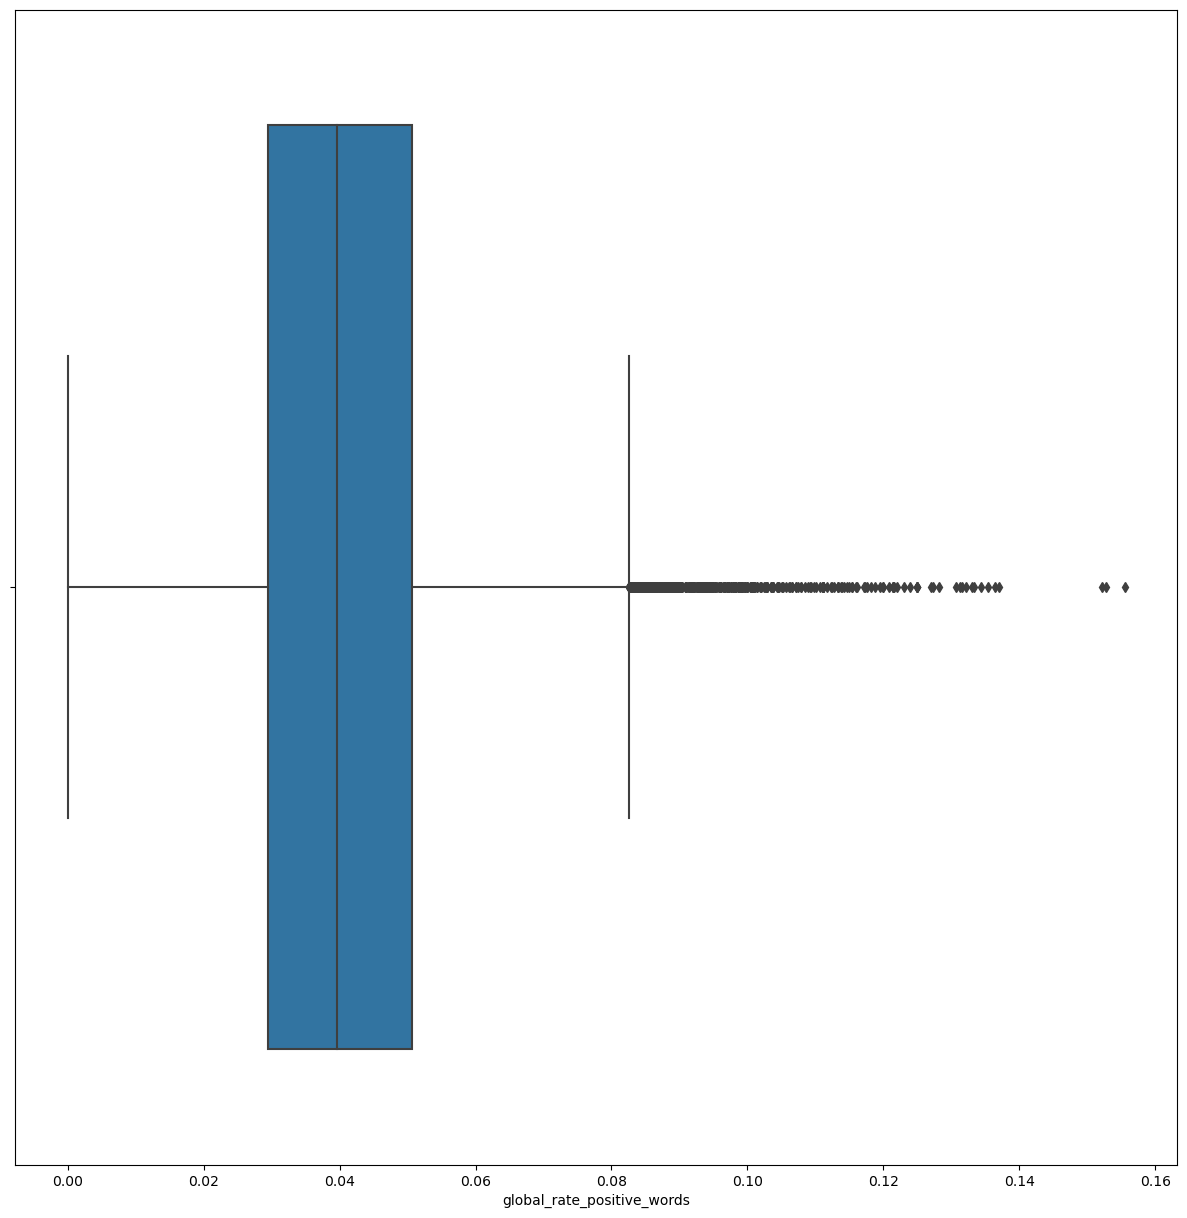

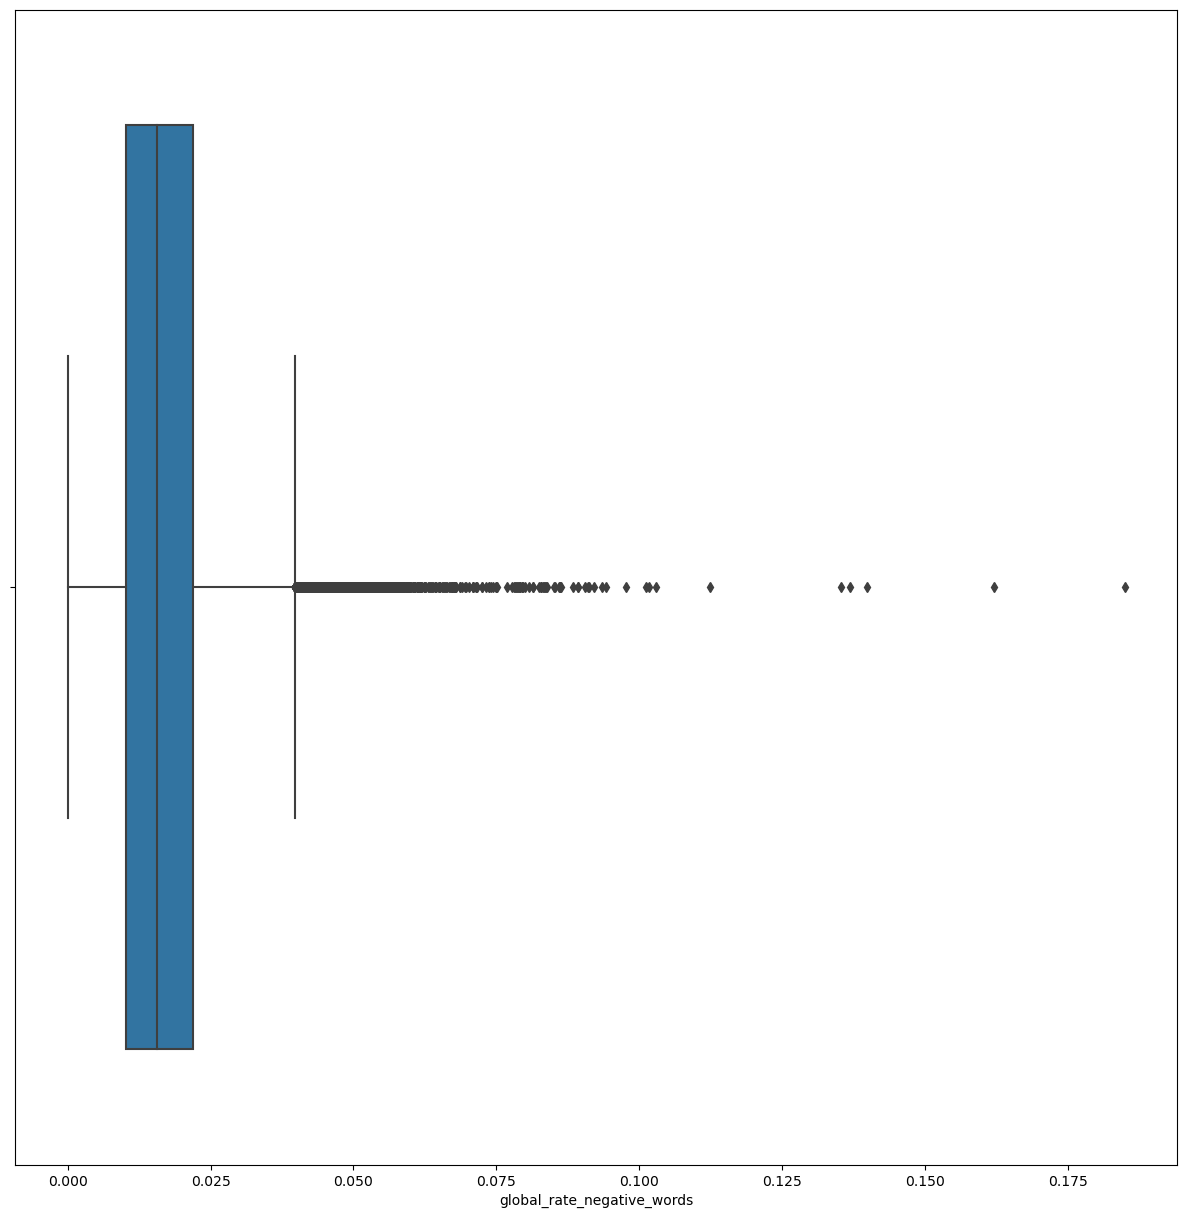

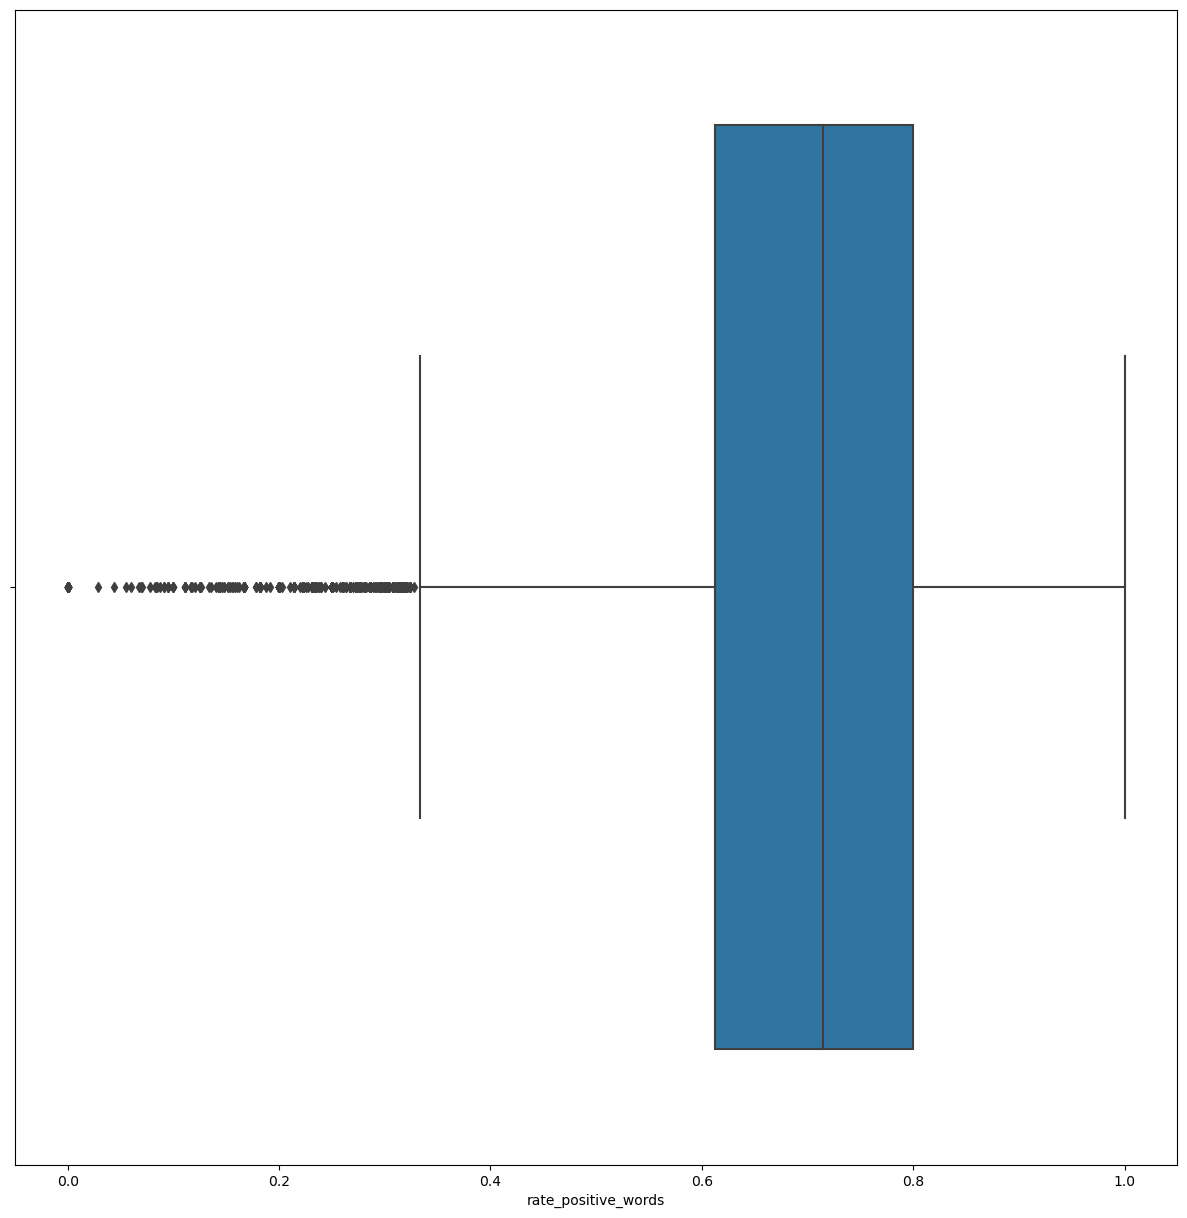

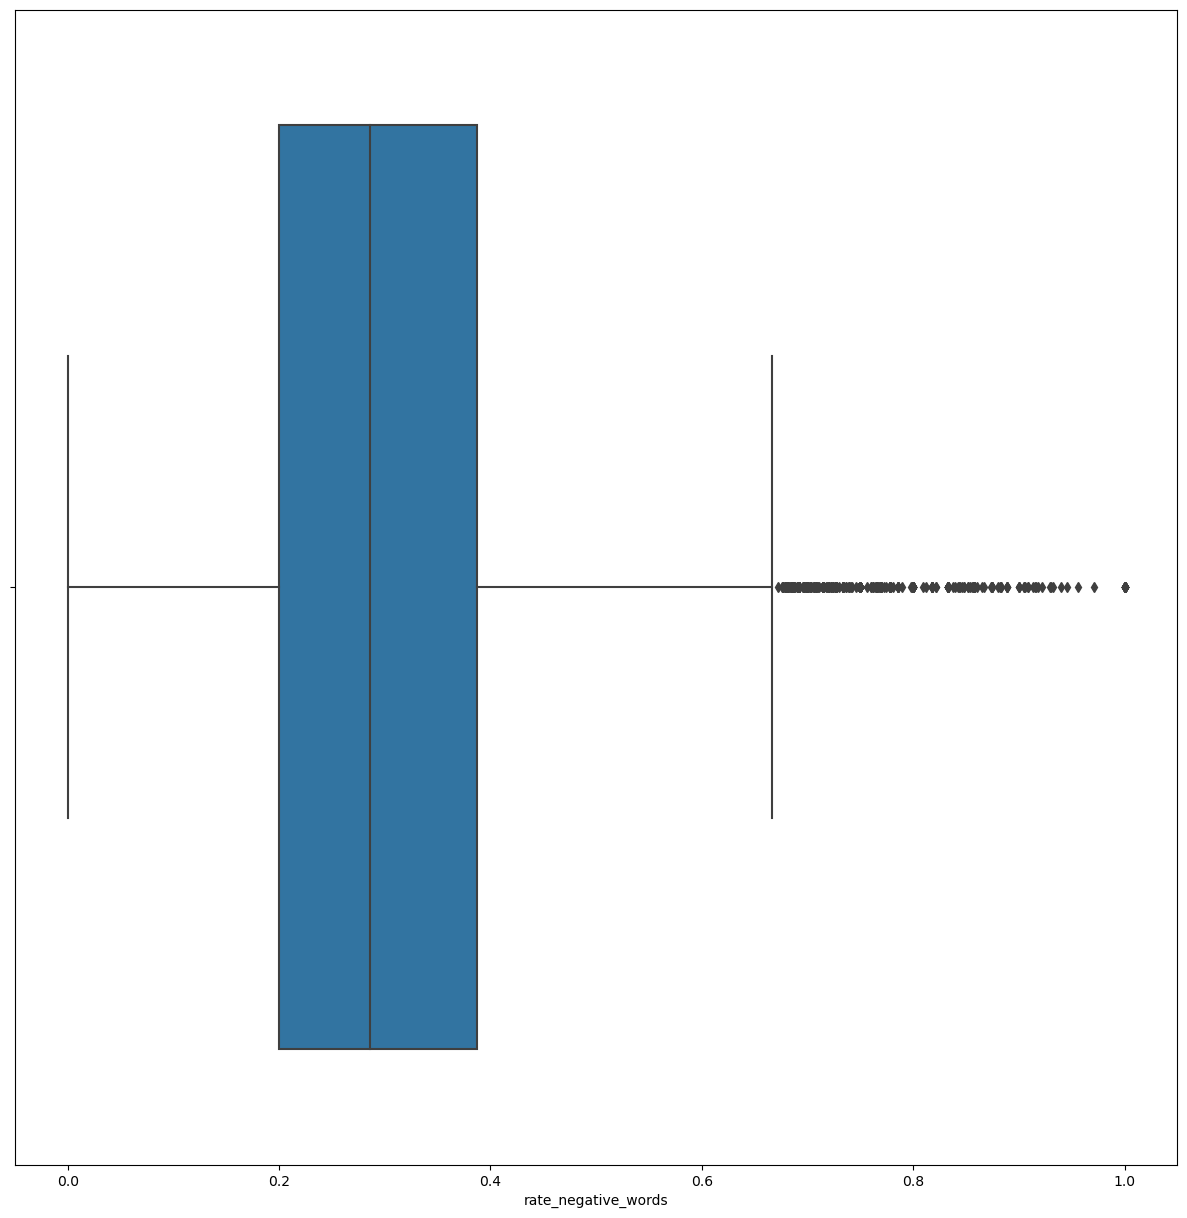

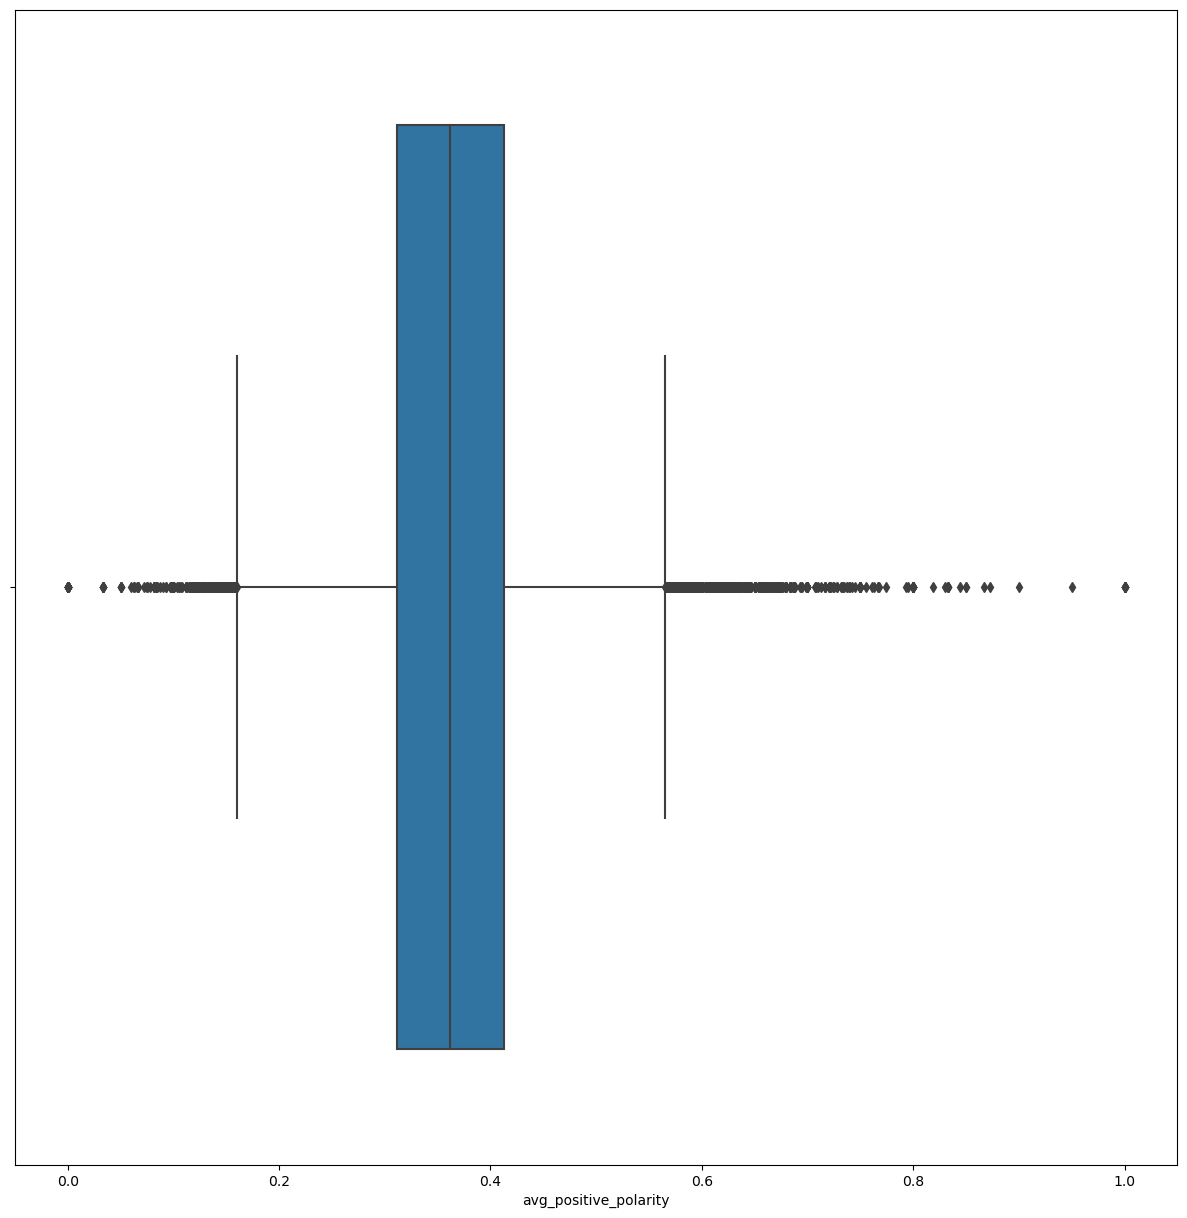

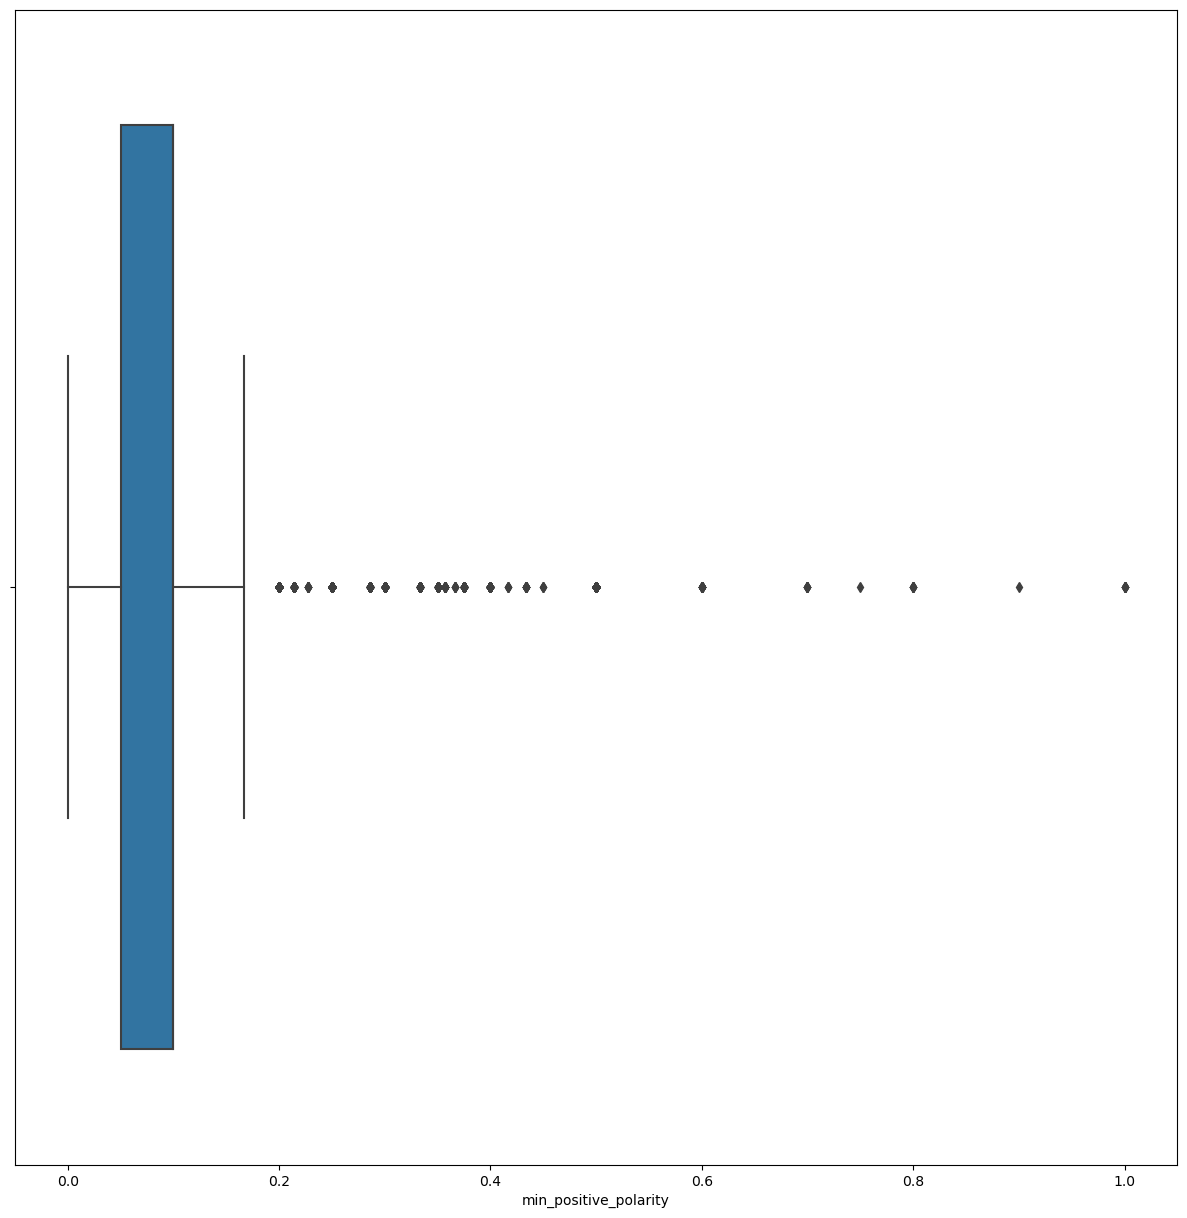

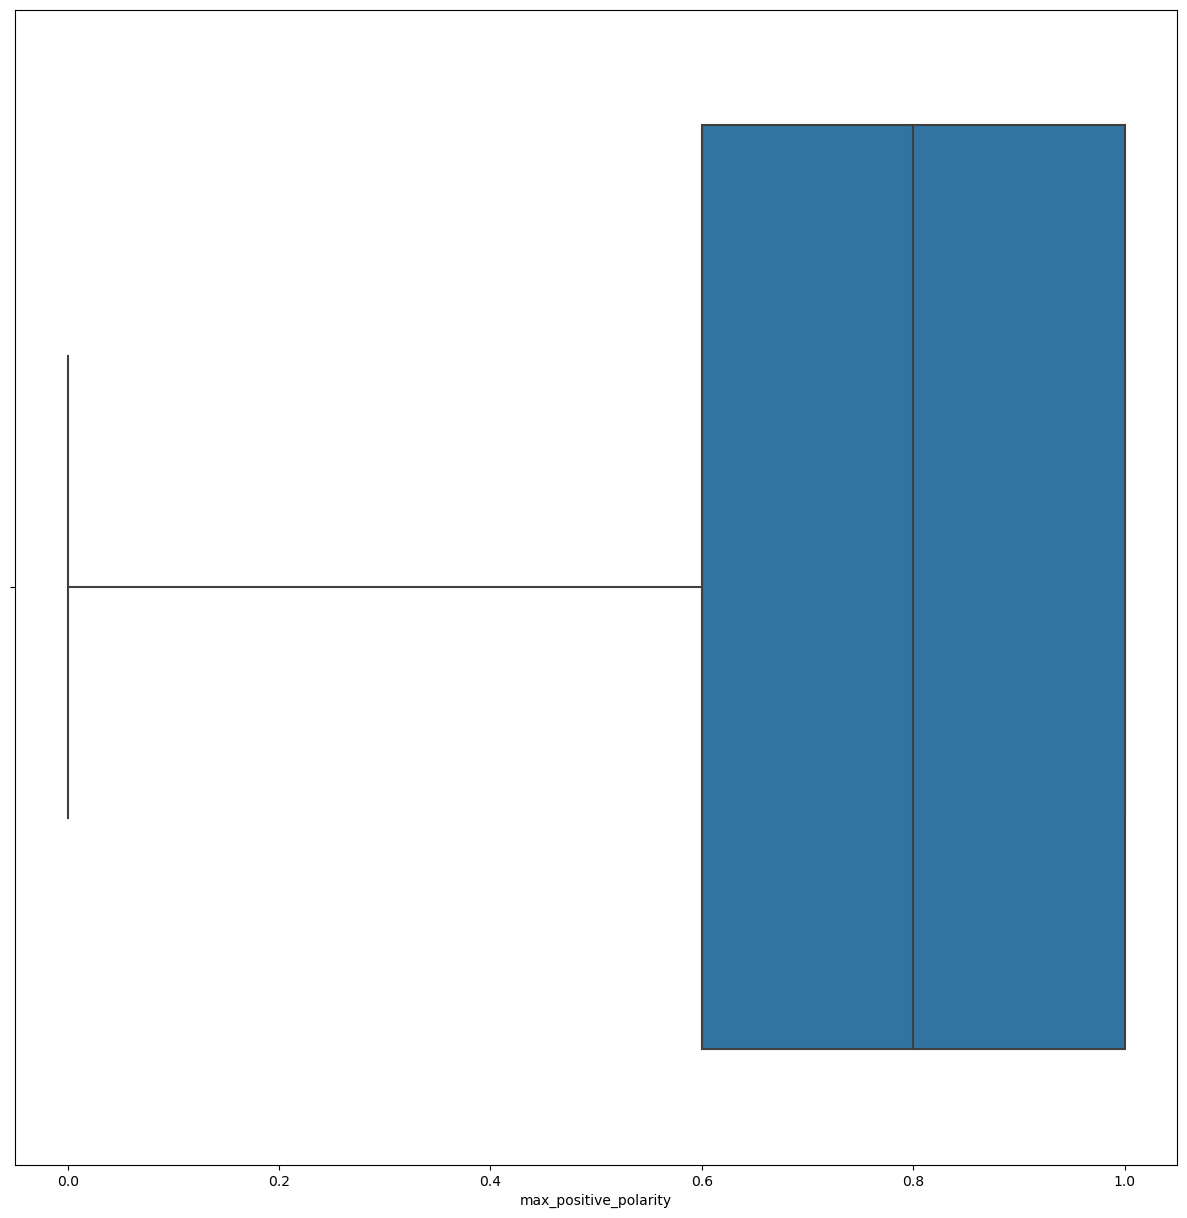

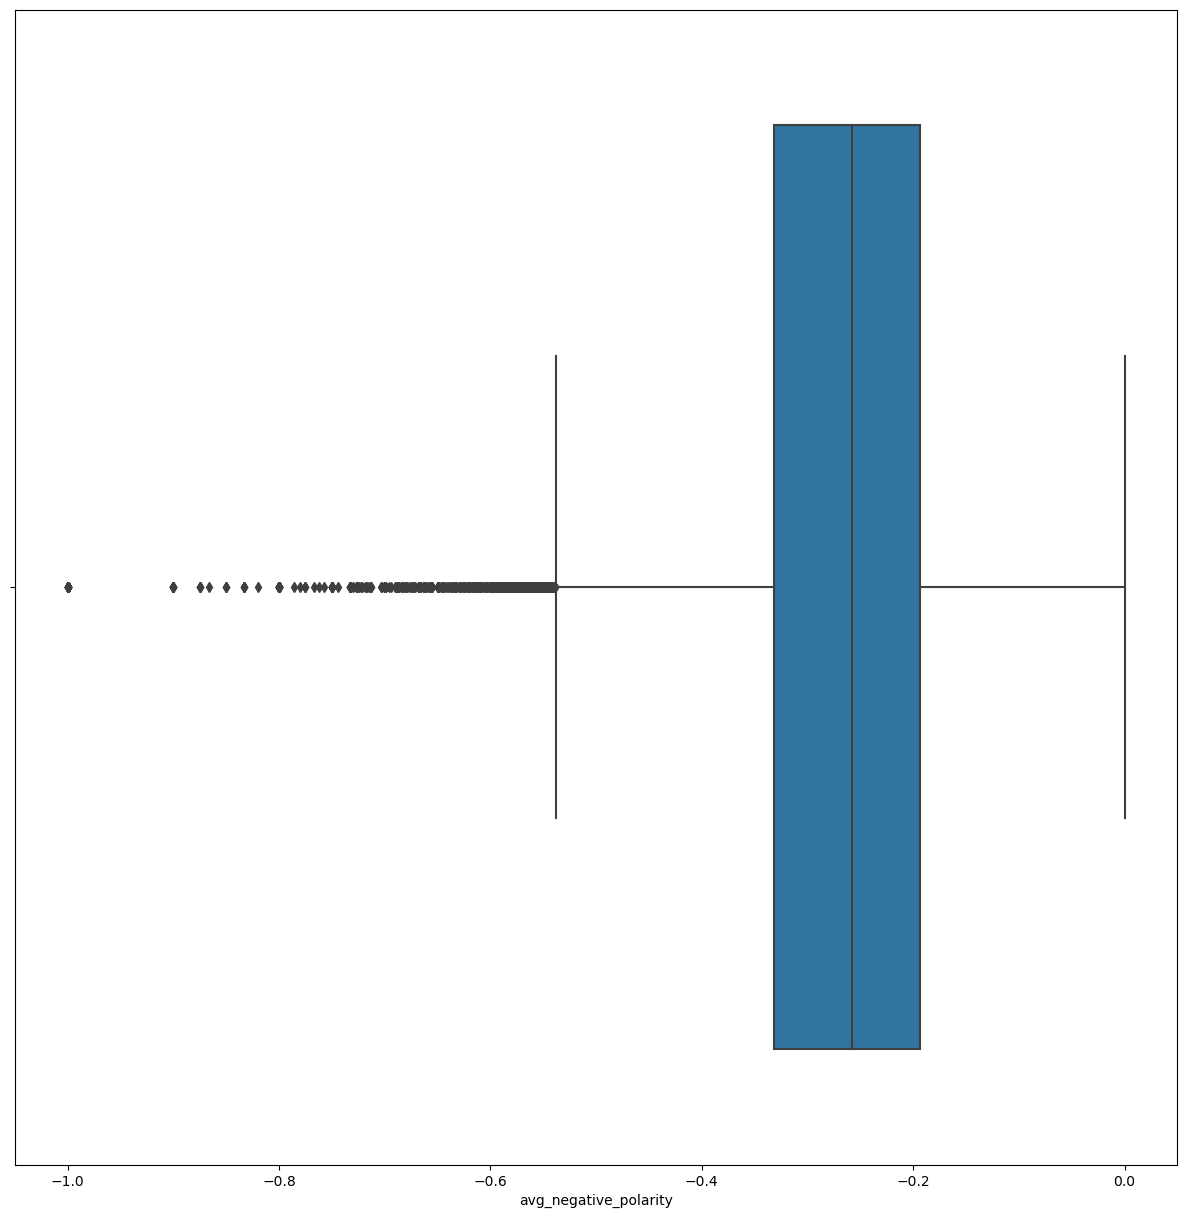

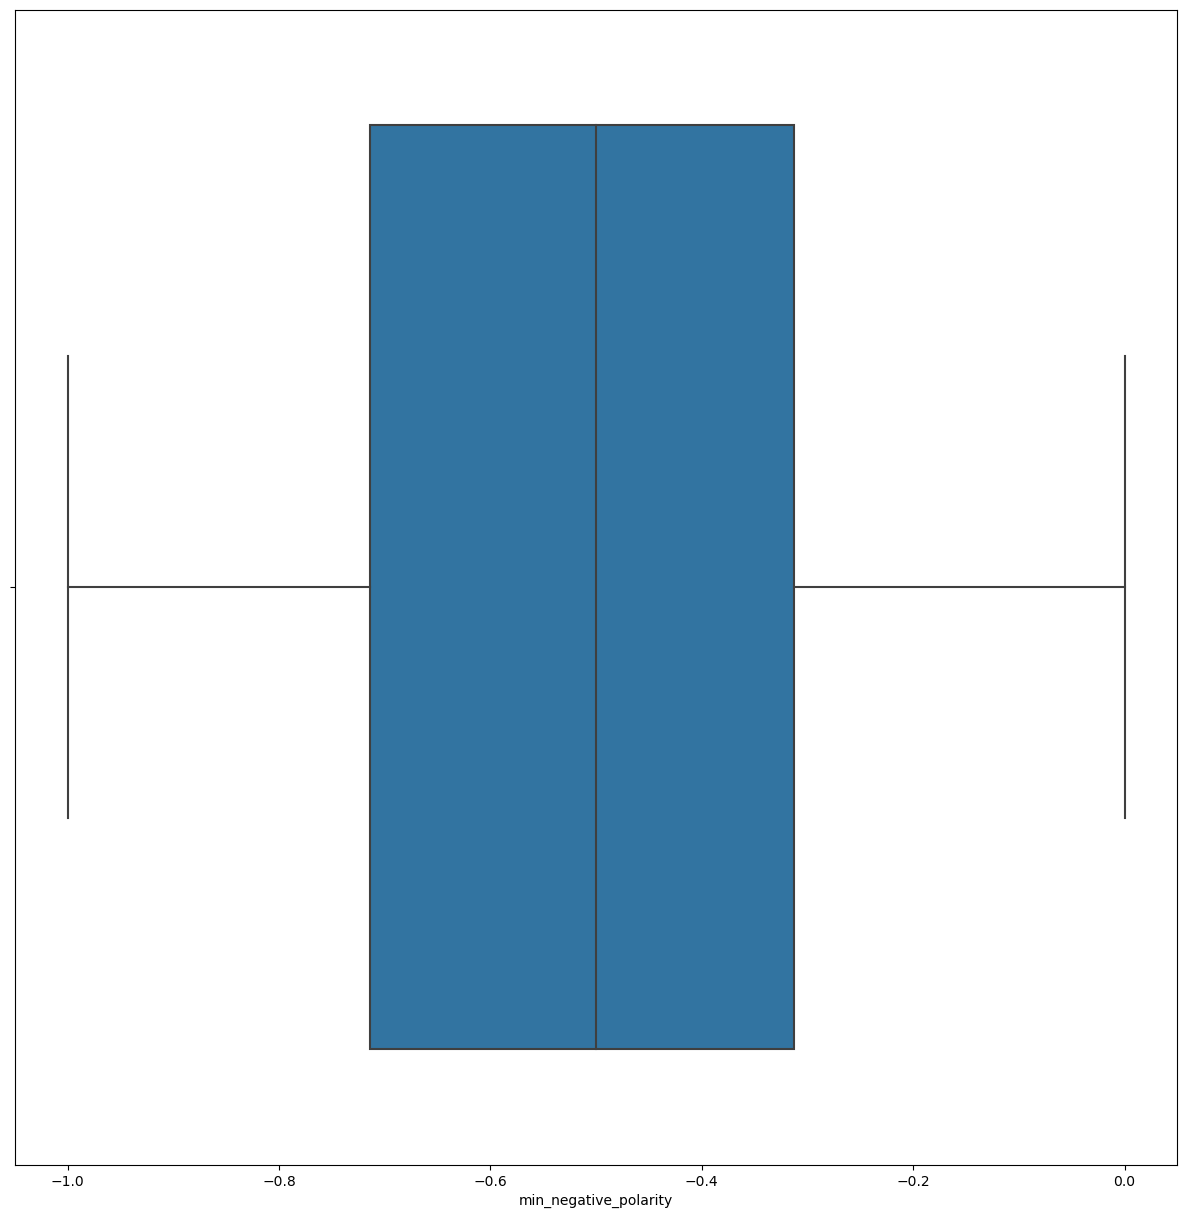

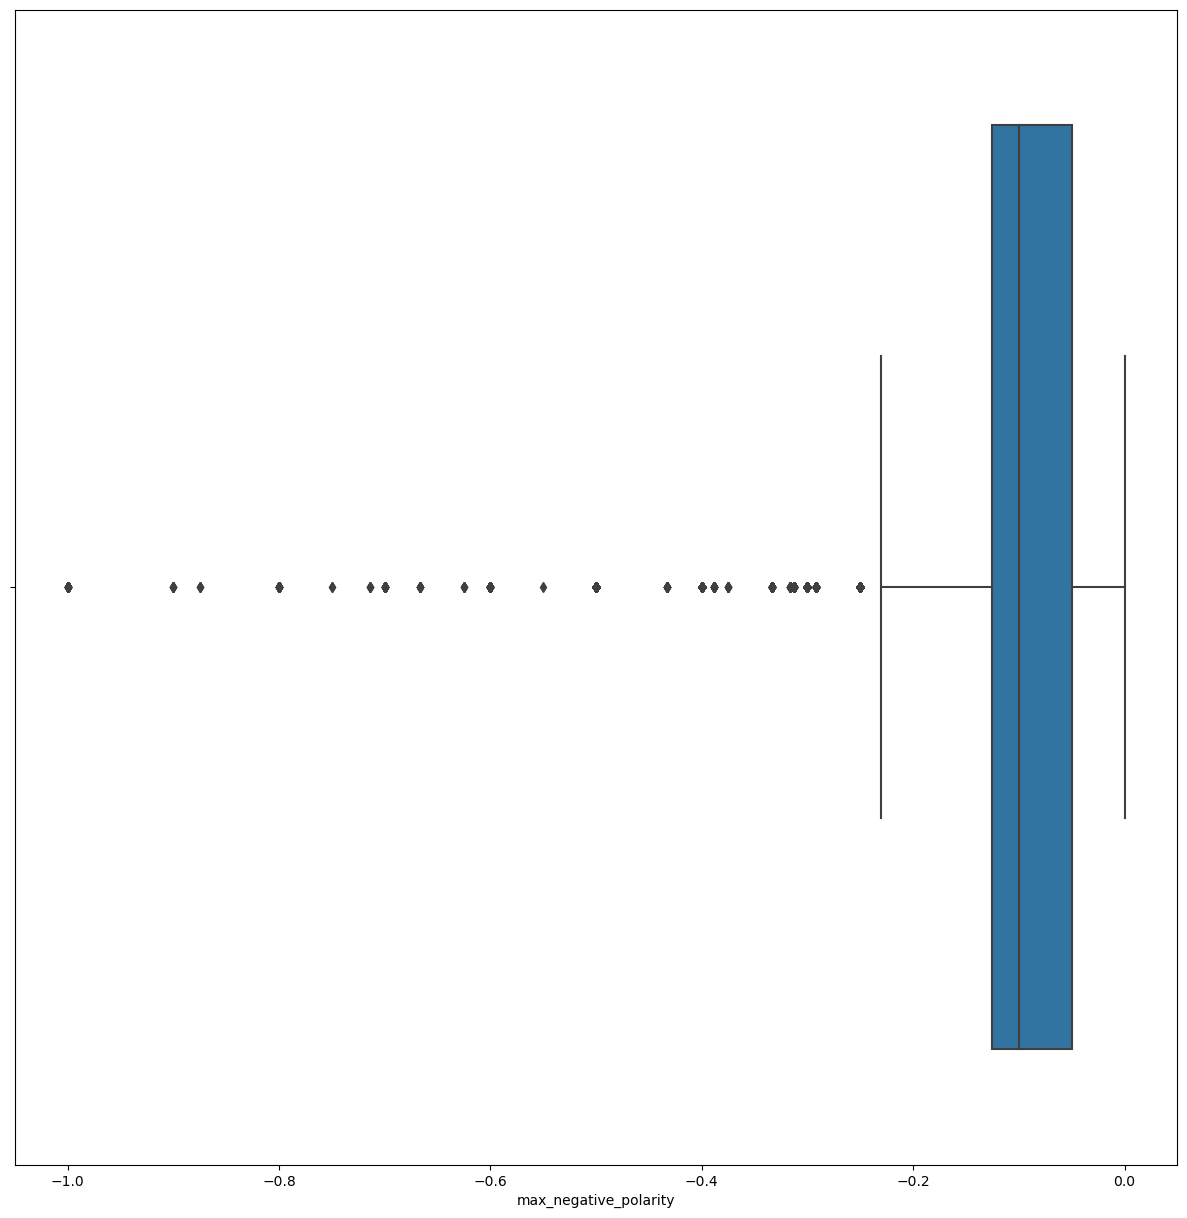

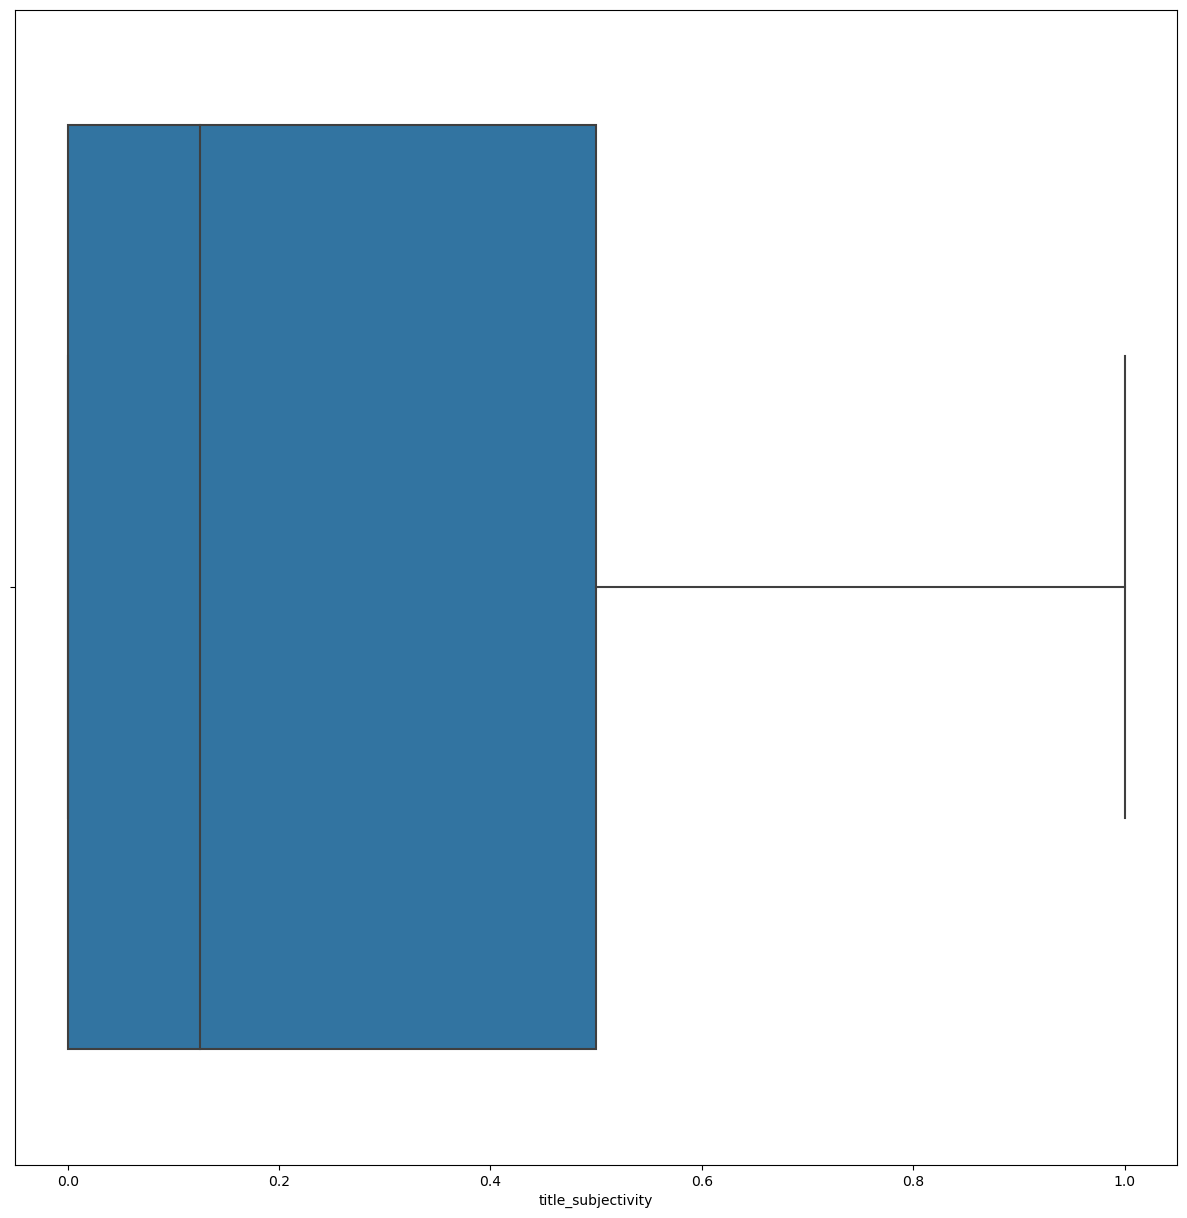

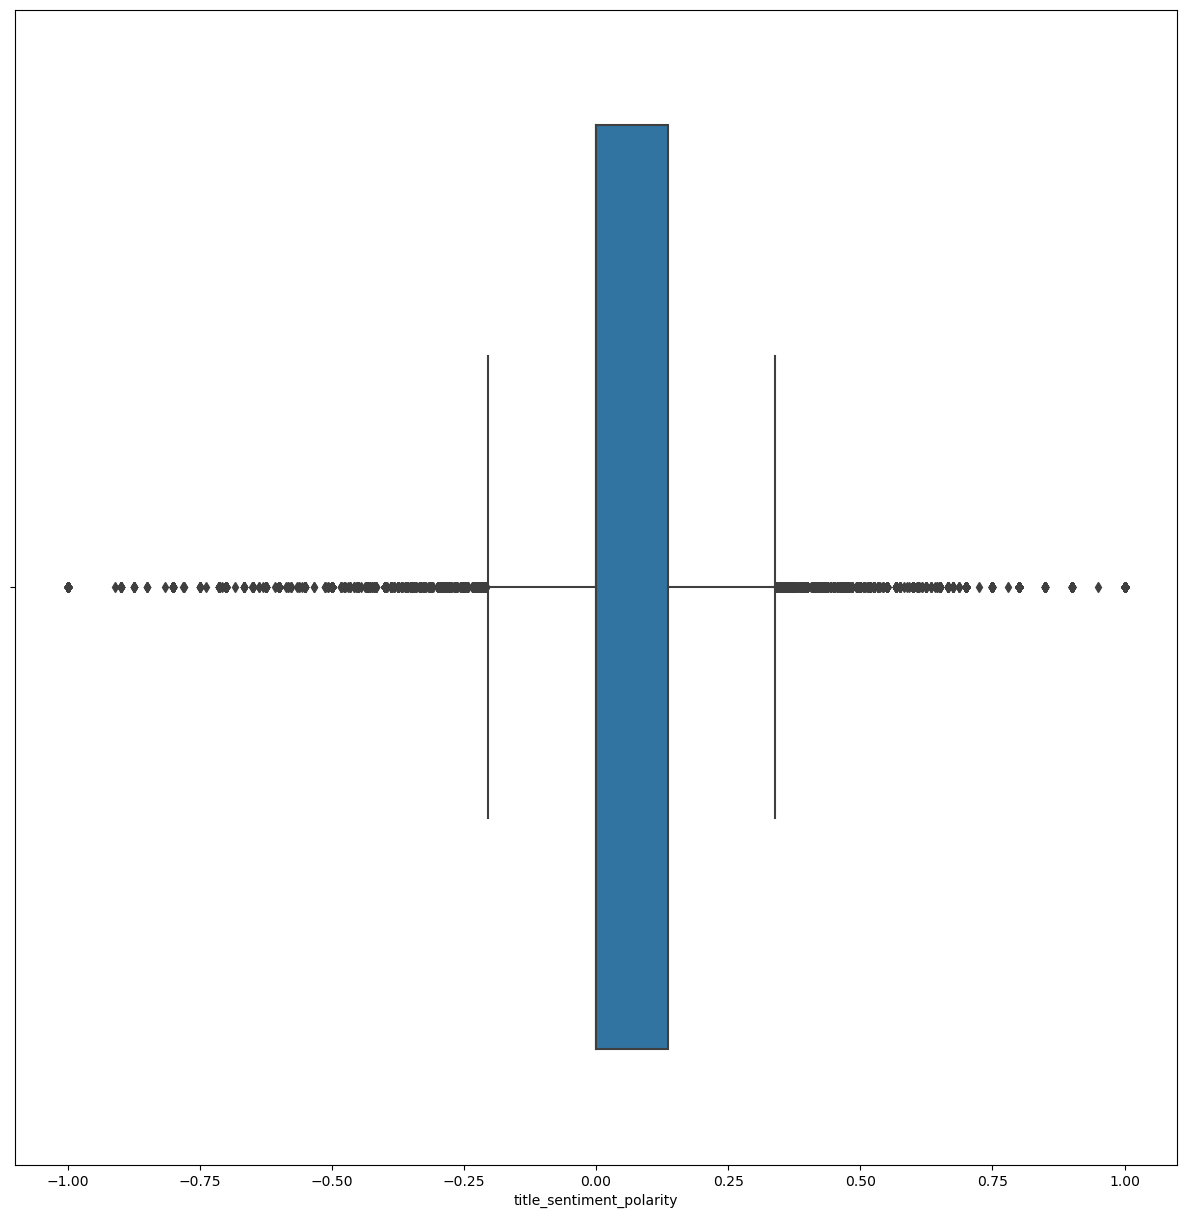

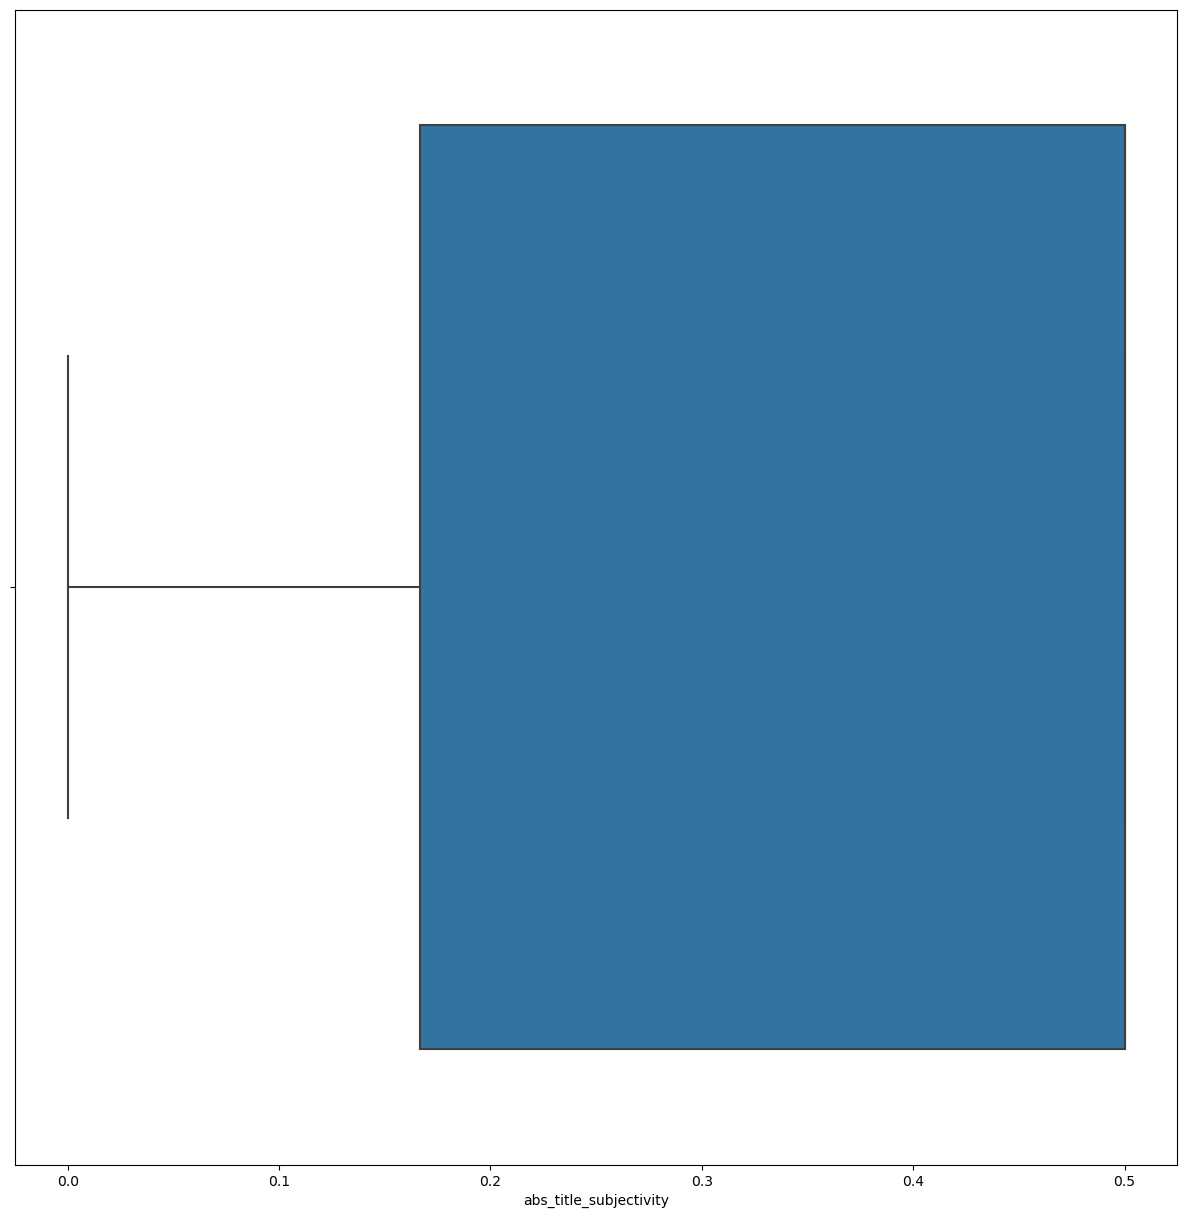

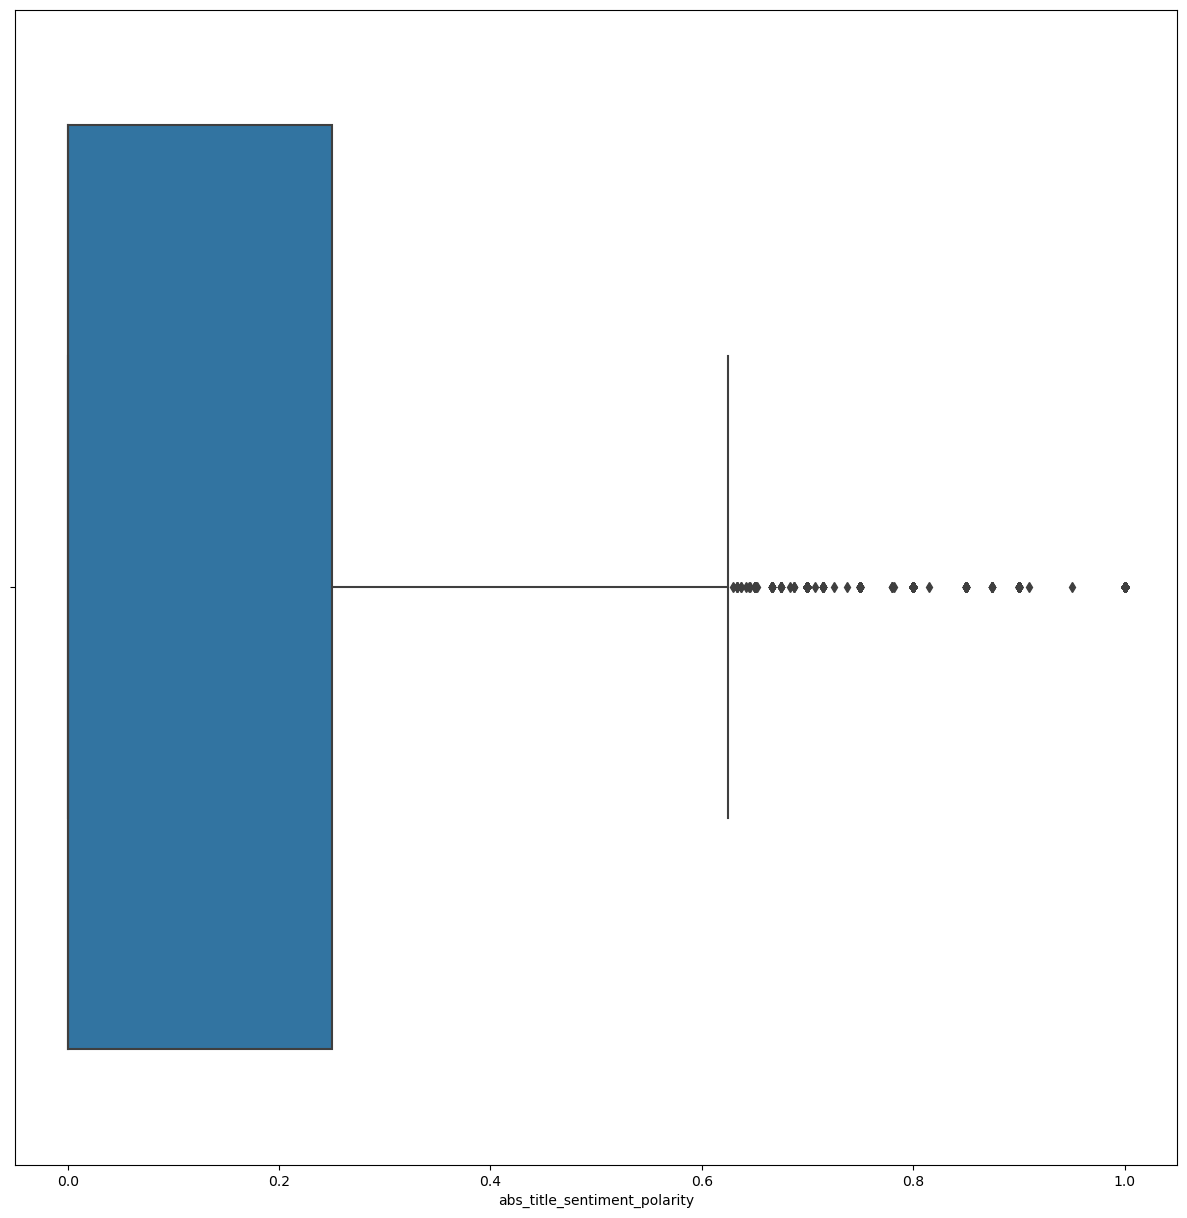

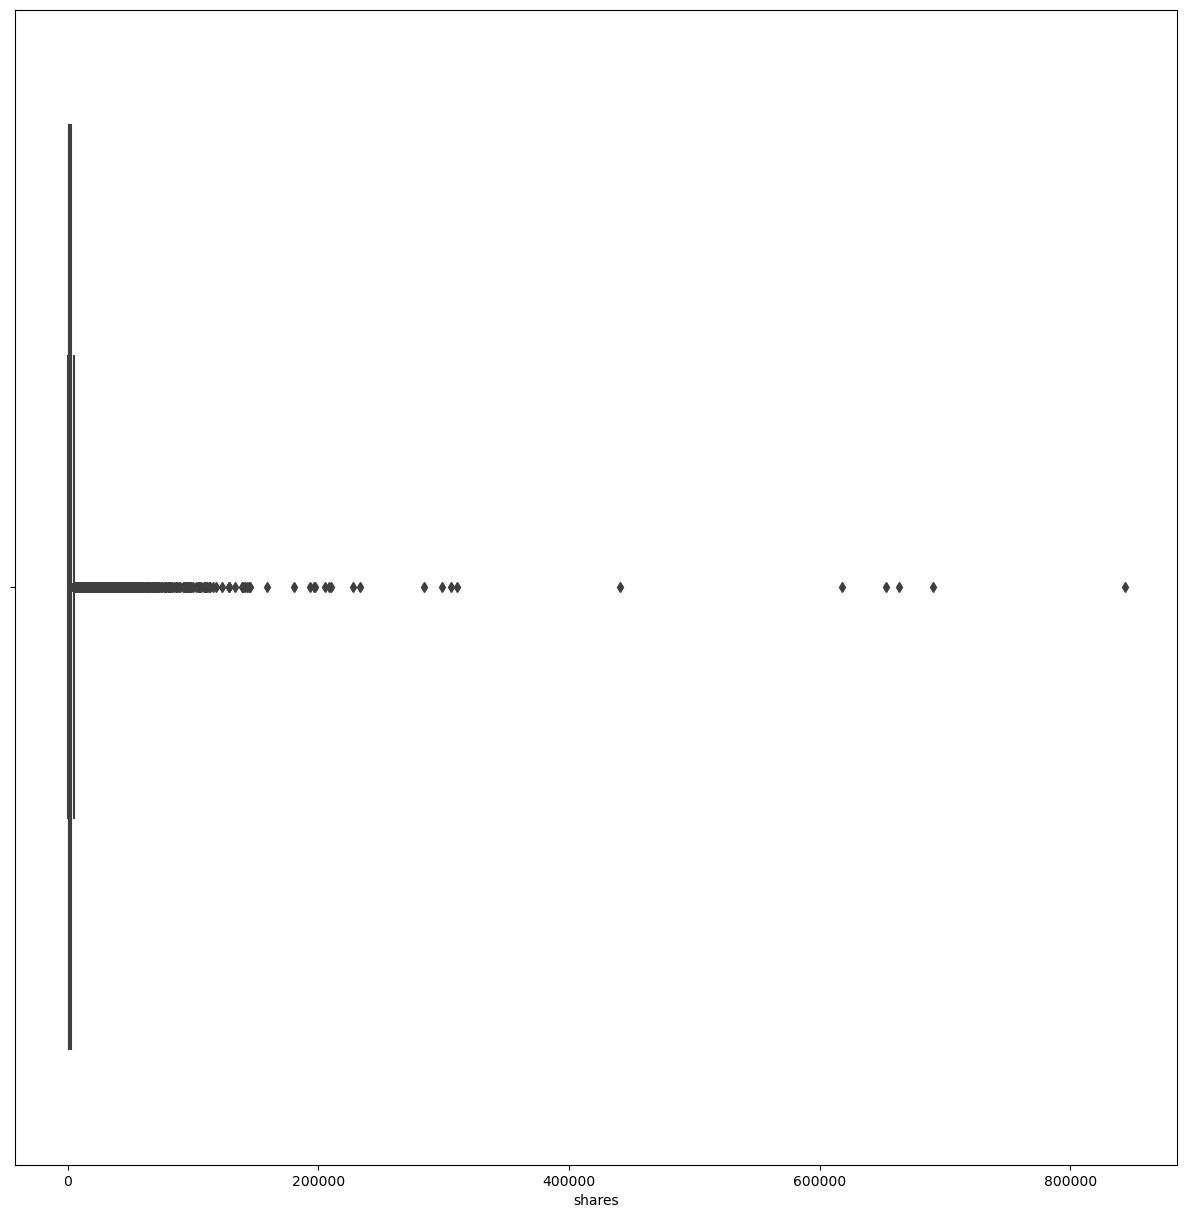

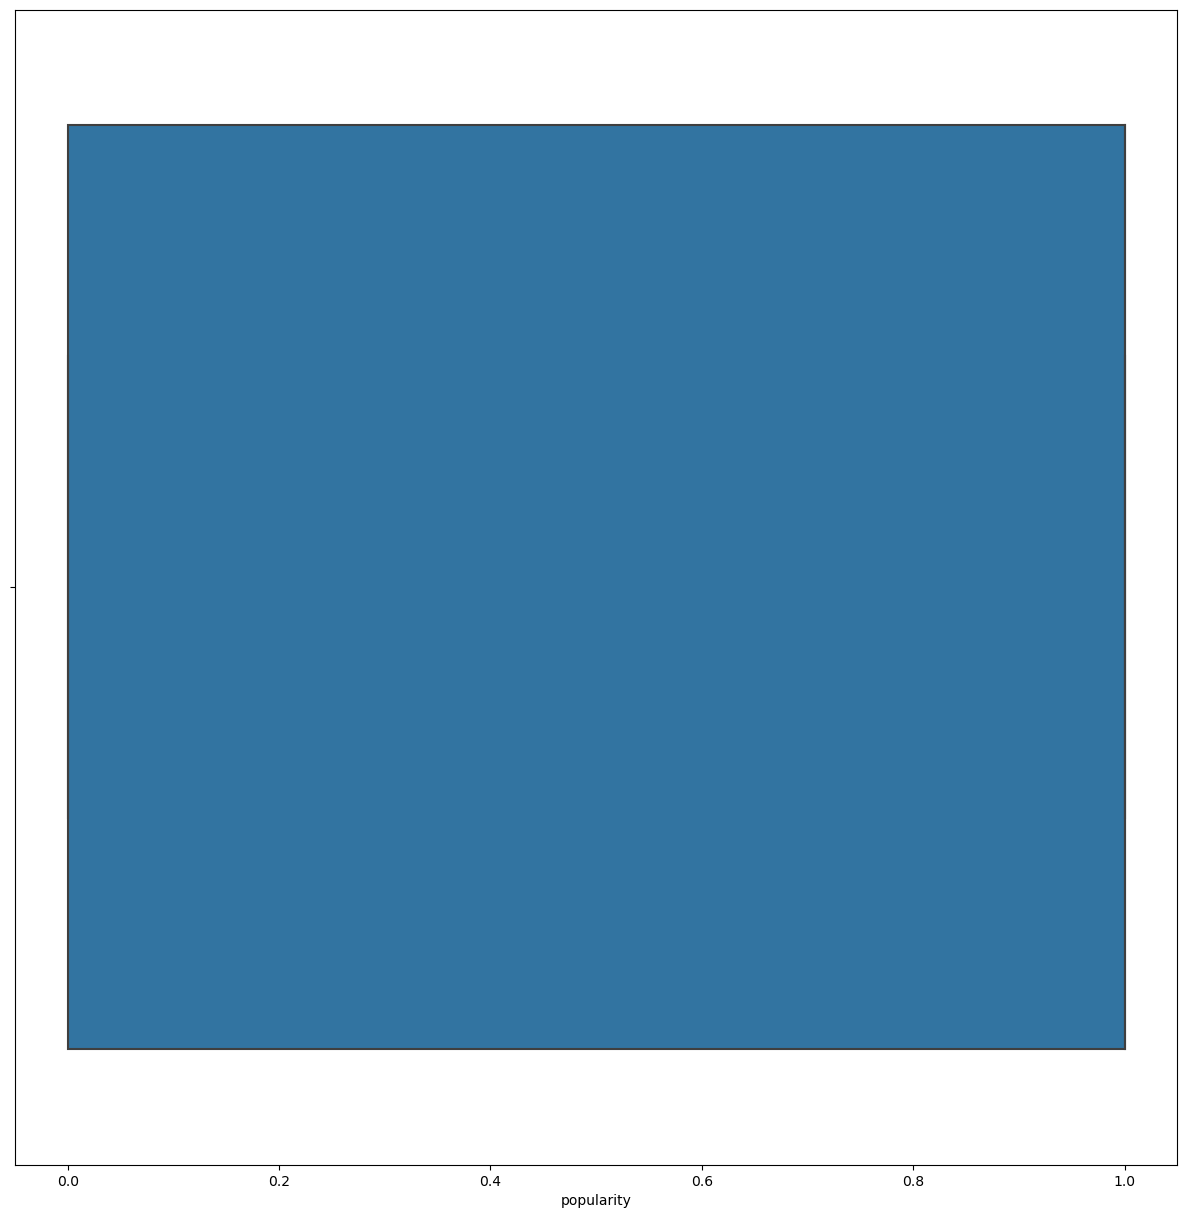

In [21]:
for column in data:
    plt.figure(figsize = (15,15))
    sns.boxplot(data = data, x = column)

In [22]:
#Checking for outliers and how many of them are present
num_cols = data.select_dtypes(['int64','float64']).columns
for column in num_cols:    
    q1 = data[column].quantile(0.25)    # First Quartile
    q3 = data[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                       # Inter Quartile Range

    llimit = q1 - 1.5*IQR               # Lower Limit
    ulimit = q3 + 1.5*IQR               # Upper Limit

    outliers = data[(data[column] < llimit) | (data[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print( llimit)
    print( ulimit)
    print( IQR)

Number of outliers in "n_tokens_title" : 155
4.5
16.5
3.0
Number of outliers in "n_tokens_content" : 1875
-446.0
1434.0
470.0
Number of outliers in "n_unique_tokens" : 490
0.27688172230725006
0.8116487408852499
0.13369175464449995
Number of outliers in "num_hrefs" : 2636
-8.5
27.5
9.0
Number of outliers in "num_self_hrefs" : 2090
-3.5
8.5
3.0
Number of outliers in "num_imgs" : 7466
-3.5
8.5
3.0
Number of outliers in "num_videos" : 2939
-1.5
2.5
1.0
Number of outliers in "average_token_length" : 552
3.9477737410249993
5.410377035785
0.36565082369000024
Number of outliers in "num_keywords" : 50
1.5
13.5
3.0
Number of outliers in "data_channel_is_lifestyle" : 2077
0.0
0.0
0.0
Number of outliers in "data_channel_is_entertainment" : 6856
0.0
0.0
0.0
Number of outliers in "data_channel_is_bus" : 6235
0.0
0.0
0.0
Number of outliers in "data_channel_is_socmed" : 2311
0.0
0.0
0.0
Number of outliers in "data_channel_is_tech" : 7325
0.0
0.0
0.0
Number of outliers in "data_channel_is_world" : 8168

# Scaling

In [23]:
# df_num  dataframe contains numerical feaures.

df_num = data.drop(["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",                  
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"],axis = 1)

# df_cat dataframe contains catagorical features.

df_cat = data[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
             "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",            
             "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"]]

# Checking distribution of attributes to decide the method of scaling
# Drop 'shares' from df_num
df_num = df_num.drop('shares', axis= 1)

df_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity'],
      dtype='object')

In [24]:
#Searching for negative values in columns, if any.
negative_colns = df_num.columns[(df_num <= 0).any()]
print(negative_colns)

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity'],
      dtype='object')


In [25]:
#Converting the negative values into positive so that
#Box - Cox method can be applied
for i in negative_colns:
    m=df_num[i].min()
    name=i +'_new'
    df_num[name]=((df_num[i]+1)-m)
    
df_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_v

In [26]:
# Droping the previous negative columns
for i in negative_colns:
    df_num.drop(i,axis=1,inplace=True)

negative_colns=df_num.columns[(df_num<=0).any()]
print(negative_colns)

Index([], dtype='object')


In [27]:
#HANDLING THE OUTLIERS
      
pt = preprocessing.PowerTransformer(method = 'box-cox',standardize = False)
df_num_add = pt.fit_transform(df_num)
df_num_add = (pd.DataFrame(df_num_add,columns = df_num.columns))

for col in df_num_add.columns:
    percentiles = df_num_add[col].quantile([0.01,0.99]).values
    df_num_add[col][df_num_add[col] <= percentiles[0]] = percentiles[0]
    df_num_add[col][df_num_add[col] >= percentiles[1]] = percentiles[1]


# Checking for the outliers again
num_cols = df_num_add.select_dtypes(['int64','float64']).columns

for column in num_cols:    
    q1 = df_num_add[column].quantile(0.25)   # First Quartile (Q1)
    q3 = df_num_add[column].quantile(0.75)   # Third Quartile (Q3)
    IQR = q3 - q1                            # Inter Quartile Range (IQR)

    llimit = q1 - 1.5*IQR                    # Lower Limit
    ulimit = q3 + 1.5*IQR                    # Upper Limit

    outliers = df_num_add[(df_num_add[column] < llimit) | (df_num_add[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print( llimit) #Lower limit
    print(ulimit) #Upper limit
    print( IQR) #Inter Quartile Range

Number of outliers in "n_tokens_title" : 0
3.0351766196848686
9.255141622951946
1.5549912508167694
Number of outliers in "n_tokens_content" : 0
3.8606109358471805
7.438987854892925
0.8945942297614362
Number of outliers in "n_unique_tokens" : 521
-1.1447330856397202
-0.1145799574171531
0.2575382820556418
Number of outliers in "average_token_length" : 0
0.7213218976211406
0.7805063649014632
0.01479611682008064
Number of outliers in "num_keywords" : 0
0.08898030896099218
14.927545776135672
3.7096413667936696
Number of outliers in "num_hrefs_new" : 0
0.549171638846343
3.43450060777549
0.7213322422322868
Number of outliers in "num_self_hrefs_new" : 0
-0.6296914342191073
2.872819482290186
0.8756277291273233
Number of outliers in "num_imgs_new" : 0
-0.16197366610802344
1.8075267721179116
0.4923751095564838
Number of outliers in "num_videos_new" : 0
-0.6194220377541412
1.0323700629235686
0.41294802516942747
Number of outliers in "kw_min_min_new" : 0
-1.7368309261901067
2.8947182103168445
1.157

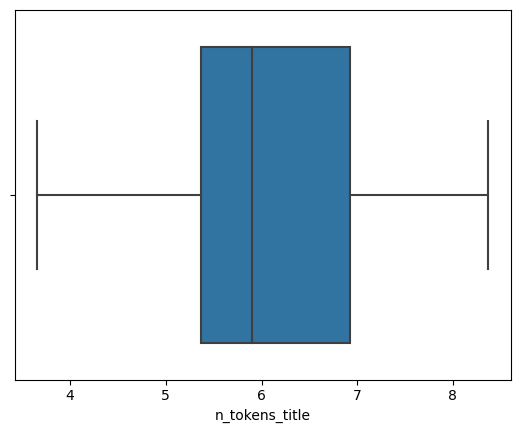

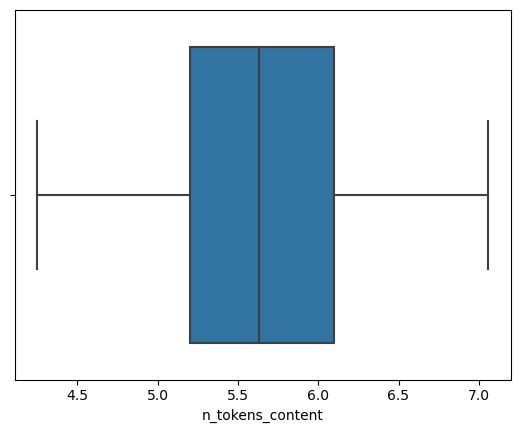

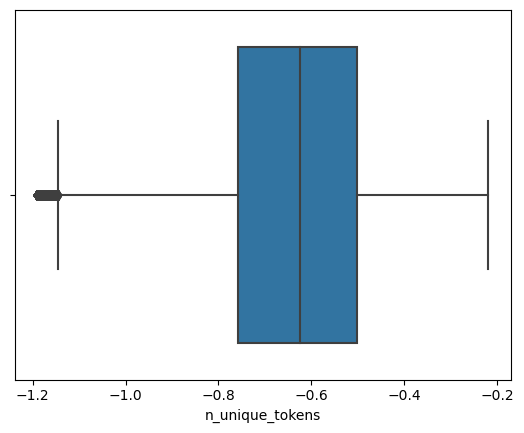

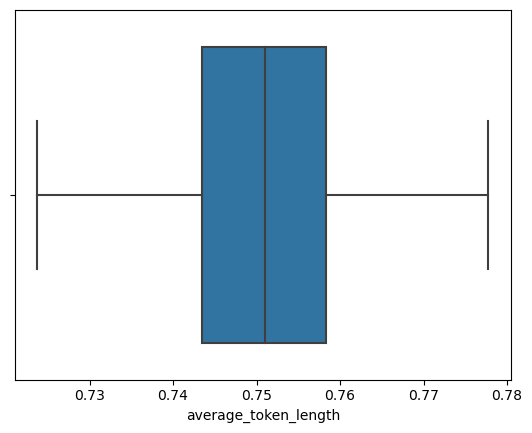

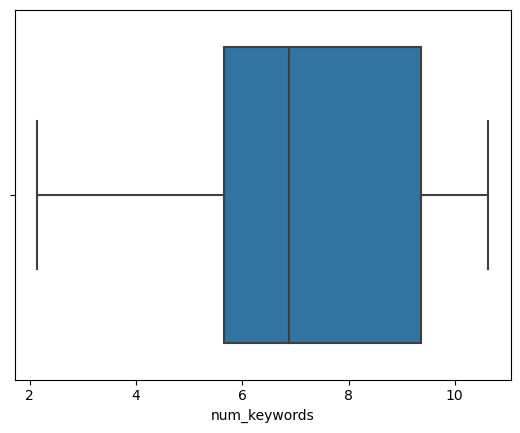

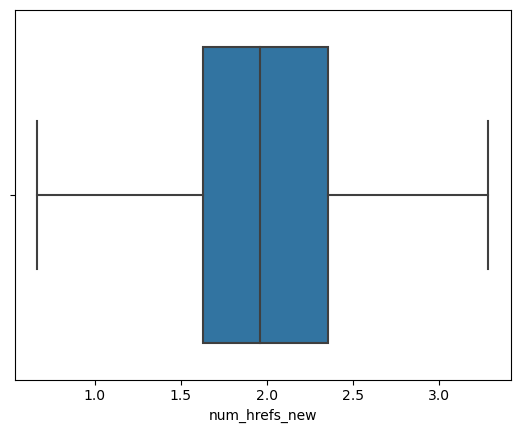

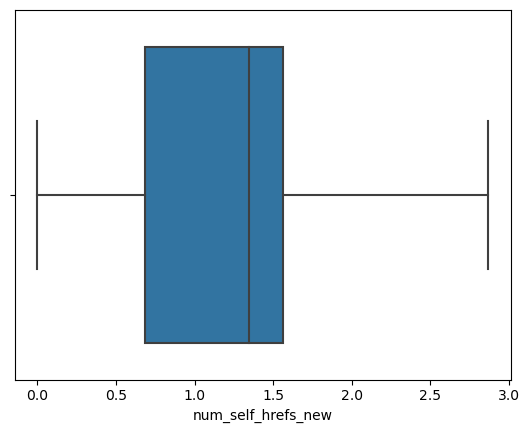

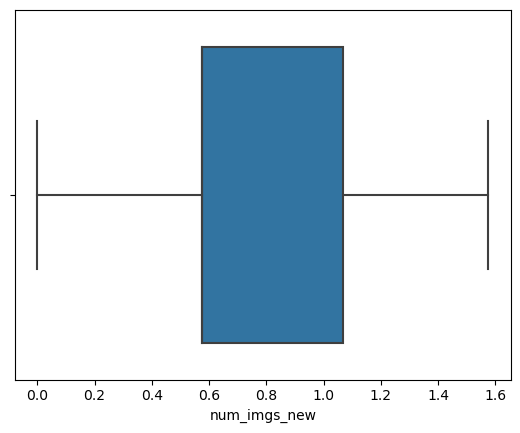

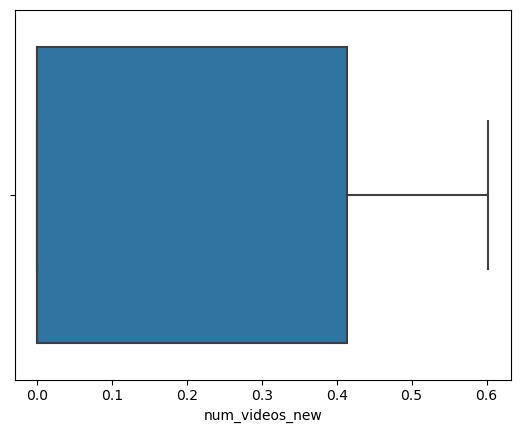

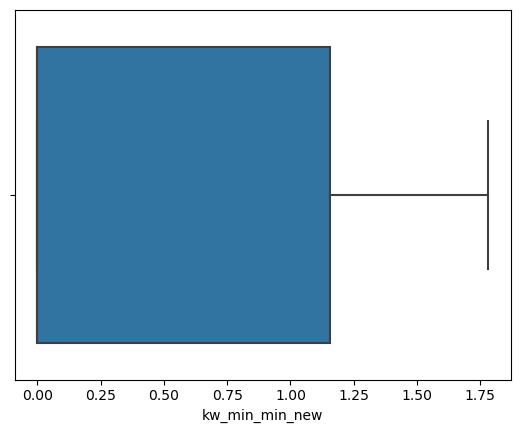

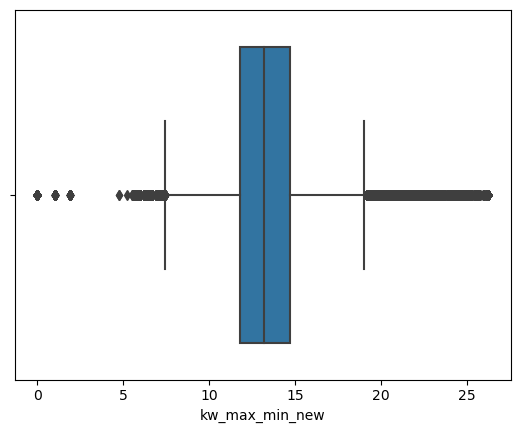

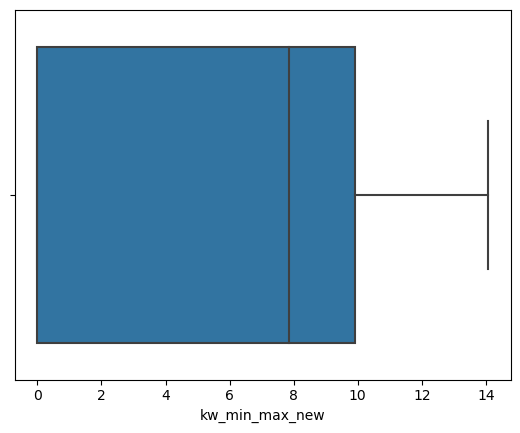

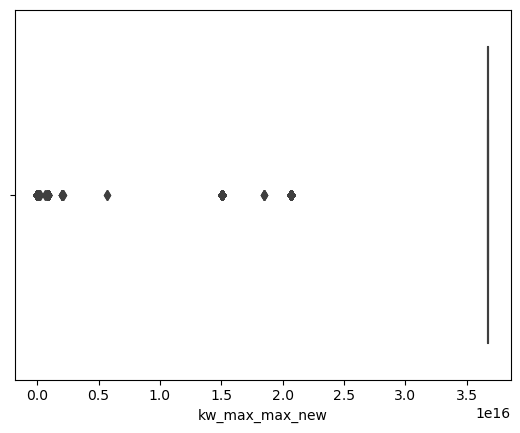

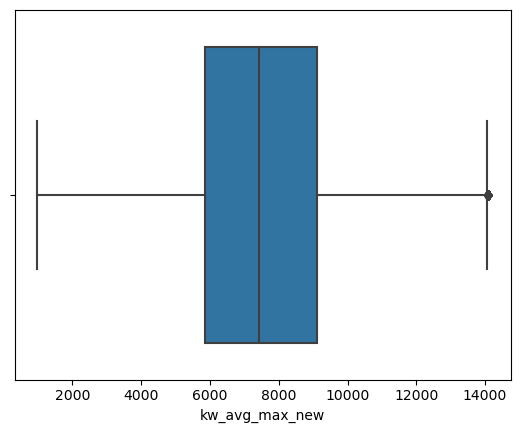

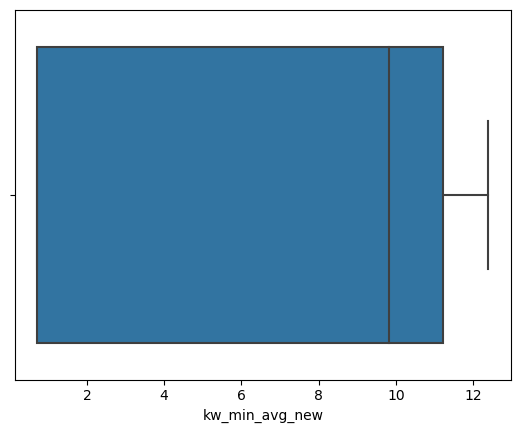

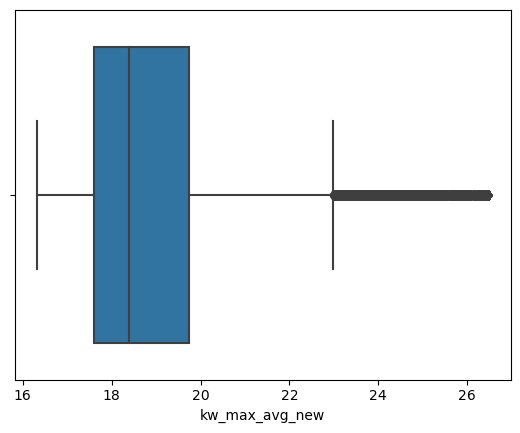

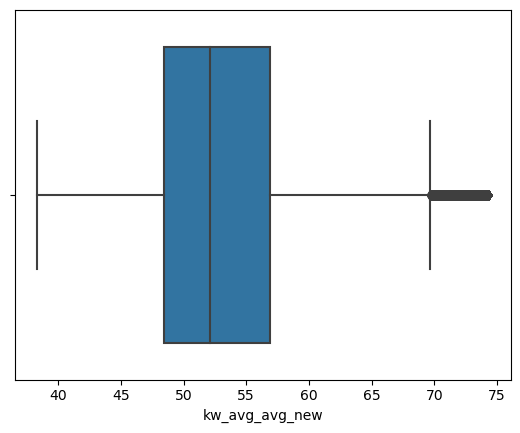

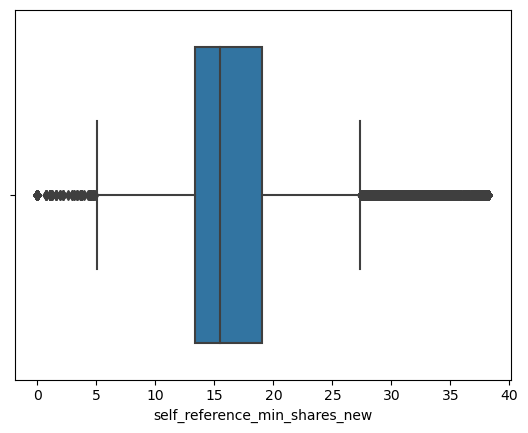

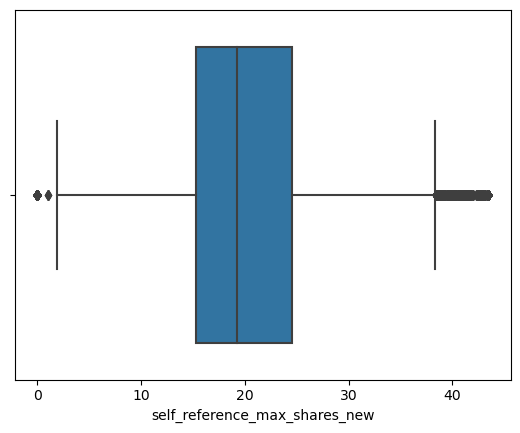

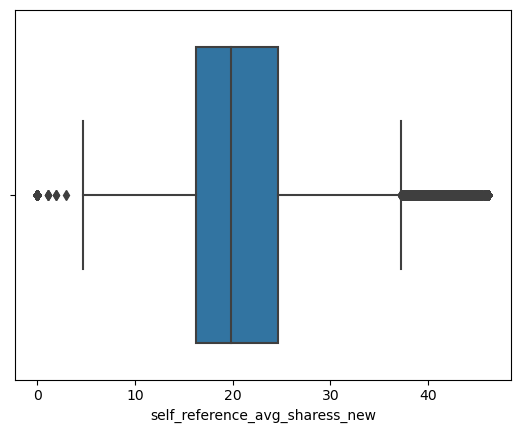

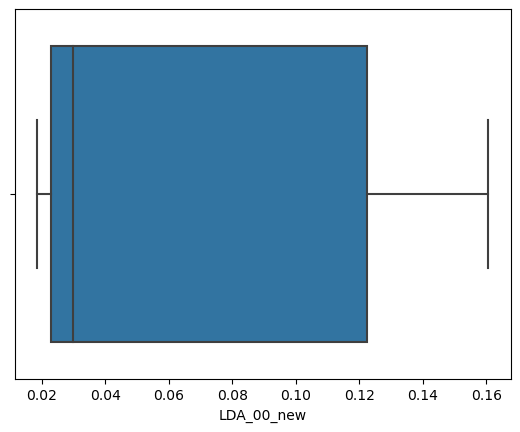

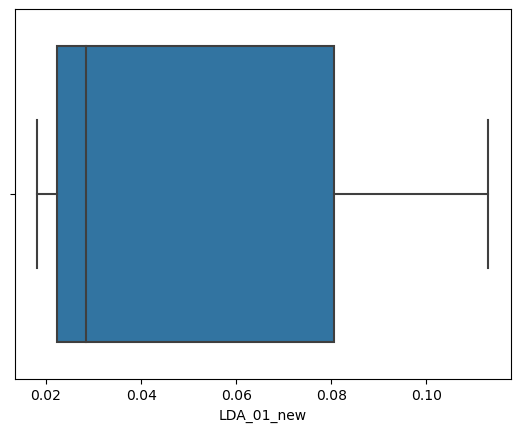

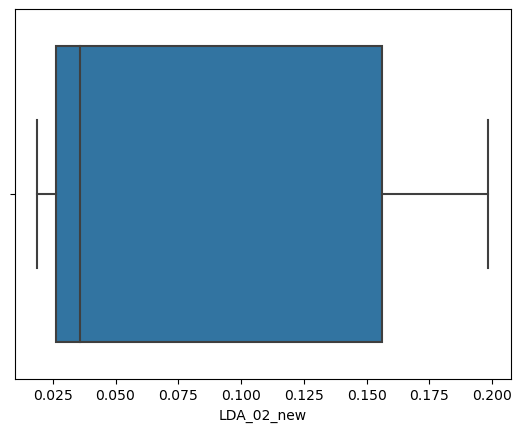

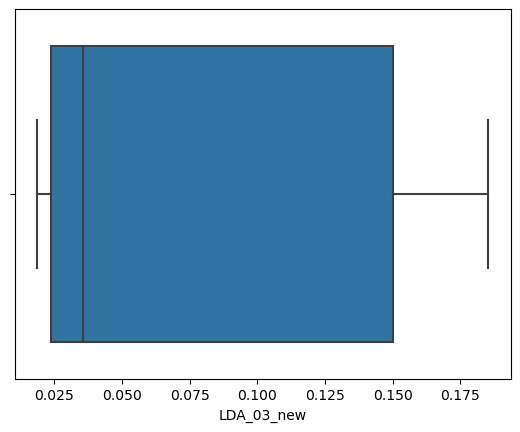

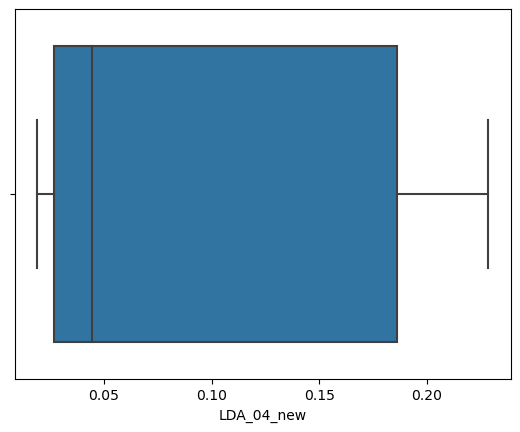

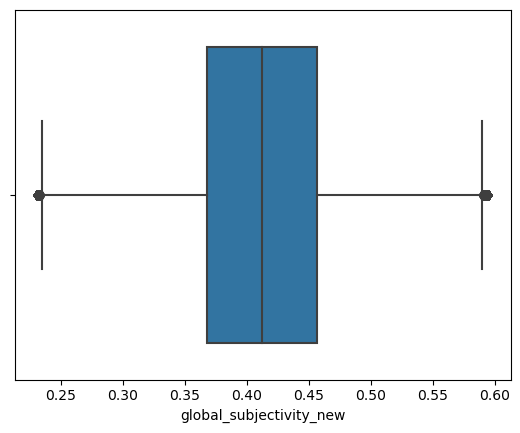

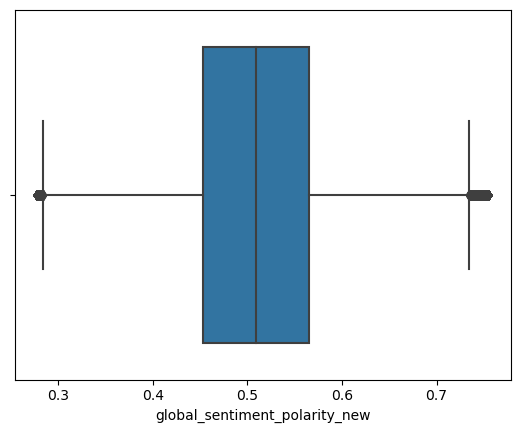

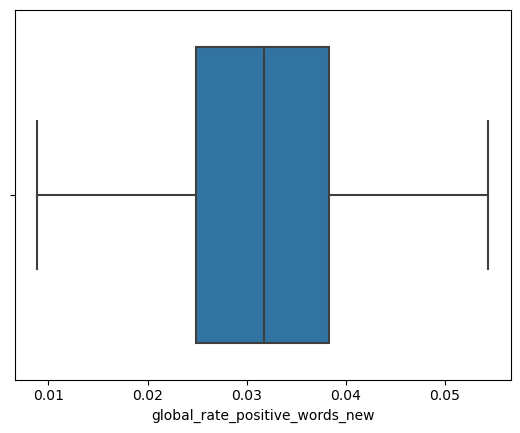

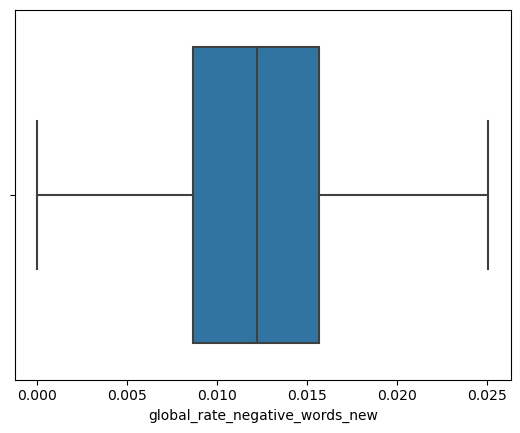

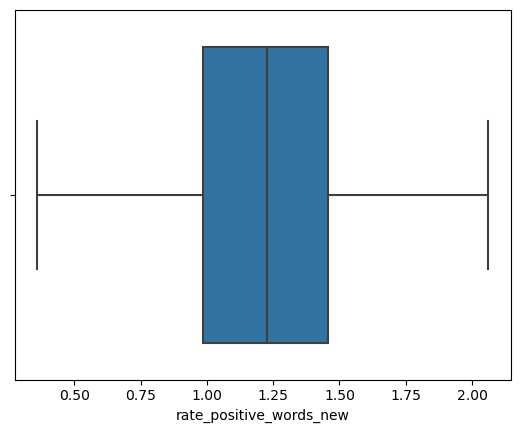

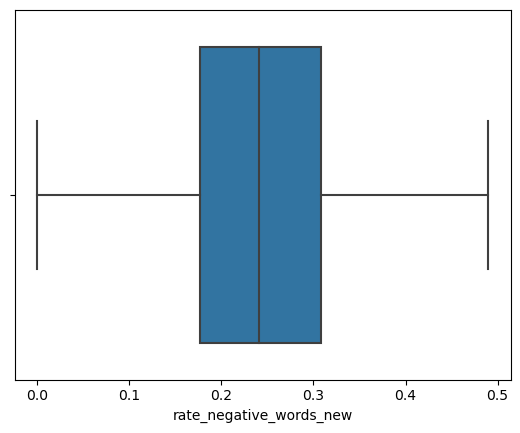

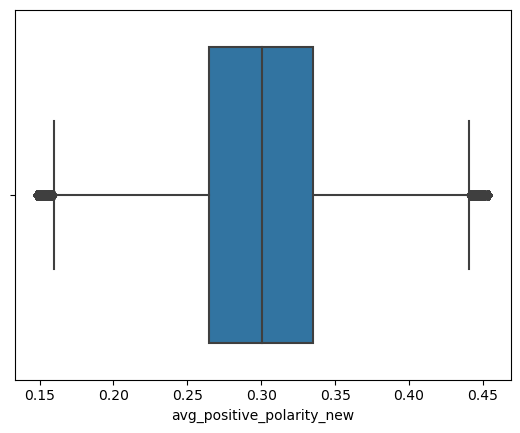

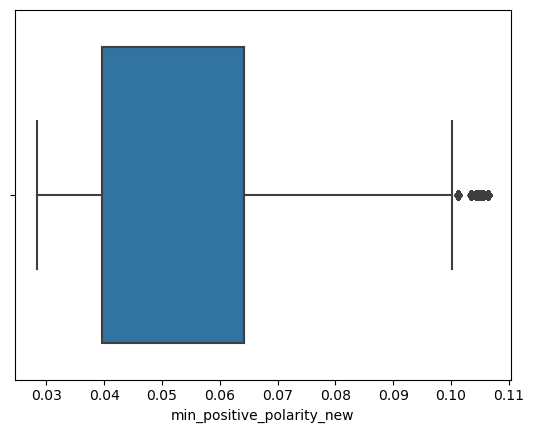

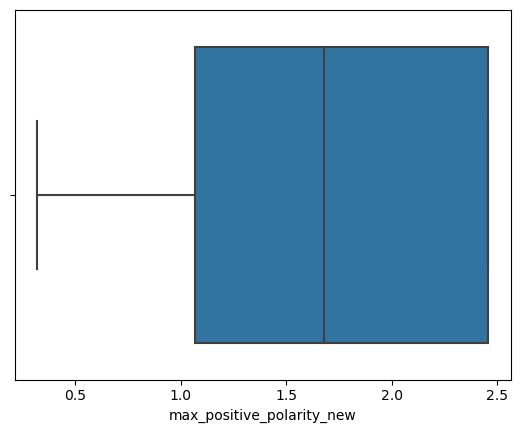

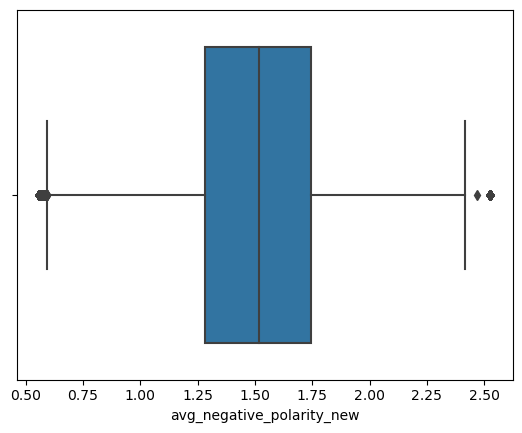

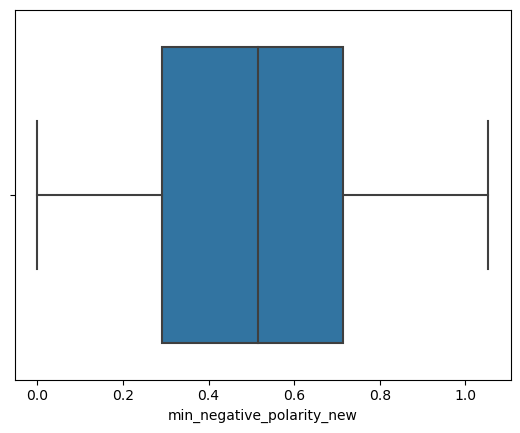

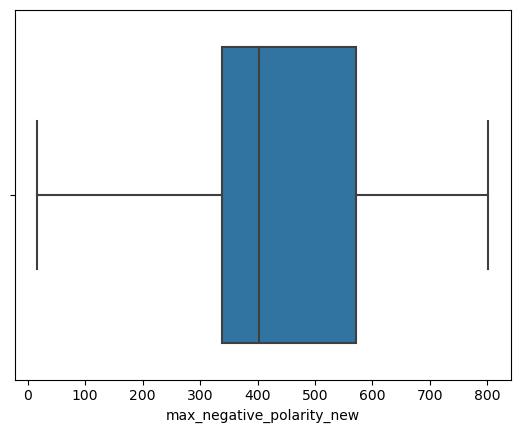

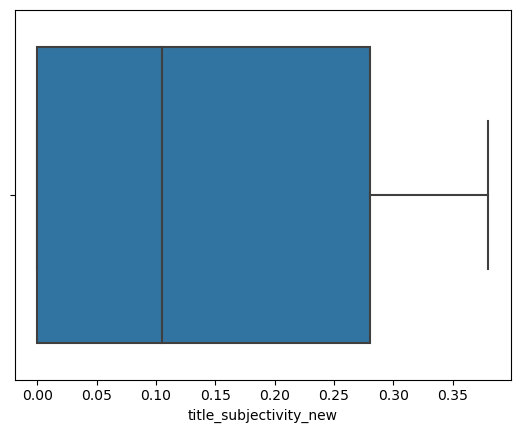

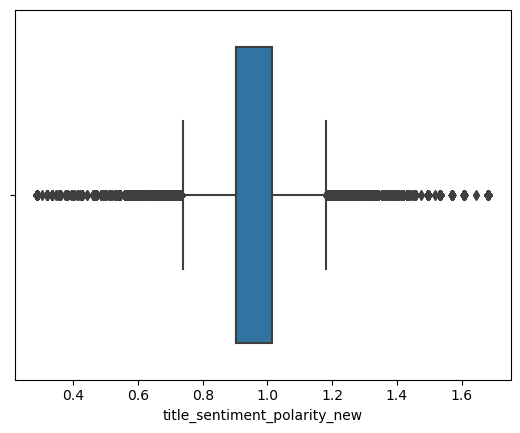

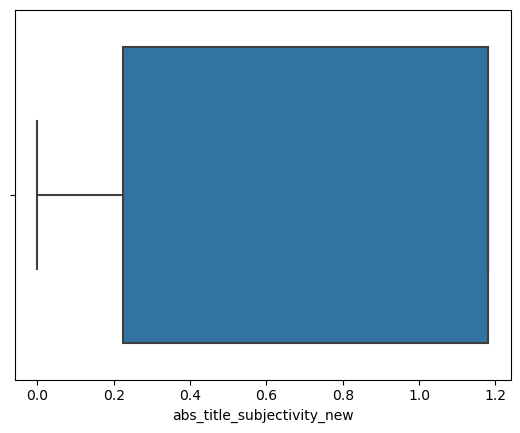

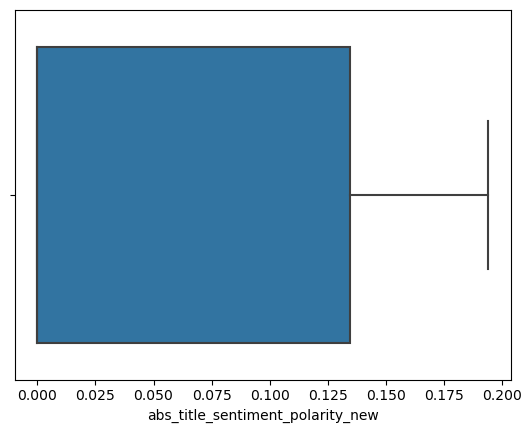

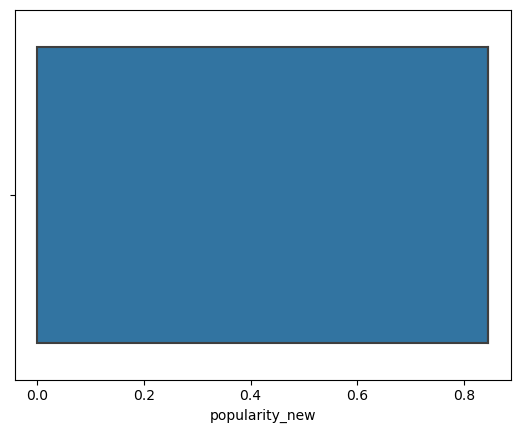

In [28]:
import matplotlib.pyplot as plt

num_cols = df_num_add.select_dtypes(['int64', 'float64']).columns

for col in num_cols:
    sns.boxplot(x=col, data=df_num_add)
    plt.show()


In [29]:
print(df_num_add.columns)
print(df_cat.columns)

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'LDA_00_new', 'LDA_01_new',
       'LDA_02_new', 'LDA_03_new', 'LDA_04_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'global_rate_positive_words_new',
       'global_rate_negative_words_new', 'rate_positive_words_new',
       'rate_negative_words_new', 'avg_positive_polarity_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'avg_negative_polarity_new', 'min_negative_polarity_new',
       'max_negative_polarity_new', 'title_subjectivity_new',
       'title_sentiment_polarity_new

In [30]:
df_final = pd.concat([df_num_add,df_cat], axis = 1)
df_final.shape

(39518, 56)

In [31]:
df_final['popularity'] = data['shares'].apply(lambda x: 0 if x <1400 else 1)
df_final.isnull().sum()

n_tokens_title                      1055
n_tokens_content                    1055
n_unique_tokens                     1055
average_token_length                1055
num_keywords                        1055
num_hrefs_new                       1055
num_self_hrefs_new                  1055
num_imgs_new                        1055
num_videos_new                      1055
kw_min_min_new                      1055
kw_max_min_new                      1055
kw_min_max_new                      1055
kw_max_max_new                      1055
kw_avg_max_new                      1055
kw_min_avg_new                      1055
kw_max_avg_new                      1055
kw_avg_avg_new                      1055
self_reference_min_shares_new       1055
self_reference_max_shares_new       1055
self_reference_avg_sharess_new      1055
LDA_00_new                          1055
LDA_01_new                          1055
LDA_02_new                          1055
LDA_03_new                          1055
LDA_04_new      

In [32]:
df_final=df_final.dropna()

In [33]:
df_final.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'LDA_00_new', 'LDA_01_new',
       'LDA_02_new', 'LDA_03_new', 'LDA_04_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'global_rate_positive_words_new',
       'global_rate_negative_words_new', 'rate_positive_words_new',
       'rate_negative_words_new', 'avg_positive_polarity_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'avg_negative_polarity_new', 'min_negative_polarity_new',
       'max_negative_polarity_new', 'title_subjectivity_new',
       'title_sentiment_polarity_new

In [34]:
df_final.shape

(37408, 57)

# Classification Models to be used
**1. AdaBoost CLassifier**    
**2. Logisitic Regression**    
**3. Random Forest**    
**4. GaussianNB**    
**5. SVC**  
**6. KNeighborsClassifier**    
**7. Decision Tree**

In [35]:
modelscore=[]
X=df_final.drop(['popularity','popularity_new'],axis=1)
y=df_final['popularity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [36]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 

# learner: the learning algorithm to be trained and predicted on
# sample_size: the size of samples (number) to be drawn from training set
# X_train: features training set
# y_train: income training set
# X_test: features testing set
# y_test: income testing set
    
    results = {}
    
    start = time() # start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # end time

    results['train_time'] = end-start
        
    # Get predictions on the first 4000 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:4000])
    end = time() # Get end time
    
    # he total prediction time
    results['pred_time'] = end-start
    # Compute accuracy on the first 4000 training samples
    results['acc_train'] = accuracy_score(y_train[:4000],predictions_train)     
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    # Compute F-score on the the first 4000 training samples
    results['f_train'] = fbeta_score(y_train[:4000],predictions_train,beta=1)   
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=1)
    # Compute AUC on the the first 4000 training samples
    results['auc_train'] = roc_auc_score(y_train[:4000],predictions_train)  
    # Compute AUC on the test set
    results['auc_test'] = roc_auc_score(y_test,predictions_test)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print ("{} with accuracy {}, F1 {} and AUC {}.".format(learner.__class__.__name__,\
          results['acc_test'],results['f_test'], results['auc_test']) )


    #plt.show()
    return results

In [37]:
import matplotlib.patches as mpatches
def evaluate(results,name):
    
# learners: a list of supervised learners
# stats: a list of dictionaries of the statistic results from 'train_predict()'
# accuracy: The score for the naive predictor
# f1: The score for the naive predictor
  
    # Create figure
    fig, ax = plt.subplots(2, 4, figsize = (16,7))

    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'auc_train','pred_time', 'acc_test',\
                                    'f_test', 'auc_test']):
            for i in np.arange(3):
                
                # plot code
                ax[j//4, j%4].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//4, j%4].set_xticks([0.45, 1.45, 2.45])
                ax[j//4, j%4].set_xticklabels(["1%", "10%", "100%"])
                ax[j//4, j%4].set_xlim((-0.1, 3.0))
    
    # Add labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[0, 3].set_ylabel("AUC")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    ax[1, 3].set_ylabel("AUC")
    ax[1, 0].set_xlabel("Training Set Size")
    ax[1, 1].set_xlabel("Training Set Size")
    ax[1, 2].set_xlabel("Training Set Size")
    ax[1, 3].set_xlabel("Training Set Size")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[0, 3].set_title("AUC on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    ax[1, 3].set_title("AUC on Testing Subset")
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[0, 3].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))
    ax[1, 3].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches,  bbox_to_anchor = (-1.4, 2.54),\
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.savefig(name)
    plt.tight_layout()
    plt.show()

# AdaBoost CLassifier, Logisitic Regression, Random Forest

AdaBoostClassifier trained on 299 samples.
AdaBoostClassifier with accuracy 0.5303394814220797, F1 0.576830443159923 and AUC 0.5253225819302438.
AdaBoostClassifier trained on 2992 samples.
AdaBoostClassifier with accuracy 0.5846030473135525, F1 0.619676945668135 and AUC 0.5810273309331744.
AdaBoostClassifier trained on 29926 samples.
AdaBoostClassifier with accuracy 0.6225608126169473, F1 0.667842860503411 and AUC 0.616173531539179.
LogisticRegression trained on 299 samples.
LogisticRegression with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
LogisticRegression trained on 2992 samples.
LogisticRegression with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
LogisticRegression trained on 29926 samples.
LogisticRegression with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
RandomForestClassifier trained on 299 samples.
RandomForestClassifier with accuracy 0.5279337075648223, F1 0.6093784560937846 and AUC 0.5162312206292223.
RandomForestC

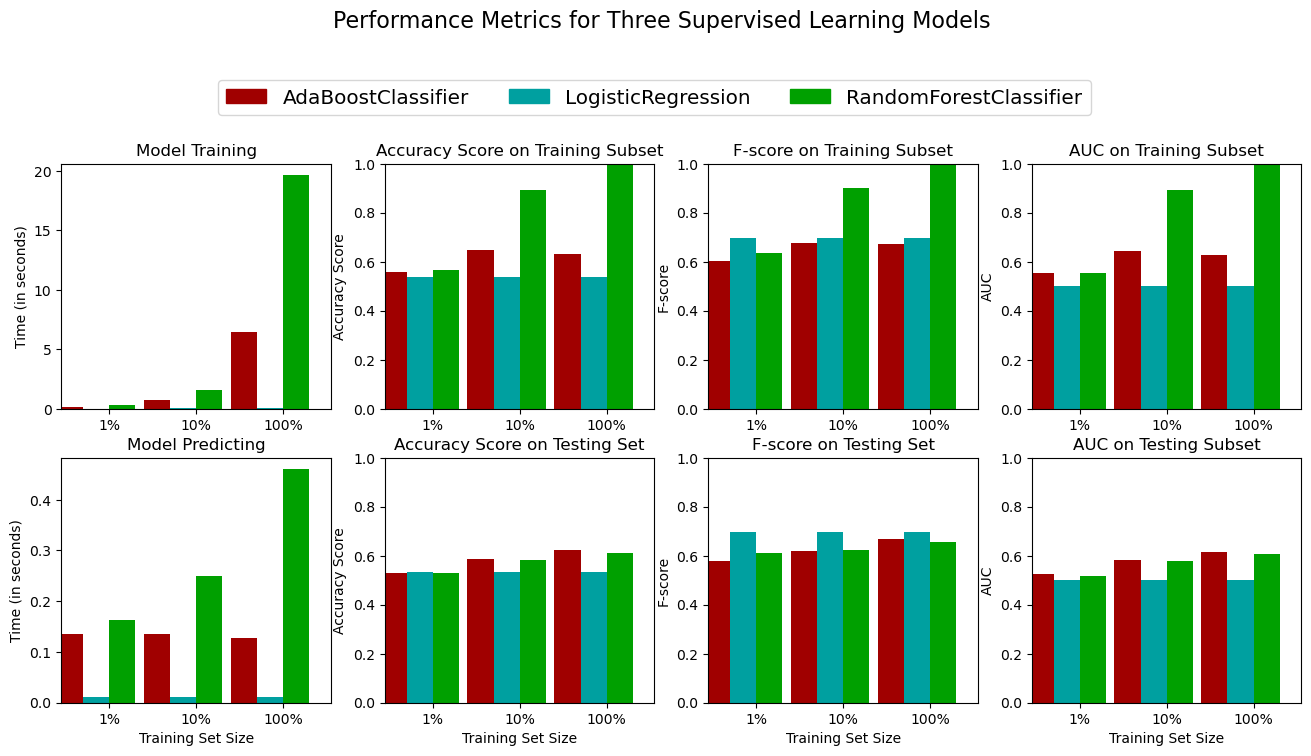

In [38]:
# Import the three supervised learning models from sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from time import time
from IPython.display import display
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score
# Initialize the three models
clf_A = AdaBoostClassifier(random_state=0)
clf_B = LogisticRegression(random_state=0,C=1.0)
clf_C = RandomForestClassifier(random_state=0)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train.shape[0]*0.01)
samples_10 = int(X_train.shape[0]*0.1)
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results,'perf_unopt.pdf')

# GaussianNB, Support Vector Classifier(SVC), KNeighborsClassifier

GaussianNB trained on 299 samples.
GaussianNB with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
GaussianNB trained on 2992 samples.
GaussianNB with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
GaussianNB trained on 29926 samples.
GaussianNB with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
SVC trained on 299 samples.
SVC with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
SVC trained on 2992 samples.
SVC with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
SVC trained on 29926 samples.
SVC with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
KNeighborsClassifier trained on 299 samples.
KNeighborsClassifier with accuracy 0.5235231221598503, F1 0.6586230010533372 and AUC 0.4991296032028535.
KNeighborsClassifier trained on 2992 samples.
KNeighborsClassifier with accuracy 0.5236567762630313, F1 0.6578341013824884 and AUC 0.49950805999923775.
KNeighborsClassifier trained on 29926 sample

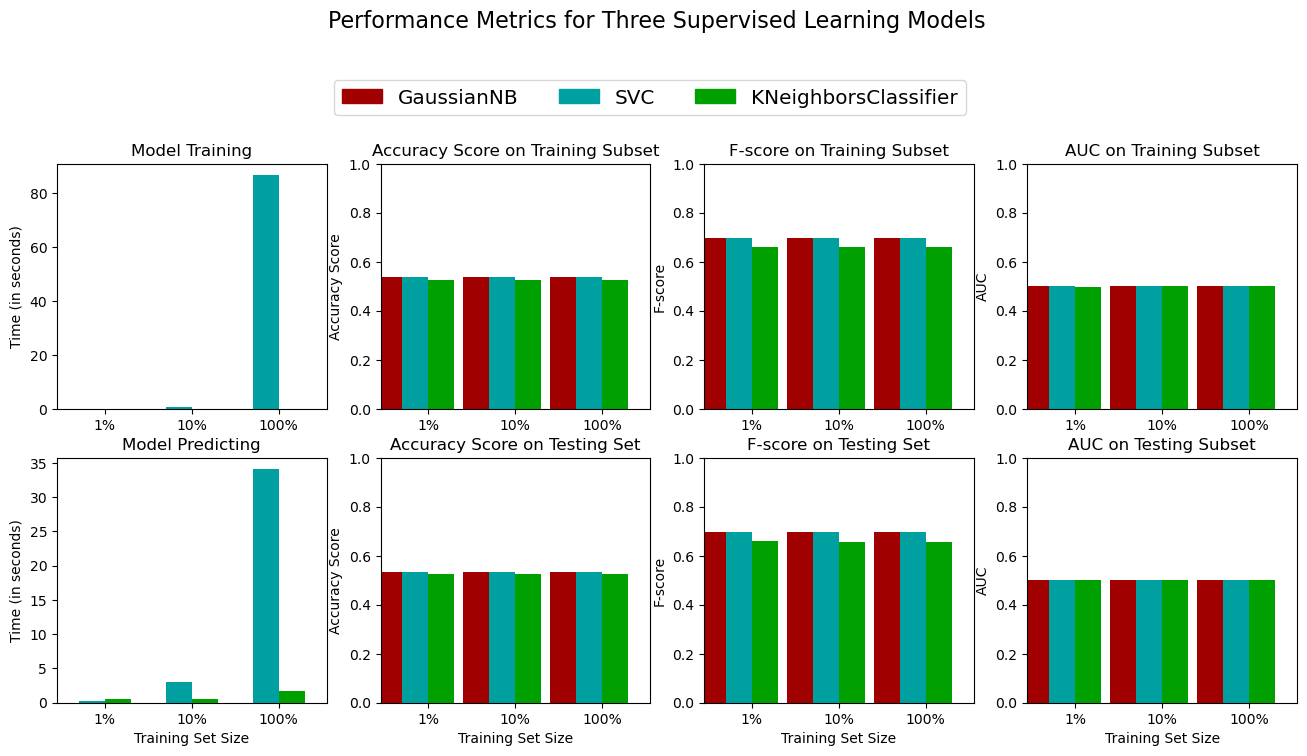

In [39]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
clf_A =GaussianNB()
clf_B = SVC(random_state=0,C=1.0)
clf_C = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train.shape[0]*0.01)
samples_10 = int(X_train.shape[0]*0.1)
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results,'perf_unopt1.pdf')

# Decision Tree

DecisionTreeClassifier trained on 299 samples.
DecisionTreeClassifier with accuracy 0.5195134990644212, F1 0.5550191855427652 and AUC 0.5164821972415614.
DecisionTreeClassifier trained on 2992 samples.
DecisionTreeClassifier with accuracy 0.537022186581128, F1 0.5654791771199197 and AUC 0.5350384238625677.
DecisionTreeClassifier trained on 29926 samples.
DecisionTreeClassifier with accuracy 0.5546645282010157, F1 0.5898572131954701 and AUC 0.5513864654374734.


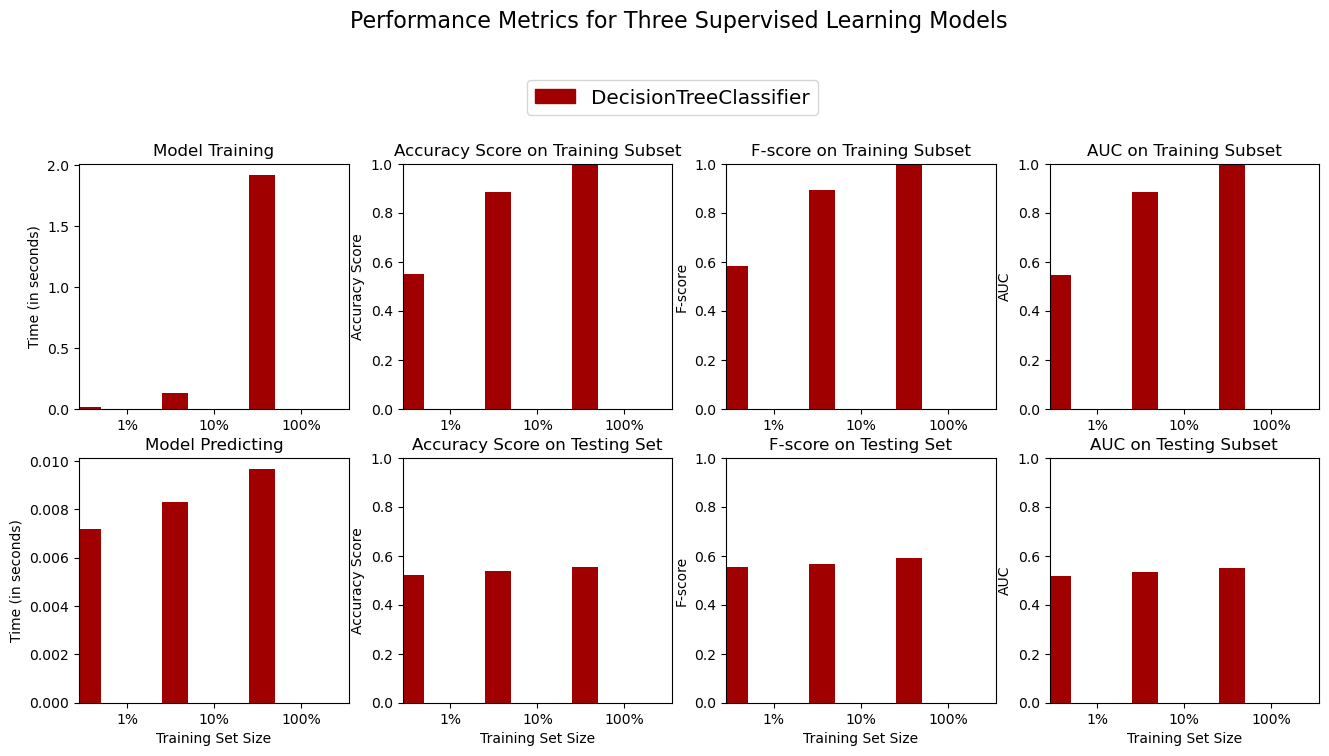

In [40]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)


# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train.shape[0] * 0.01)
samples_10 = int(X_train.shape[0] * 0.1)
samples_100 = X_train.shape[0]

# Collect results on the learner
results = {}
clf_name = clf.__class__.__name__
results[clf_name] = {}

for i, samples in enumerate([samples_1, samples_10, samples_100]):
    results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)
    

# Run metrics visualization for the supervised learning model
evaluate(results, 'perf_unopt1.pdf')

In [41]:
# Feature selection 
# USING BACKWARD ELIMINATION
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

cols = df_final.columns
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=57)

# Transforming data using RFE
X_rfe = rfe.fit_transform(X, y)

# Fitting the data to the model
model.fit(X_rfe, y)

print("Selected Features:")
selected_features = [col for col, support in zip(cols, rfe.support_) if support]
print(selected_features)
#print(rfe.support_)
print("Feature Rankings:")
print(rfe.ranking_)

Selected Features:
['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'average_token_length', 'num_keywords', 'num_hrefs_new', 'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new', 'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new', 'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new', 'self_reference_min_shares_new', 'self_reference_max_shares_new', 'self_reference_avg_sharess_new', 'LDA_00_new', 'LDA_01_new', 'LDA_02_new', 'LDA_03_new', 'LDA_04_new', 'global_subjectivity_new', 'global_sentiment_polarity_new', 'global_rate_positive_words_new', 'global_rate_negative_words_new', 'rate_positive_words_new', 'rate_negative_words_new', 'avg_positive_polarity_new', 'min_positive_polarity_new', 'max_positive_polarity_new', 'avg_negative_polarity_new', 'min_negative_polarity_new', 'max_negative_polarity_new', 'title_subjectivity_new', 'title_sentiment_polarity_new', 'abs_title_subjectivity_new', 'abs_title_sentiment_polarity_new', 'popularity_new'

In [42]:
#Best model till now :Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_train=rf.predict(x_train)
y_prob_train=rf.predict_proba(x_train)[:,1]

y_pred=rf.predict(x_test)
y_prob=rf.predict_proba(x_test)[:,1]  #used to find AUC of train and test

from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score, classification_report

#print('Accuracy of Random forest train :',accuracy_score(y_pred_train,y_train))
#print('Accuracy of Random forest test:',accuracy_score(y_pred,y_test))
#print('AUC of Random forest train :',roc_auc_score(y_train,y_prob_train))
#print('AUC of Random forest test :',roc_auc_score(y_test,y_prob))

# Generate and print the classification report
classification_report_train = classification_report(y_train, y_pred_train)
classification_report_test = classification_report(y_test, y_pred)
print('Classification Report - Training Set:')
print(classification_report_train)
print('Classification Report - Testing Set:')
print(classification_report_test)

Classification Report - Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12167
         1.0       1.00      1.00      1.00     14018

    accuracy                           1.00     26185
   macro avg       1.00      1.00      1.00     26185
weighted avg       1.00      1.00      1.00     26185

Classification Report - Testing Set:
              precision    recall  f1-score   support

         0.0       0.59      0.52      0.55      5276
         1.0       0.62      0.69      0.65      5947

    accuracy                           0.61     11223
   macro avg       0.61      0.60      0.60     11223
weighted avg       0.61      0.61      0.60     11223



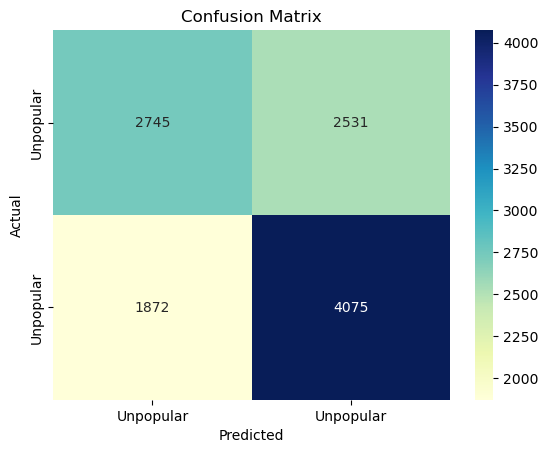

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.xticks([0.5, 1.5], ["Unpopular", "Unpopular"])
    plt.yticks([0.5, 1.5], ["Unpopular", "Unpopular"])
    plt.show()
plot_confusion_matrix(y_test, y_pred)